<h2 style='text-align:center;font-family:Comic Sans MS;font-size:30px;background-color:darkturquoise;border:20px;color:white'>Table of Contents<h2>
    
## 1. Introduction
## 2. Setup
## 3. Visualizations of the data and analysis
## 4. Statistical Models For Classification
## 5. Conclusion
    
# Introduction
    
Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).
    
## Data Id 📋
    
The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not. The data folder contains two datasets:
1. **Train** - 17 columns and 45211 rows.
2. **Test** - 17 columns and 4521 rows.

### **bank client data:**

1 - age (numeric)
2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4 - education (categorical: "unknown","secondary","primary","tertiary")
5 - default: has credit in default? (binary: "yes","no")
6 - balance: average yearly balance, in euros (numeric)
7 - housing: has housing loan? (binary: "yes","no")
8 - loan: has personal loan? (binary: "yes","no")
### related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
10 - day: last contact day of the month (numeric)
11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
12 - duration: last contact duration, in seconds (numeric)
### other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15 - previous: number of contacts performed before this campaign and for this client (numeric)
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

# Setup

In [1]:
library(tidyverse)
library(mlbench)
library(gmodels)
library(class)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
train.path <- "/kaggle/input/banking-dataset-marketing-targets/train.csv"
test.path <- "/kaggle/input/banking-dataset-marketing-targets/test.csv"

In [3]:
Mt_df <- read.table(train.path,header = T, sep = ";")
test_df <- read.table(test.path,header = T, sep = ";")
head(Mt_df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [4]:
str(Mt_df)

'data.frame':	45211 obs. of  17 variables:
 $ age      : int  58 44 33 47 33 35 28 42 58 43 ...
 $ job      : Factor w/ 12 levels "admin.","blue-collar",..: 5 10 3 2 12 5 5 3 6 10 ...
 $ marital  : Factor w/ 3 levels "divorced","married",..: 2 3 2 2 3 2 3 1 2 3 ...
 $ education: Factor w/ 4 levels "primary","secondary",..: 3 2 2 4 4 3 3 3 1 2 ...
 $ default  : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 2 1 1 ...
 $ balance  : int  2143 29 2 1506 1 231 447 2 121 593 ...
 $ housing  : Factor w/ 2 levels "no","yes": 2 2 2 2 1 2 2 2 2 2 ...
 $ loan     : Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 2 1 1 1 ...
 $ contact  : Factor w/ 3 levels "cellular","telephone",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ day      : int  5 5 5 5 5 5 5 5 5 5 ...
 $ month    : Factor w/ 12 levels "apr","aug","dec",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ duration : int  261 151 76 92 198 139 217 380 50 55 ...
 $ campaign : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays    : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previous : int  0 0 0

In [5]:
fact <- c(2:5,7:9,11,16,17)
num <- c(1,6,10,12:15)

for (i in fact)
{
 print(names(Mt_df)[i])
 print("Train Data(%):")
 print(round(prop.table(table(Mt_df[,i]))*100,1))
 print("Test Data(%):")
 print(round(prop.table(table(test_df[,i]))*100,1))
}

for (i in num)
{
 print(names(Mt_df)[i])
 print("Train Data(%):")   
 print(summary(Mt_df[,i]))
 print("Test Data(%):")
 print(summary(test_df[,i]))
}

[1] "job"
[1] "Train Data(%):"

       admin.   blue-collar  entrepreneur     housemaid    management 
         11.4          21.5           3.3           2.7          20.9 
      retired self-employed      services       student    technician 
          5.0           3.5           9.2           2.1          16.8 
   unemployed       unknown 
          2.9           0.6 
[1] "Test Data(%):"

       admin.   blue-collar  entrepreneur     housemaid    management 
         10.6          20.9           3.7           2.5          21.4 
      retired self-employed      services       student    technician 
          5.1           4.0           9.2           1.9          17.0 
   unemployed       unknown 
          2.8           0.8 
[1] "marital"
[1] "Train Data(%):"

divorced  married   single 
    11.5     60.2     28.3 
[1] "Test Data(%):"

divorced  married   single 
    11.7     61.9     26.5 
[1] "education"
[1] "Train Data(%):"

  primary secondary  tertiary   unknown 
     15.2      

## Checking for NA and Null values 

In [6]:
any(is.null(Mt_df))

[1] FALSE

In [7]:
any(is.na(Mt_df))

[1] FALSE

# Visualizations of the data and analysis 📊

## variable plots and distributions

Firstly, each variable will be analized seperately in the folowing method:

* **Continuous Variables**:
    1. Histogram/area.
    2. Summarry.
    
* **Discrete Variables**:
    1. Barplot.
    2. Proportion table.

    

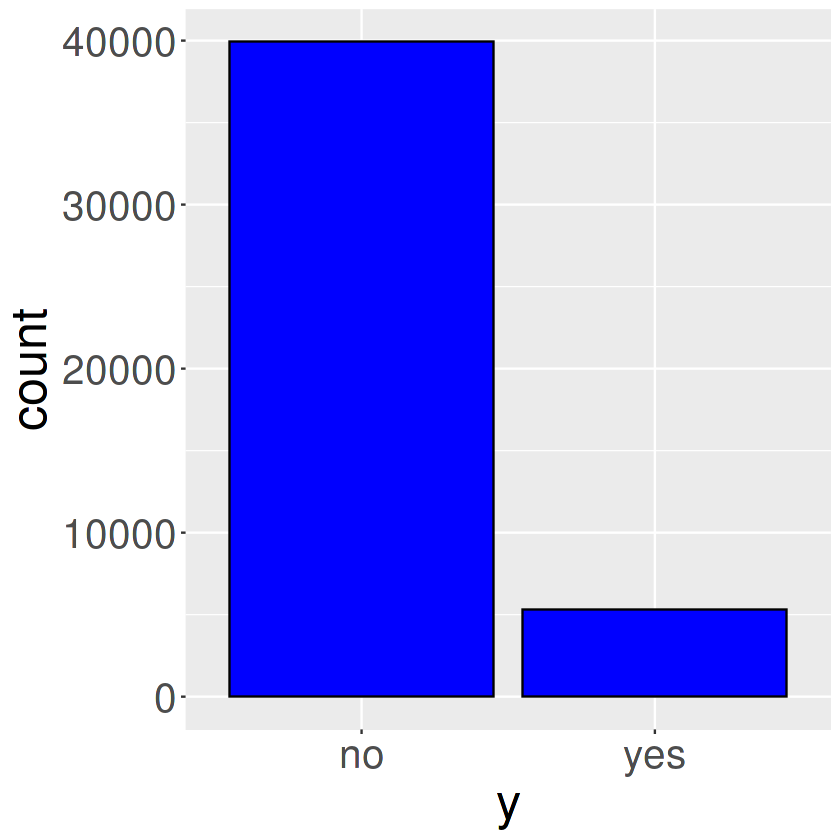

In [8]:
y_bar <- ggplot(Mt_df, aes(y))
y_bar + geom_bar(color = "black",fill = "blue") + theme(text = element_text(size=30))

In [9]:
round(prop.table(table(Mt_df$y))*100,1)


  no  yes 
88.3 11.7 

In [10]:
#creating a function to control figure size
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

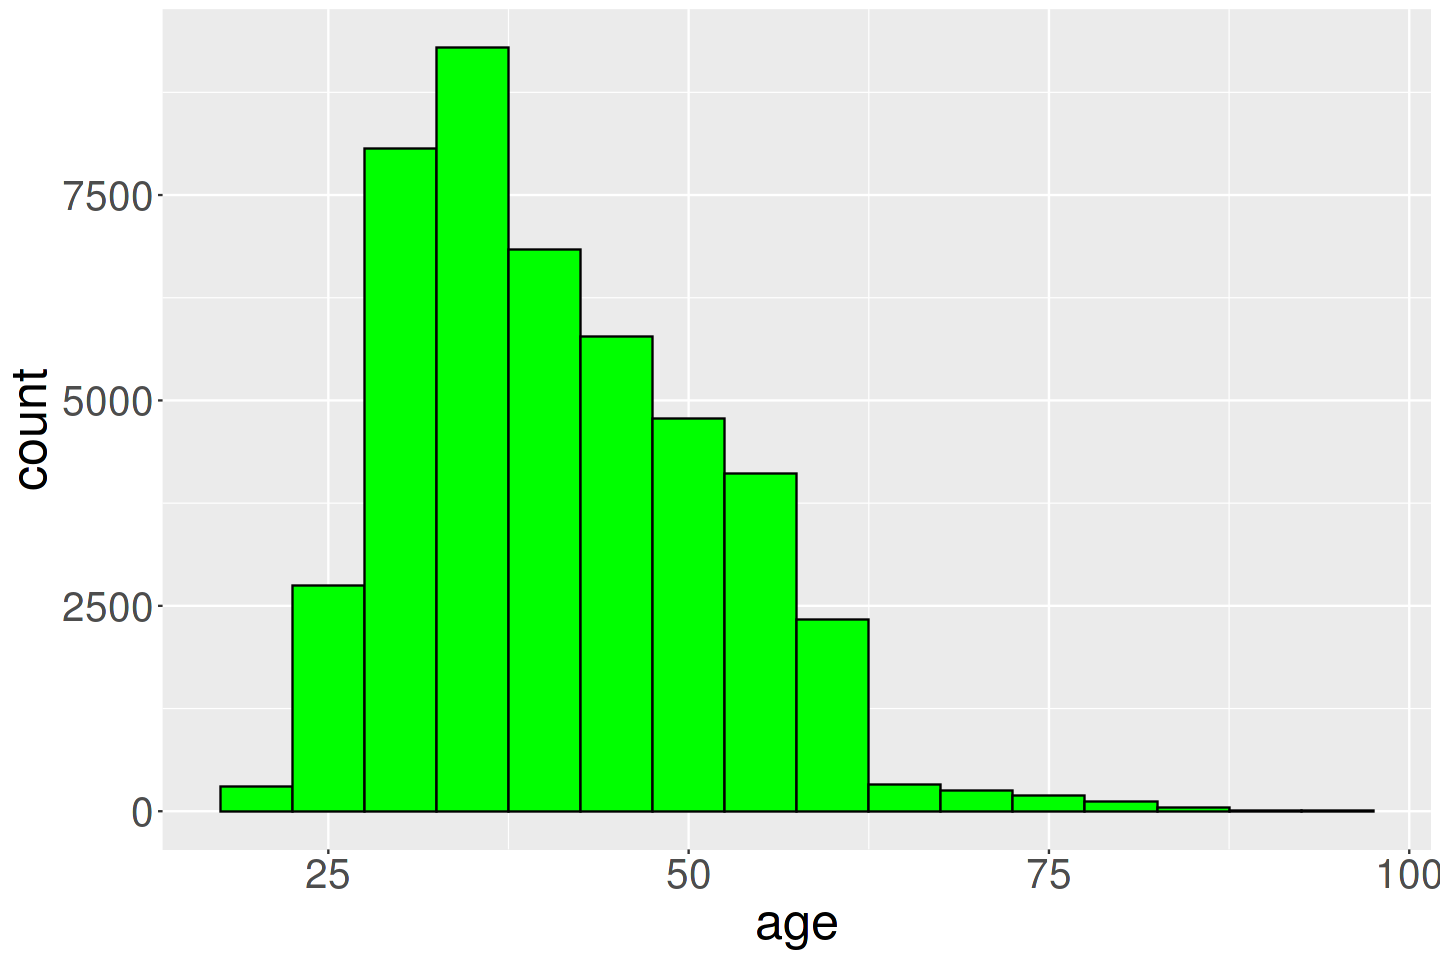

In [11]:
fig(12, 8)
age_hist <- ggplot(Mt_df, aes(age))
age_hist + geom_histogram(binwidth = 5, color = "black",fill = "green") + theme(text = element_text(size=30))

In [12]:
summary(Mt_df$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   33.00   39.00   40.94   48.00   95.00 

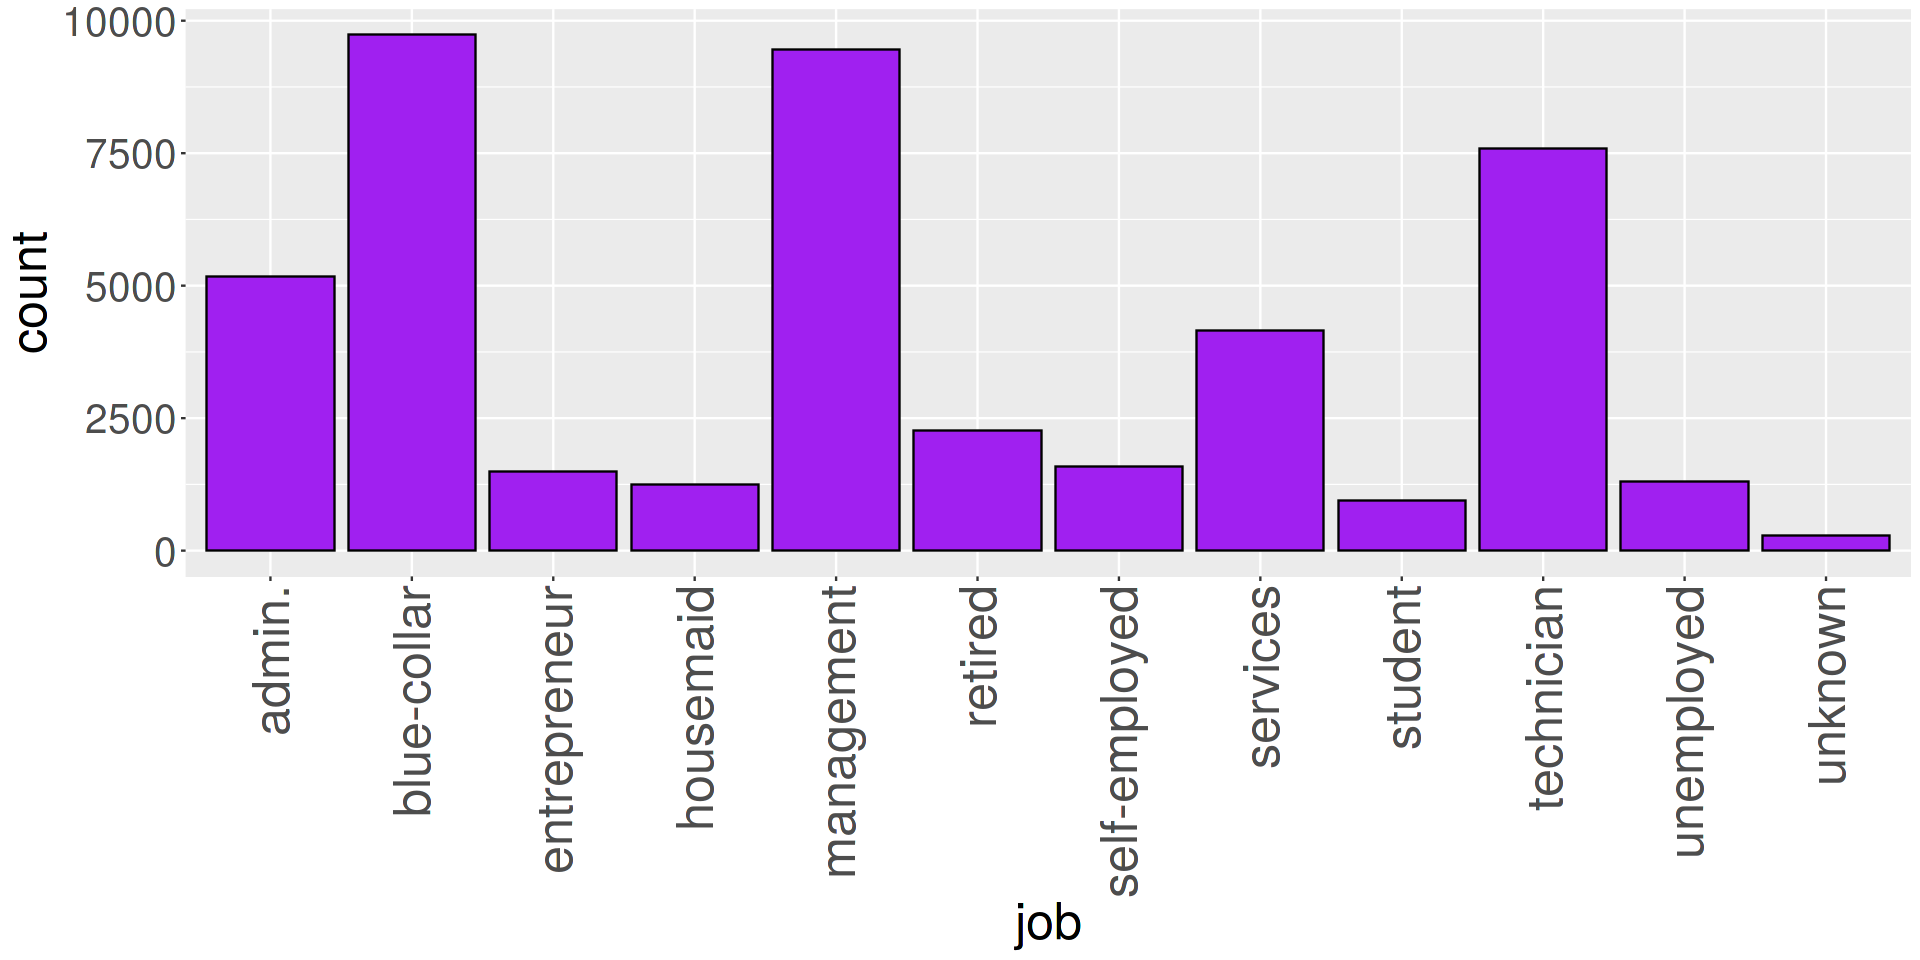

In [13]:
fig(16, 8)
job_bar <- ggplot(Mt_df, aes(job))
job_bar + geom_bar(color = "black",fill = "purple") +  theme(text = element_text(size=30), axis.text.x=element_text(angle = 90, vjust = 0.5, hjust=1,size=30))

In [14]:
round(prop.table(table(Mt_df$job))*100,1)


       admin.   blue-collar  entrepreneur     housemaid    management 
         11.4          21.5           3.3           2.7          20.9 
      retired self-employed      services       student    technician 
          5.0           3.5           9.2           2.1          16.8 
   unemployed       unknown 
          2.9           0.6 

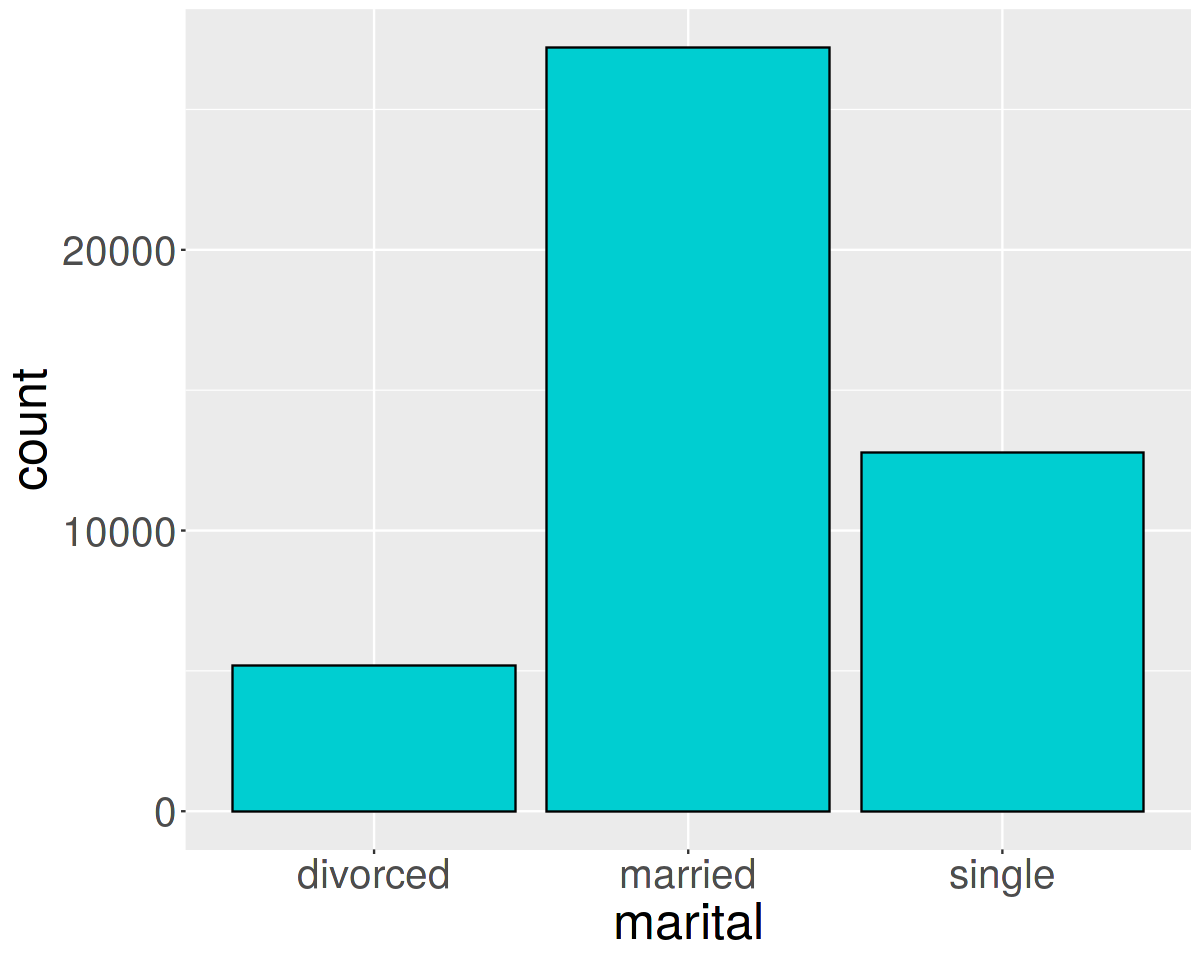

In [15]:
fig(10, 8)
marital_bar <- ggplot(Mt_df, aes(marital))
marital_bar + geom_bar(color = "black",fill = "darkturquoise") + theme(text = element_text(size=30))

In [16]:
round(prop.table(table(Mt_df$marital))*100,1)


divorced  married   single 
    11.5     60.2     28.3 

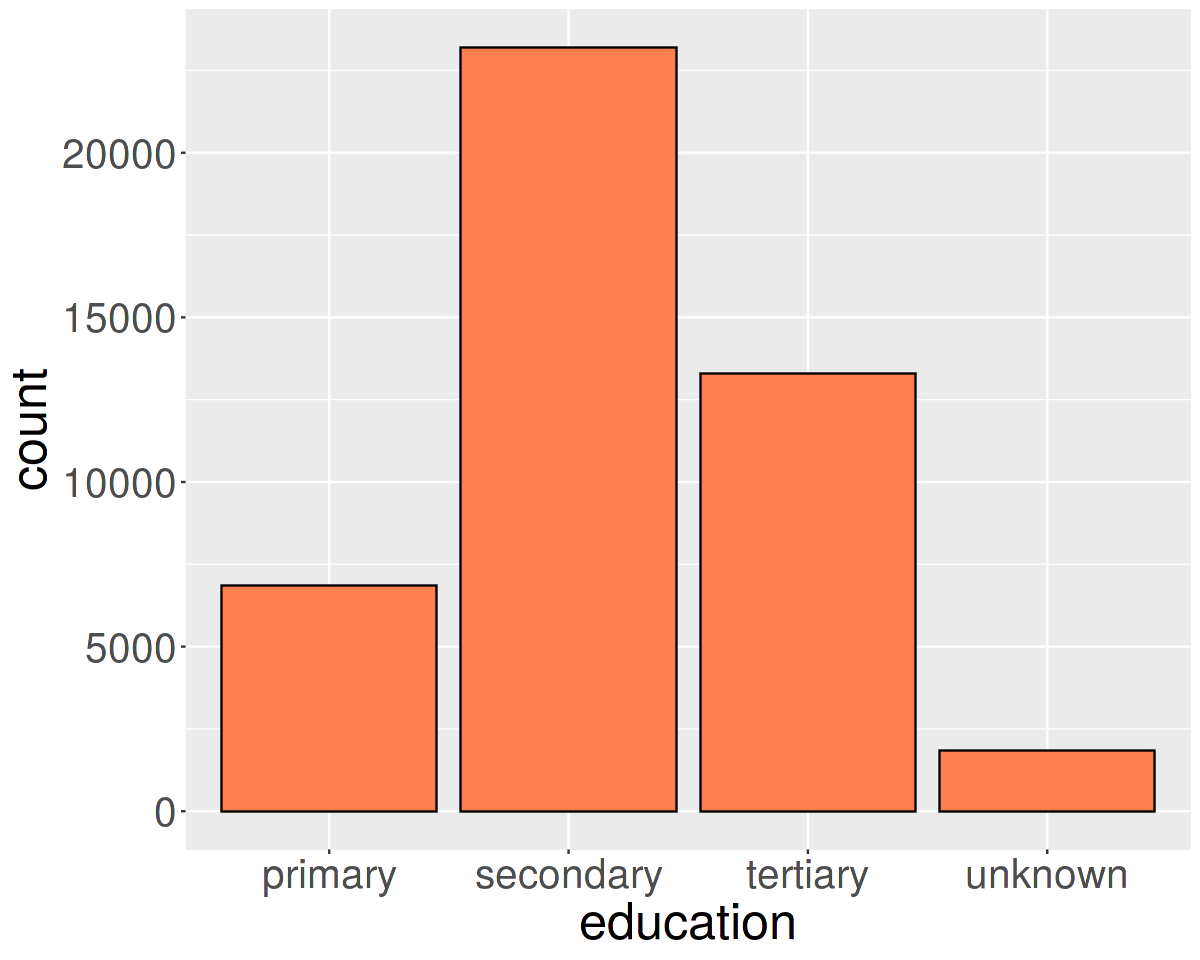

In [17]:
fig(10, 8)
education_bar <- ggplot(Mt_df, aes(education))
education_bar + geom_bar(color = "black",fill = "coral") + theme(text = element_text(size=30))

In [18]:
round(prop.table(table(Mt_df$education))*100,1)


  primary secondary  tertiary   unknown 
     15.2      51.3      29.4       4.1 

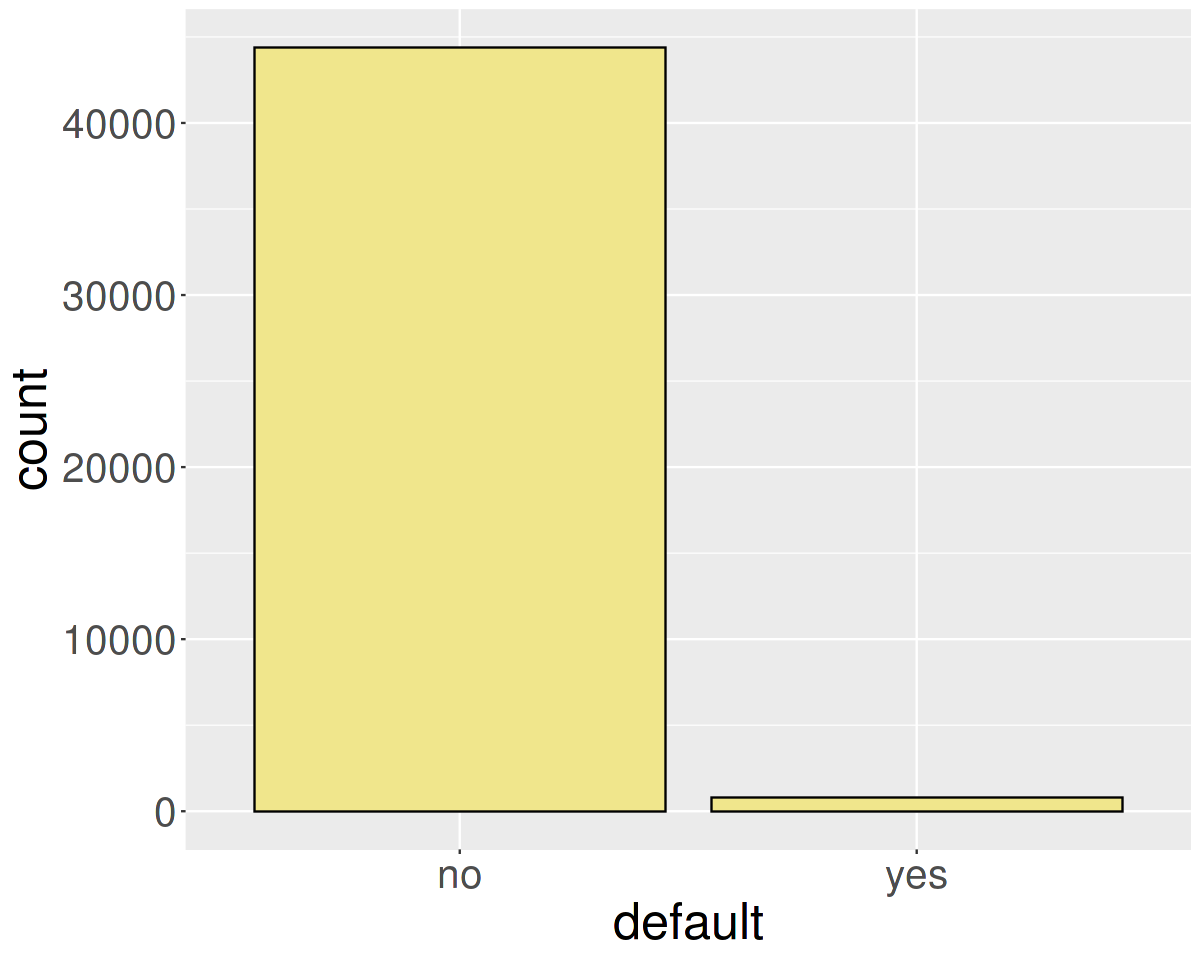

In [19]:
default_bar <- ggplot(Mt_df, aes(default))
default_bar + geom_bar(color = "black",fill = "khaki") + theme(text = element_text(size=30))

In [20]:
round(prop.table(table(Mt_df$default))*100,1)


  no  yes 
98.2  1.8 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



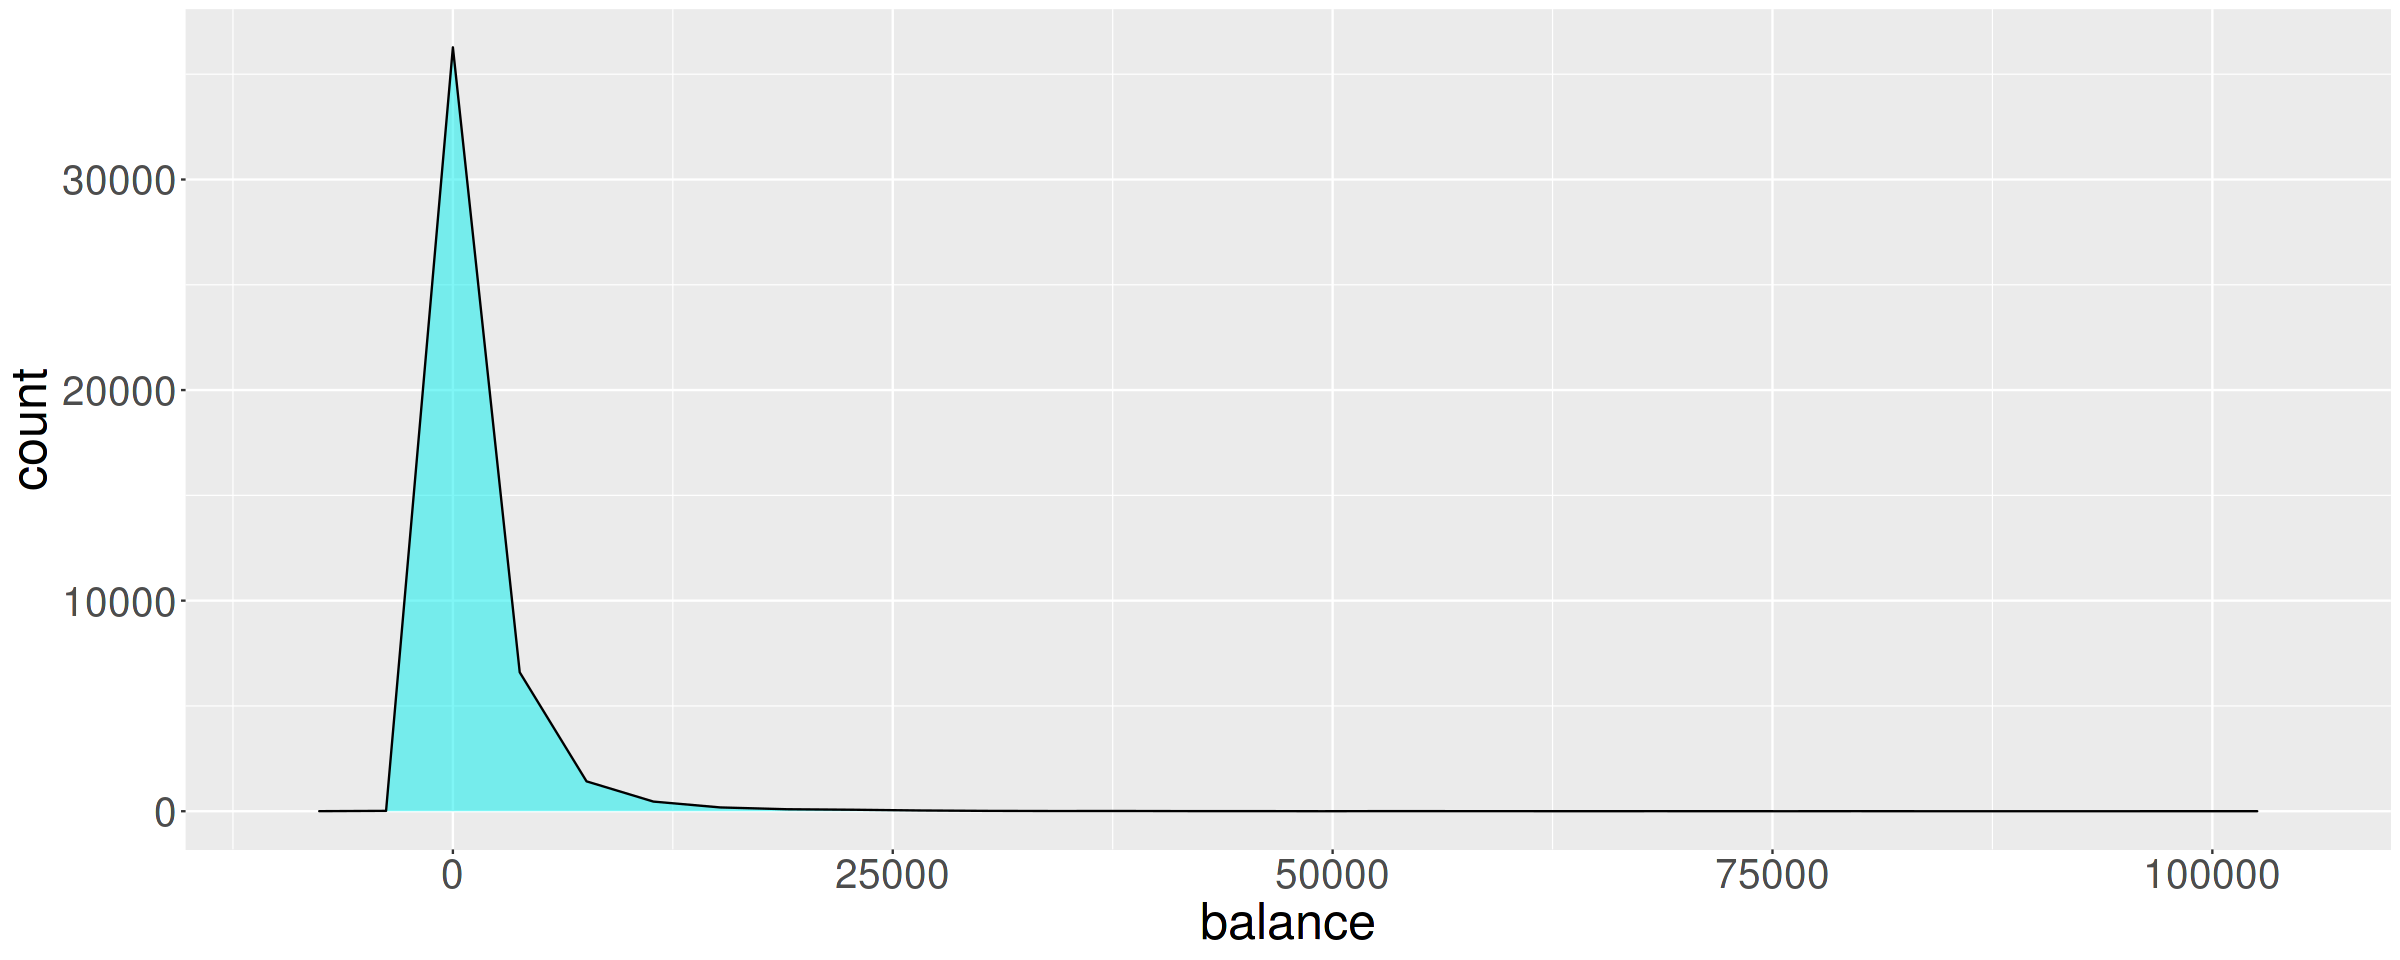

In [21]:
fig(20, 8)
balance_area <- ggplot(Mt_df, aes(balance))
balance_area + geom_area(stat = "bin", color = "black",fill = "cyan2",alpha = 0.5) + theme(text = element_text(size=30))

In [22]:
summary(Mt_df$balance)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -8019      72     448    1362    1428  102127 

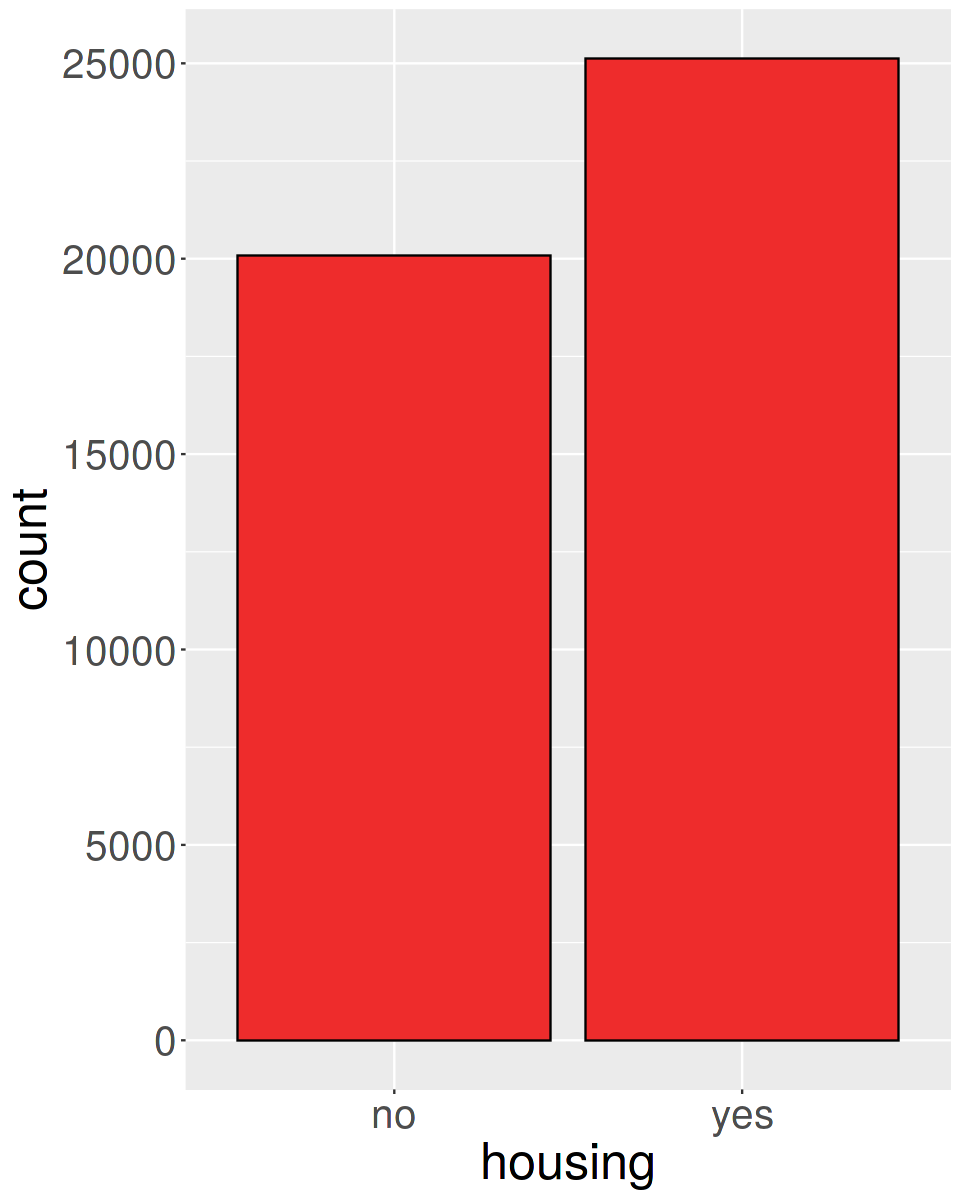

In [23]:
fig(8,10)
housing_bar <- ggplot(Mt_df, aes(housing))
housing_bar + geom_bar(color = "black",fill = "firebrick2") + theme(text = element_text(size=30))

In [24]:
round(prop.table(table(Mt_df$housing))*100,1)


  no  yes 
44.4 55.6 

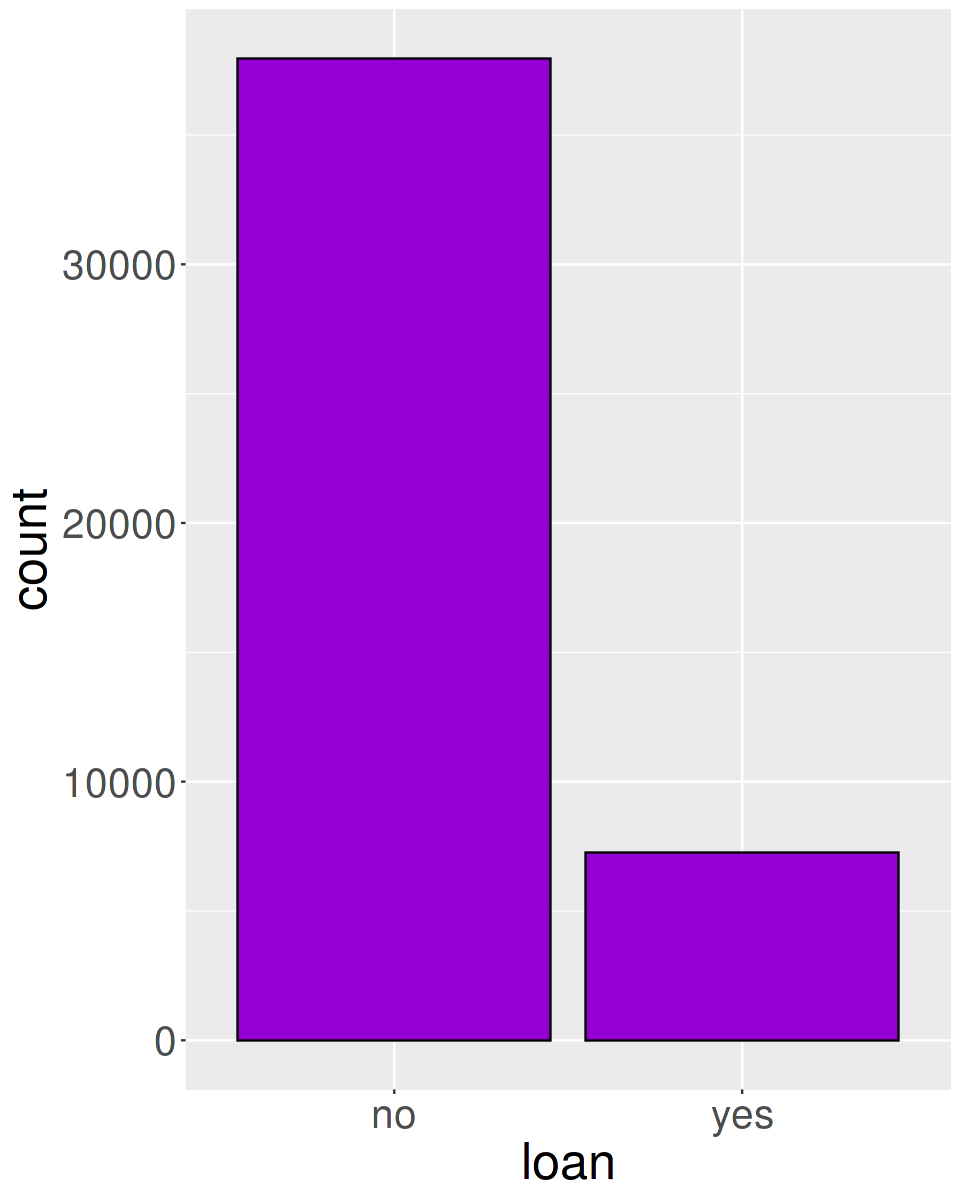

In [25]:
fig(8,10)
loan_bar <- ggplot(Mt_df, aes(loan))
loan_bar + geom_bar(color = "black",fill = "darkviolet") + theme(text = element_text(size=30))

In [26]:
round(prop.table(table(Mt_df$loan))*100,1)


 no yes 
 84  16 

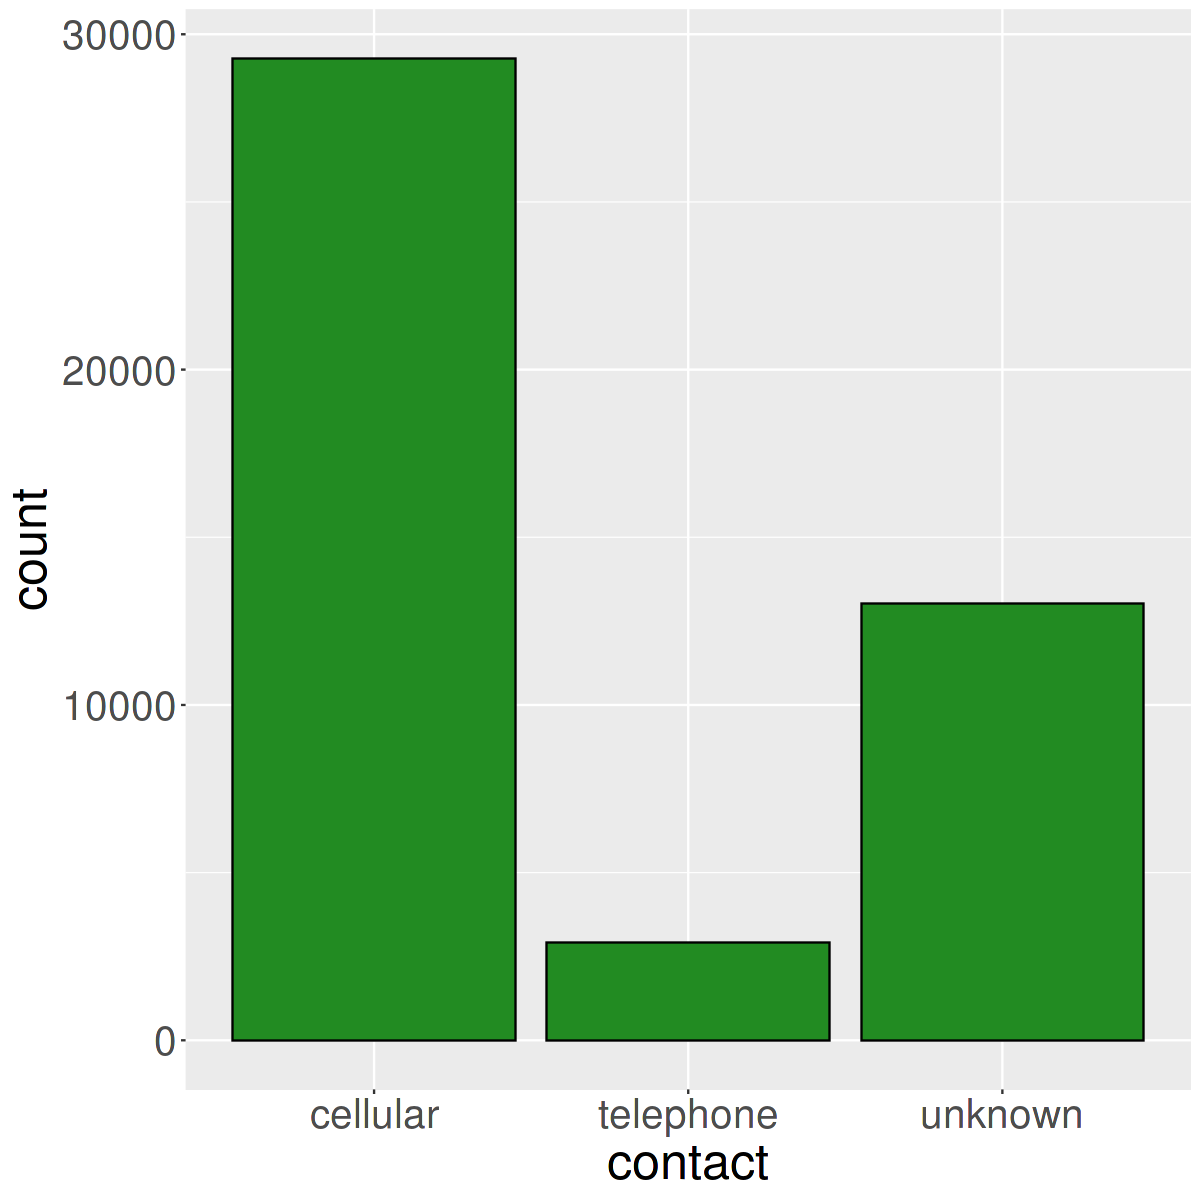

In [27]:
fig(10,10)
contact_bar <- ggplot(Mt_df, aes(contact))
contact_bar + geom_bar(color = "black",fill = "forestgreen") + theme(text = element_text(size=30))

In [28]:
round(prop.table(table(Mt_df$contact))*100,1)


 cellular telephone   unknown 
     64.8       6.4      28.8 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



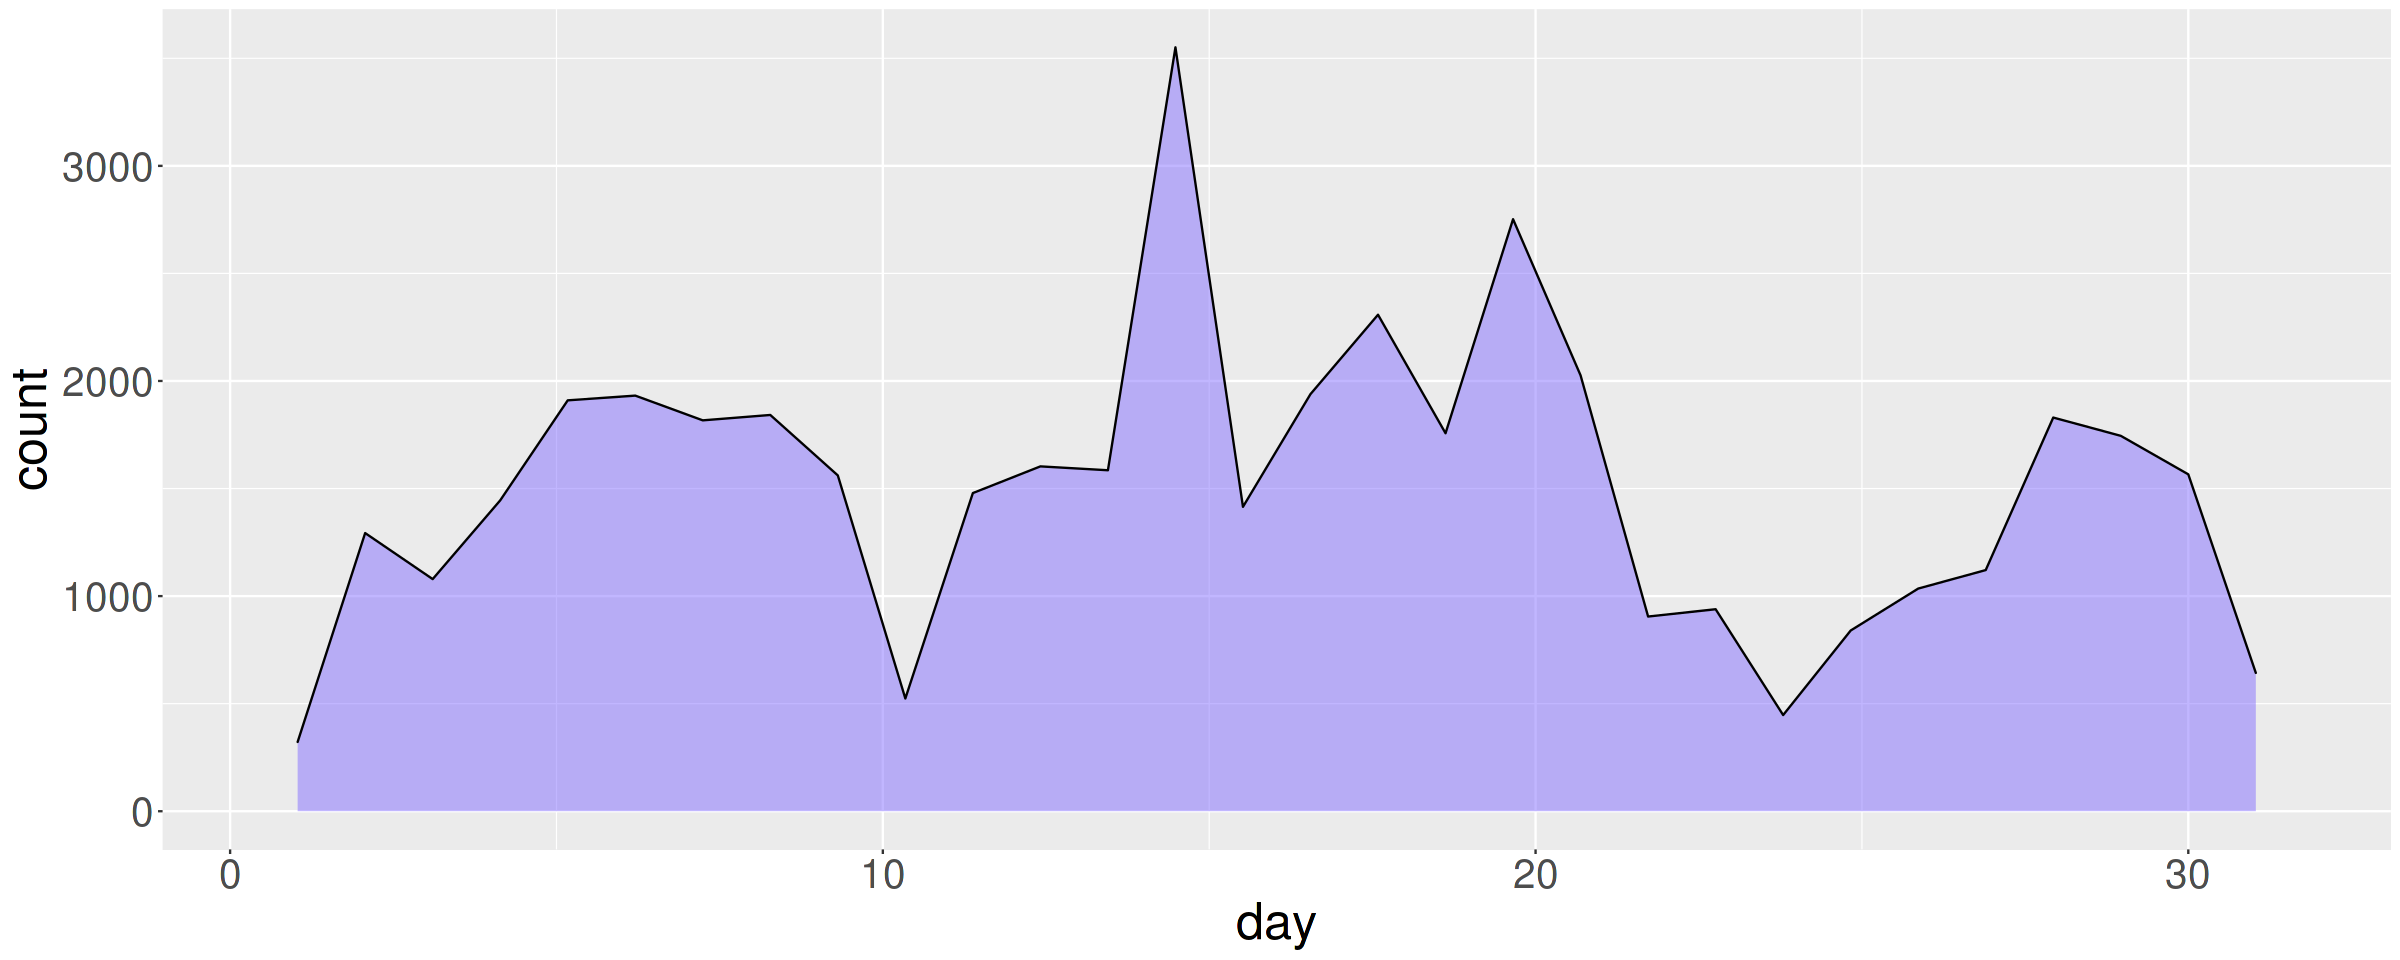

In [29]:
fig(20, 8)
day_hist <- ggplot(Mt_df, aes(day))
day_hist + geom_area(stat = "bin", color = "black",fill = "slateblue1", alpha = 0.5) + theme(text = element_text(size=30))

In [30]:
summary(Mt_df$day)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    8.00   16.00   15.81   21.00   31.00 

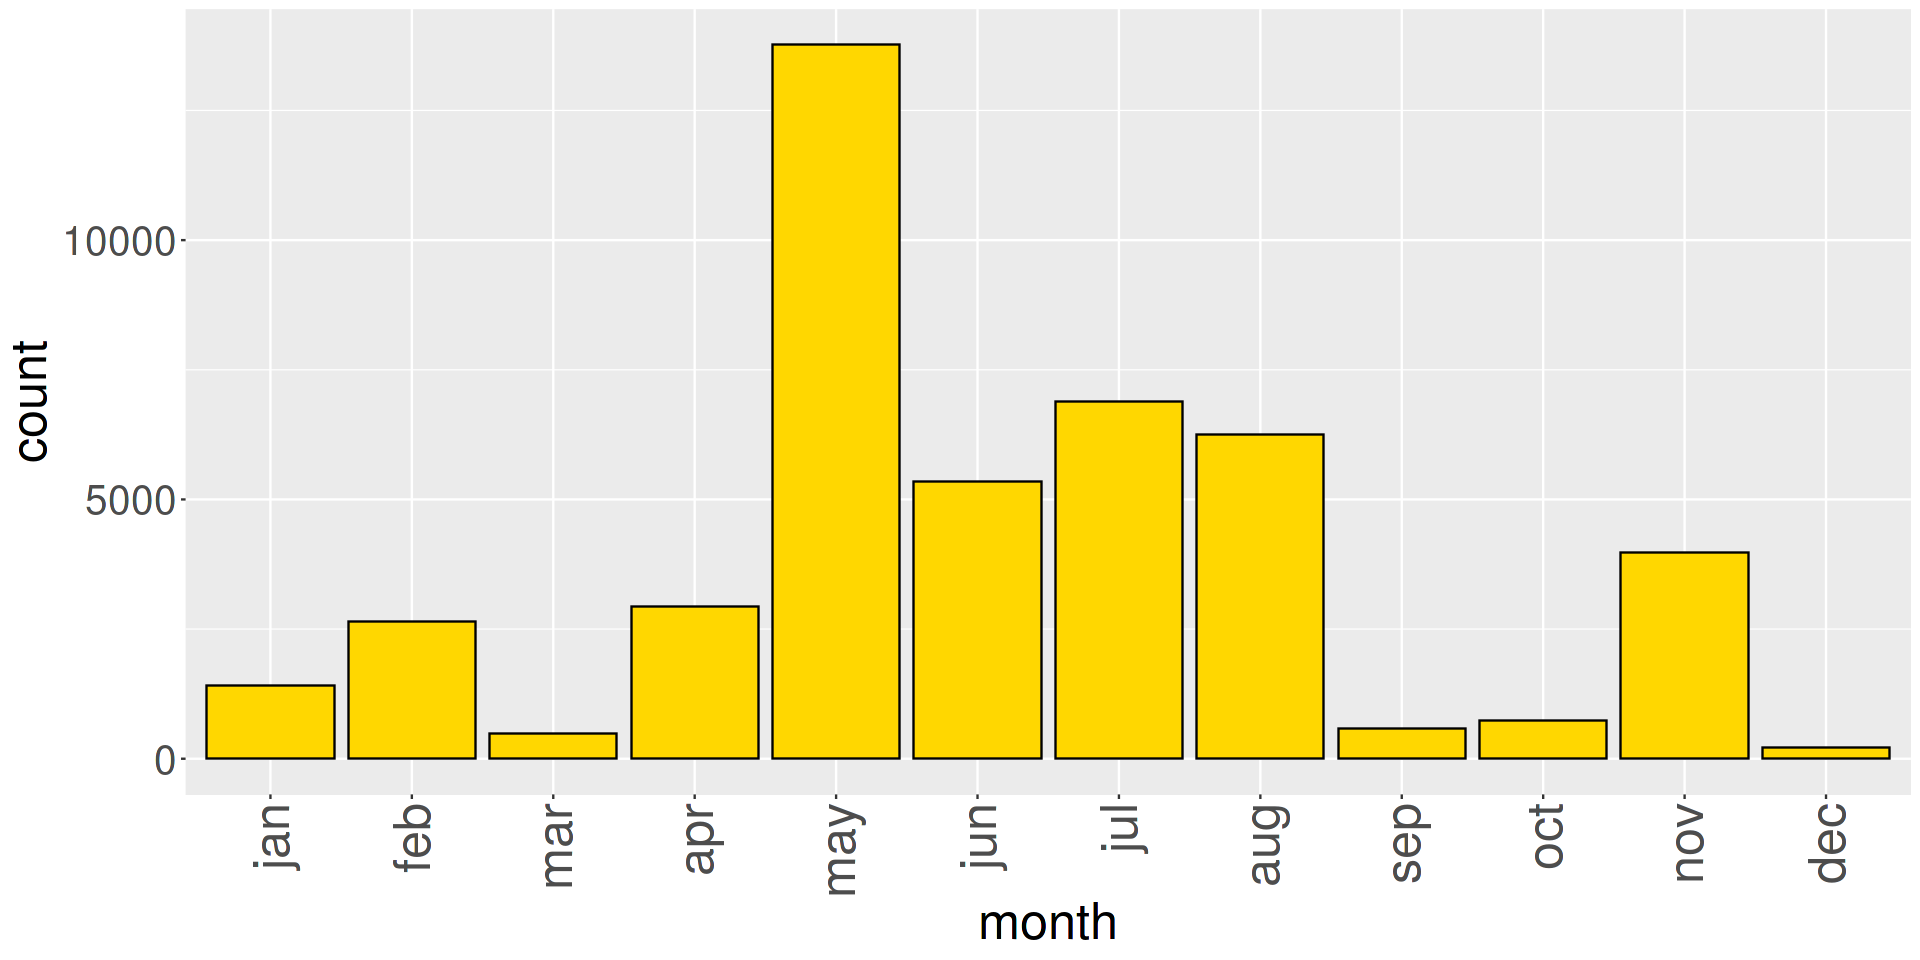

In [31]:
fig(16, 8)
Mt_df$month <- factor(Mt_df$month,levels = c("jan", "feb", "mar", "apr","may", "jun", "jul", "aug","sep", "oct", "nov", "dec")) #sort by chronological month order
month_bar <- ggplot(Mt_df, aes(month))
month_bar + geom_bar(color = "black",fill = "gold") +  theme(text = element_text(size=30), axis.text.x=element_text(angle = 90, vjust = 0.5, hjust=1,size=30))

In [32]:
round(prop.table(table(Mt_df$month))*100,1)


 jan  feb  mar  apr  may  jun  jul  aug  sep  oct  nov  dec 
 3.1  5.9  1.1  6.5 30.4 11.8 15.3 13.8  1.3  1.6  8.8  0.5 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



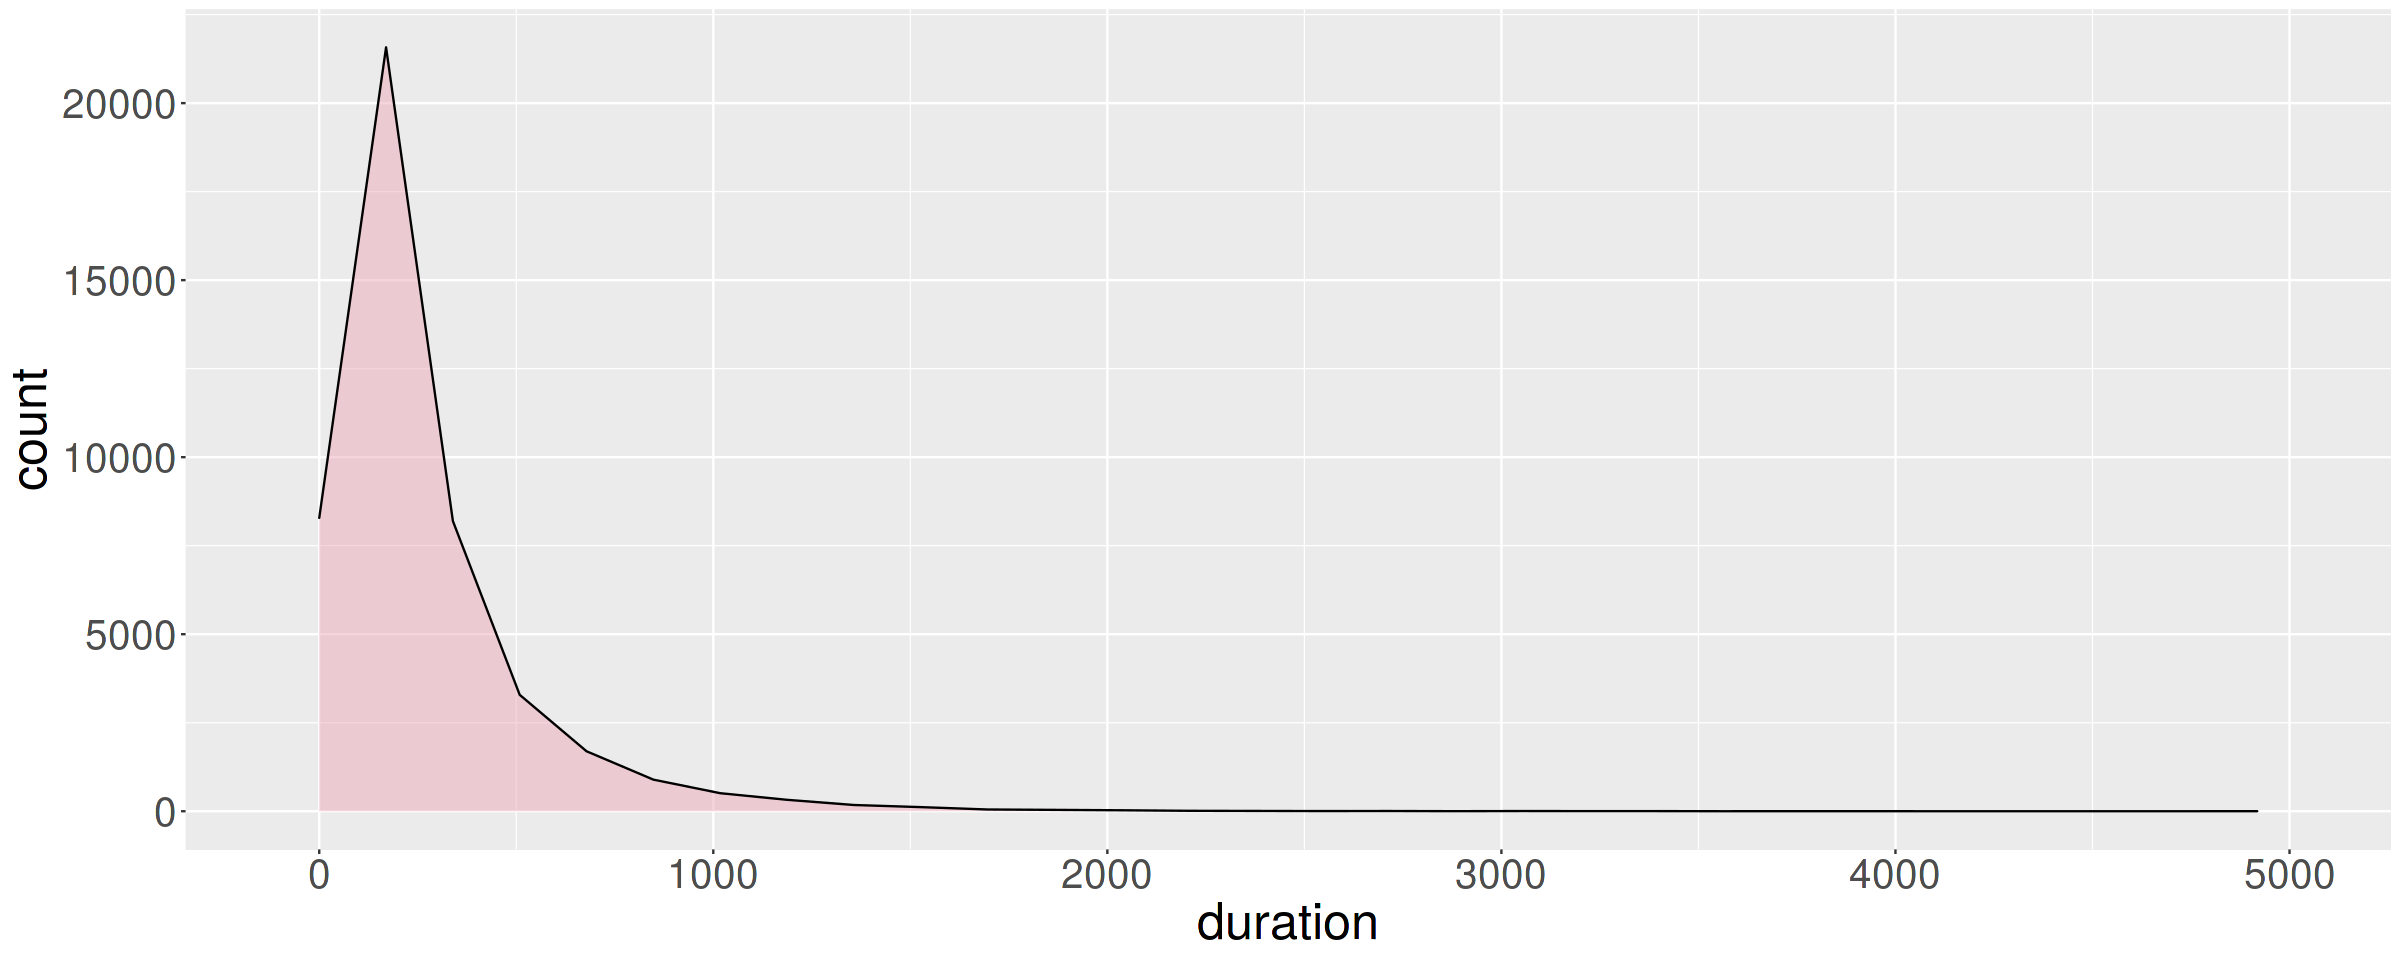

In [33]:
fig(20, 8)
duration_area <- ggplot(Mt_df, aes(duration))
duration_area + geom_area(stat = "bin", color = "black",fill = "pink2", alpha = 0.5) + theme(text = element_text(size=30))

In [34]:
summary(Mt_df$duration)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   103.0   180.0   258.2   319.0  4918.0 

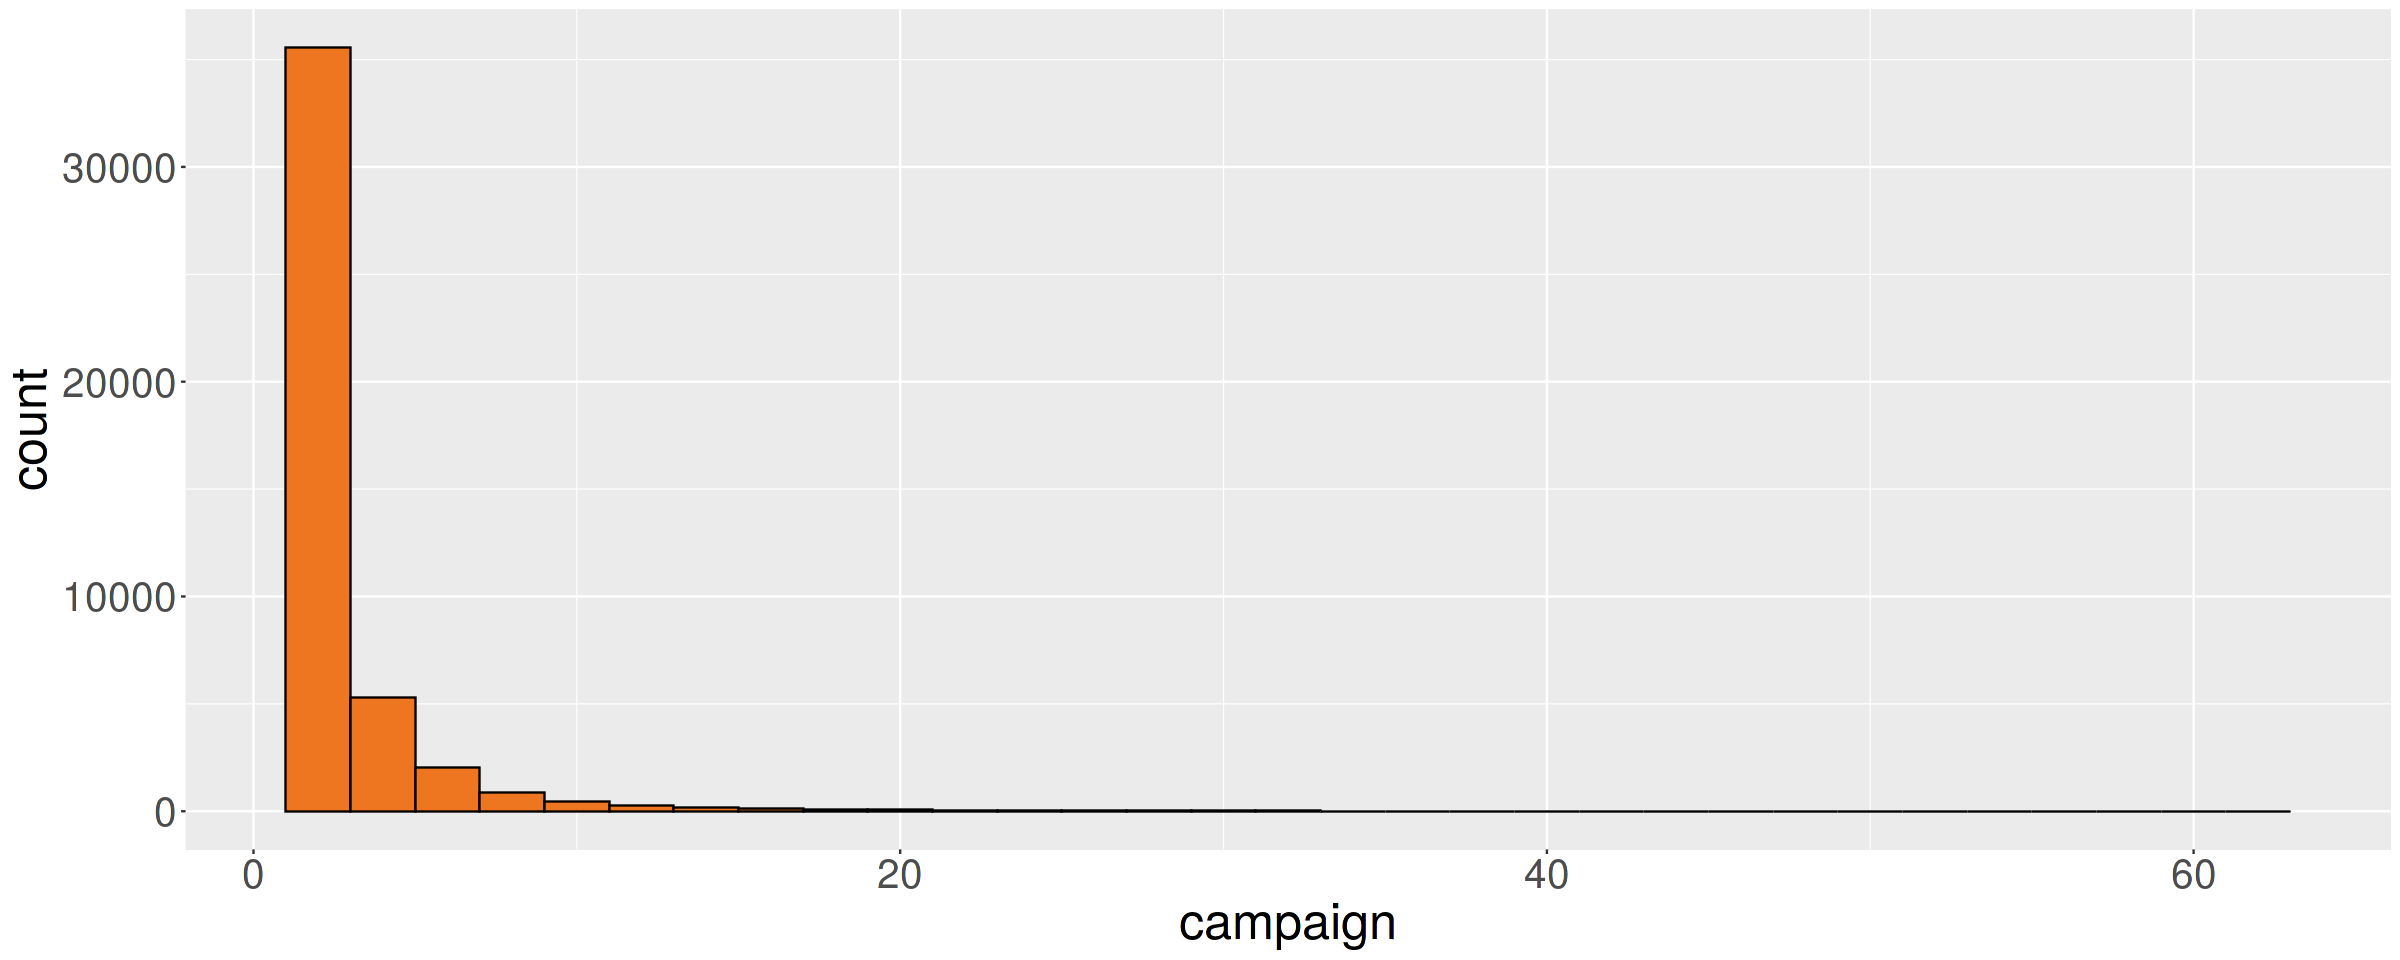

In [35]:
fig(20, 8)
campaign_hist <- ggplot(Mt_df, aes(campaign))
campaign_hist + geom_histogram(binwidth = 2, color = "black",fill = "chocolate2") + theme(text = element_text(size=30))

In [36]:
summary(Mt_df$campaign)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   2.764   3.000  63.000 

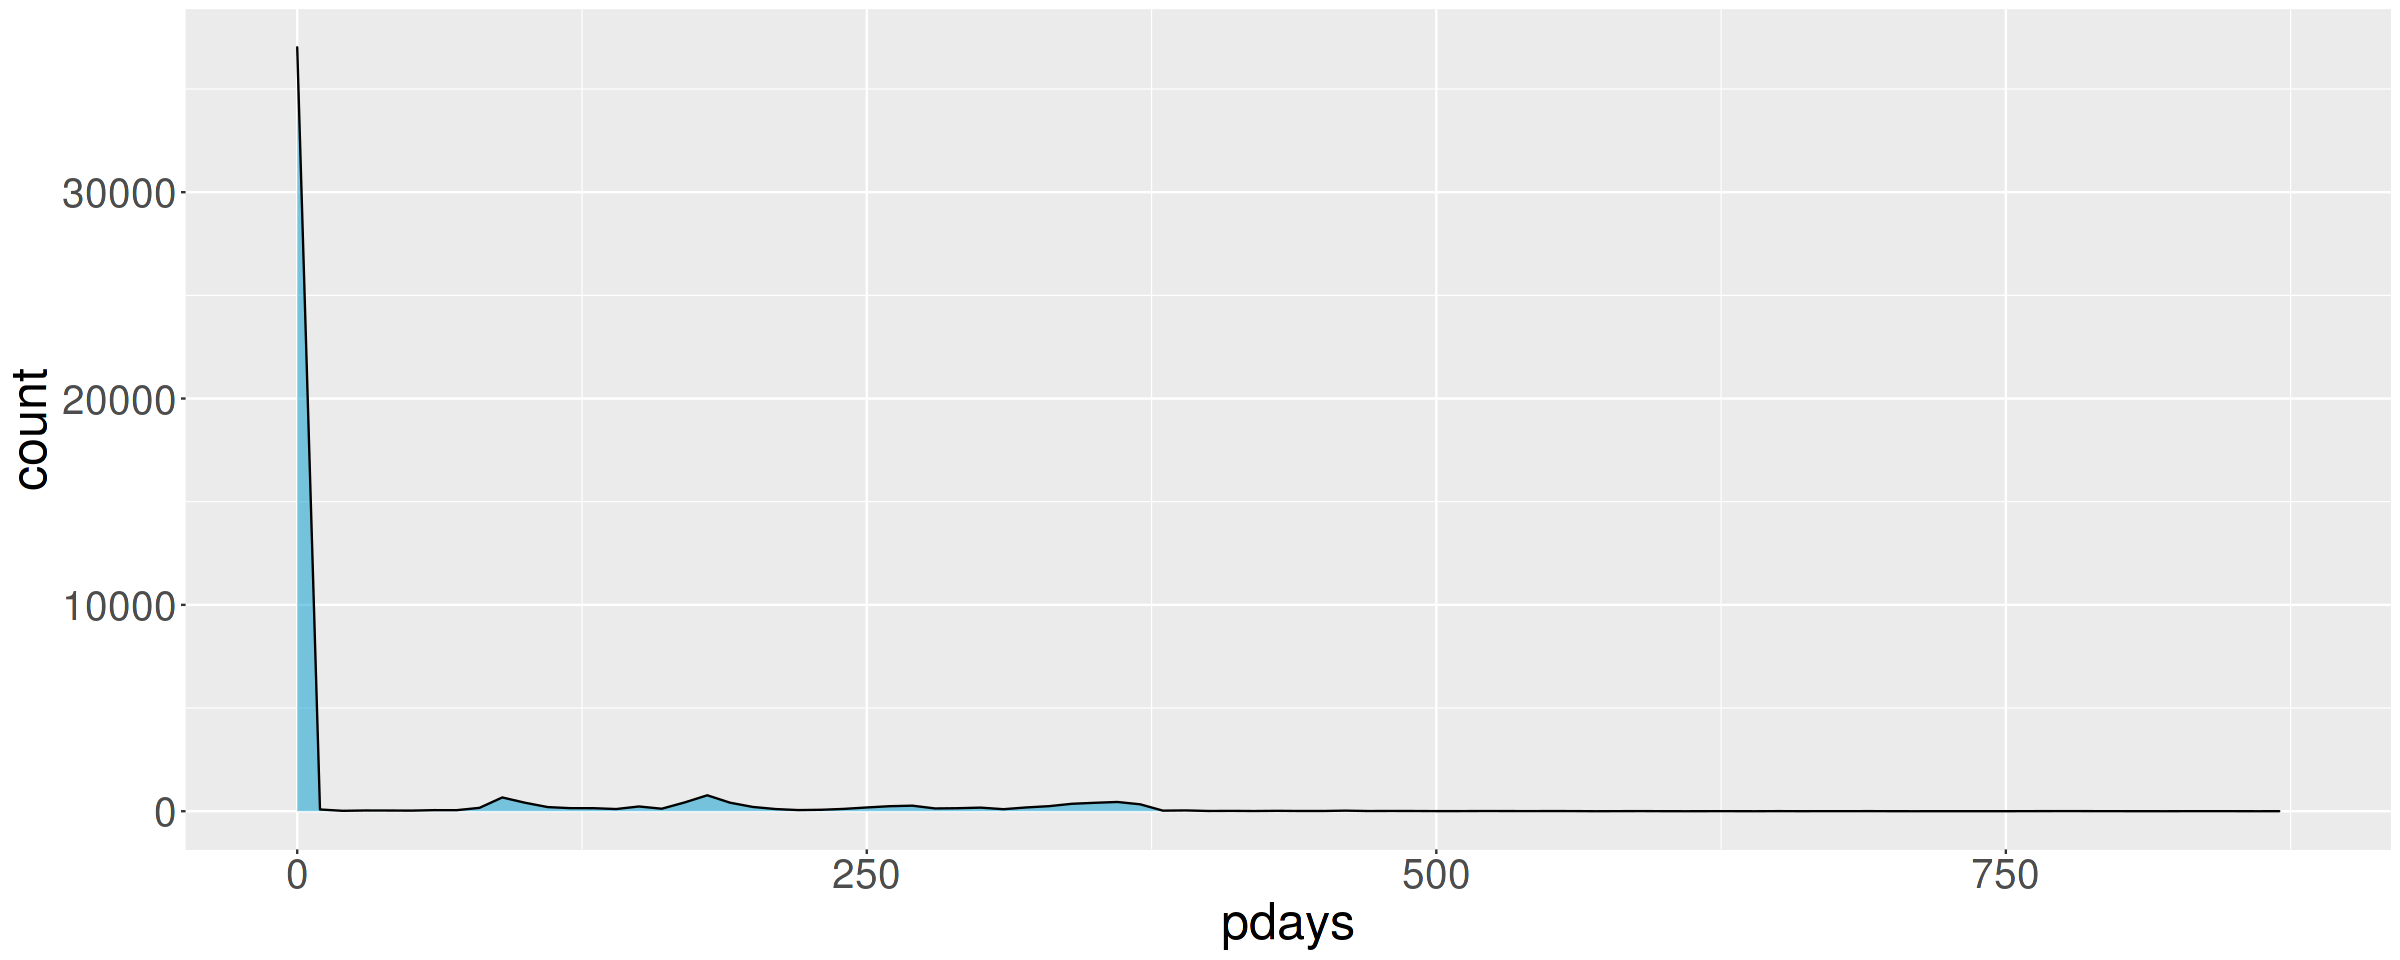

In [37]:
fig(20, 8)
pdays_area <- ggplot(Mt_df, aes(pdays))
pdays_area + geom_area(binwidth = 10, stat = "bin" ,alpha = 0.5, color = "black",fill = "deepskyblue3") + theme(text = element_text(size=30))

In [38]:
summary(Mt_df$pdays)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   -1.0    -1.0    -1.0    40.2    -1.0   871.0 

In [39]:
round(sum(Mt_df$pdays==-1)/nrow(Mt_df)*100,1)# % of cases which are -1 (meaning not previously contacted)

[1] 81.7

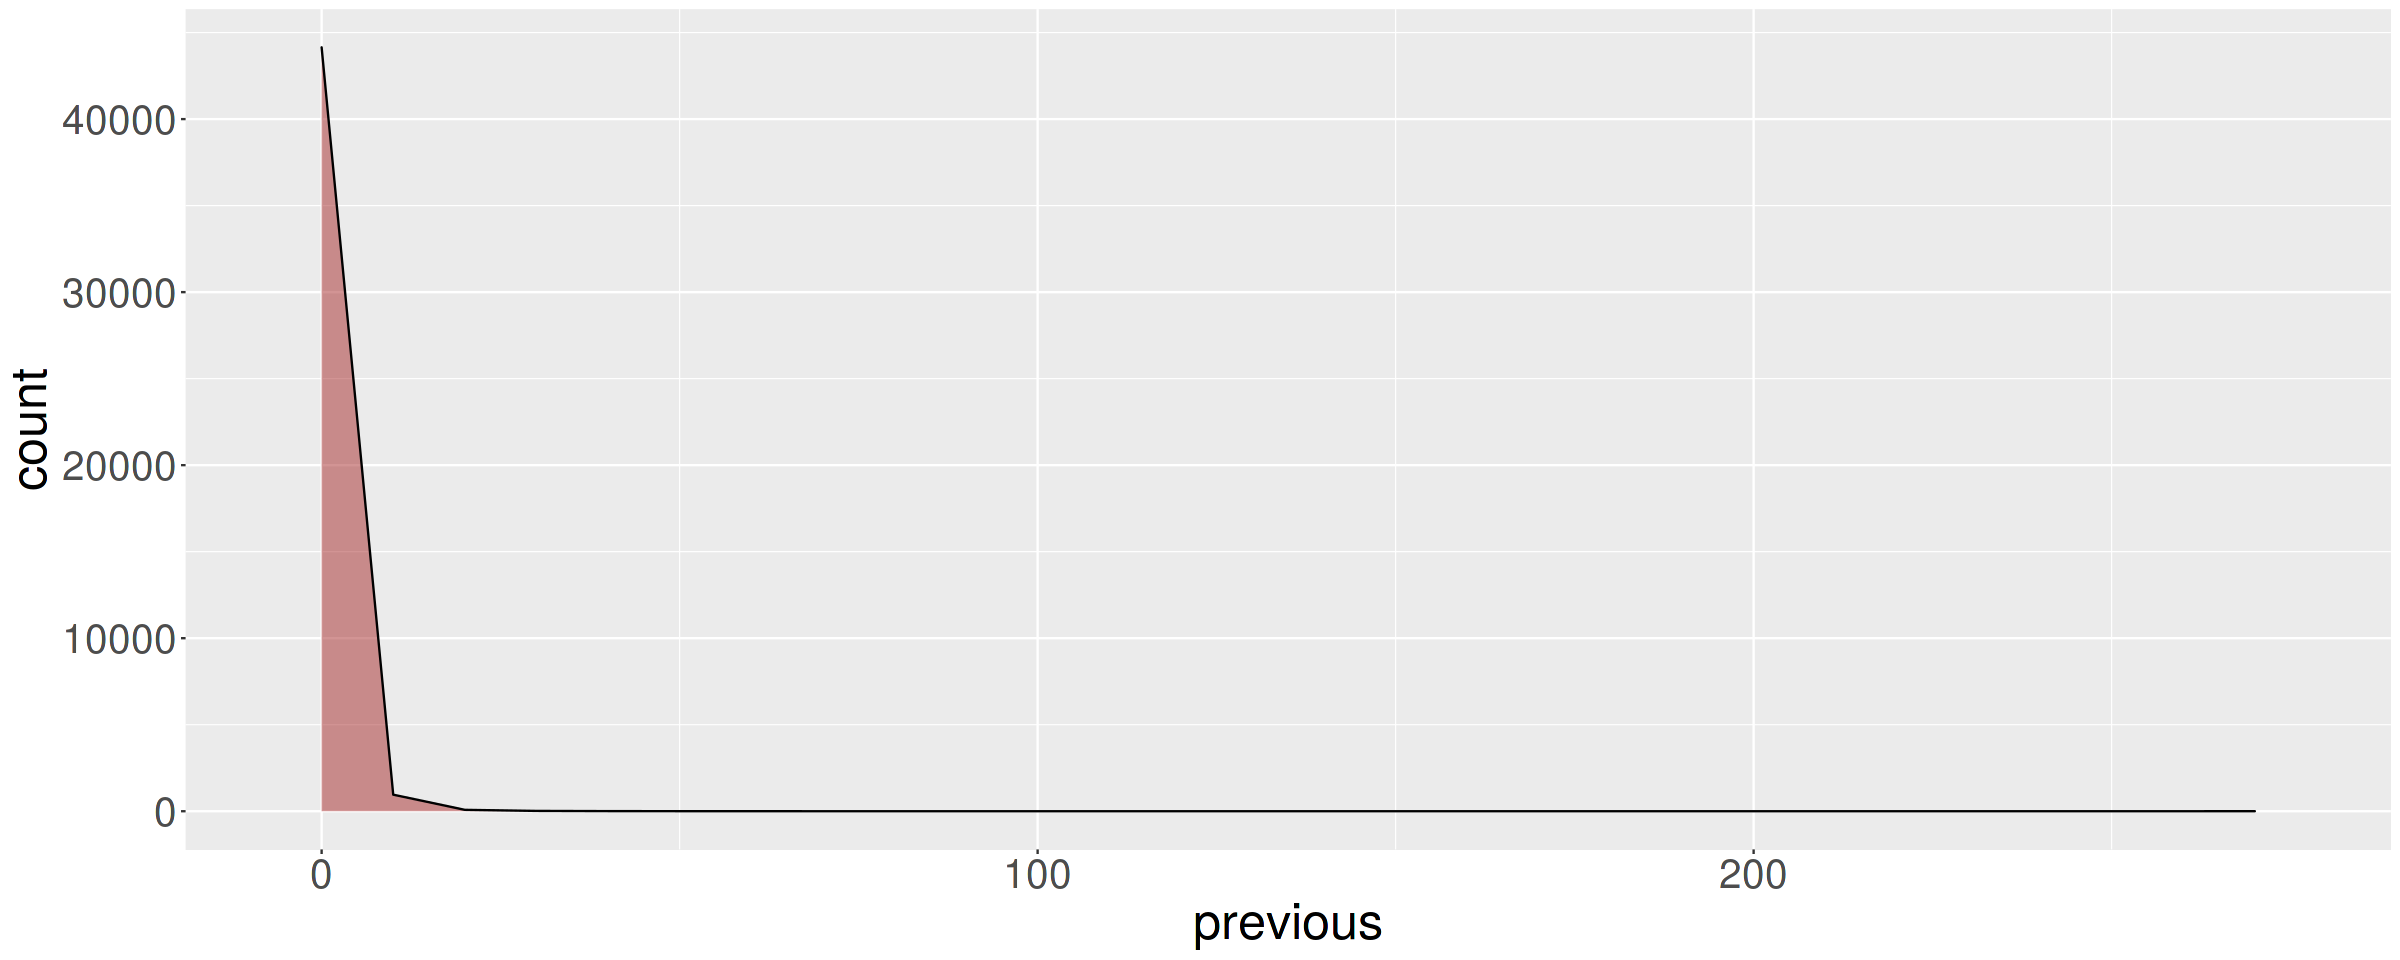

In [40]:
fig(20, 8)
previous_area <- ggplot(Mt_df, aes(previous))
previous_area + geom_area(binwidth = 10, stat = "bin" ,alpha = 0.5, color = "black",fill = "brown") + theme(text = element_text(size=30))

In [41]:
summary(Mt_df$previous)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.0000   0.0000   0.0000   0.5803   0.0000 275.0000 

In [42]:
round(sum(Mt_df$previous==0)/nrow(Mt_df)*100,1)# % of cases which are 0 (meaning not previously contacted)

[1] 81.7

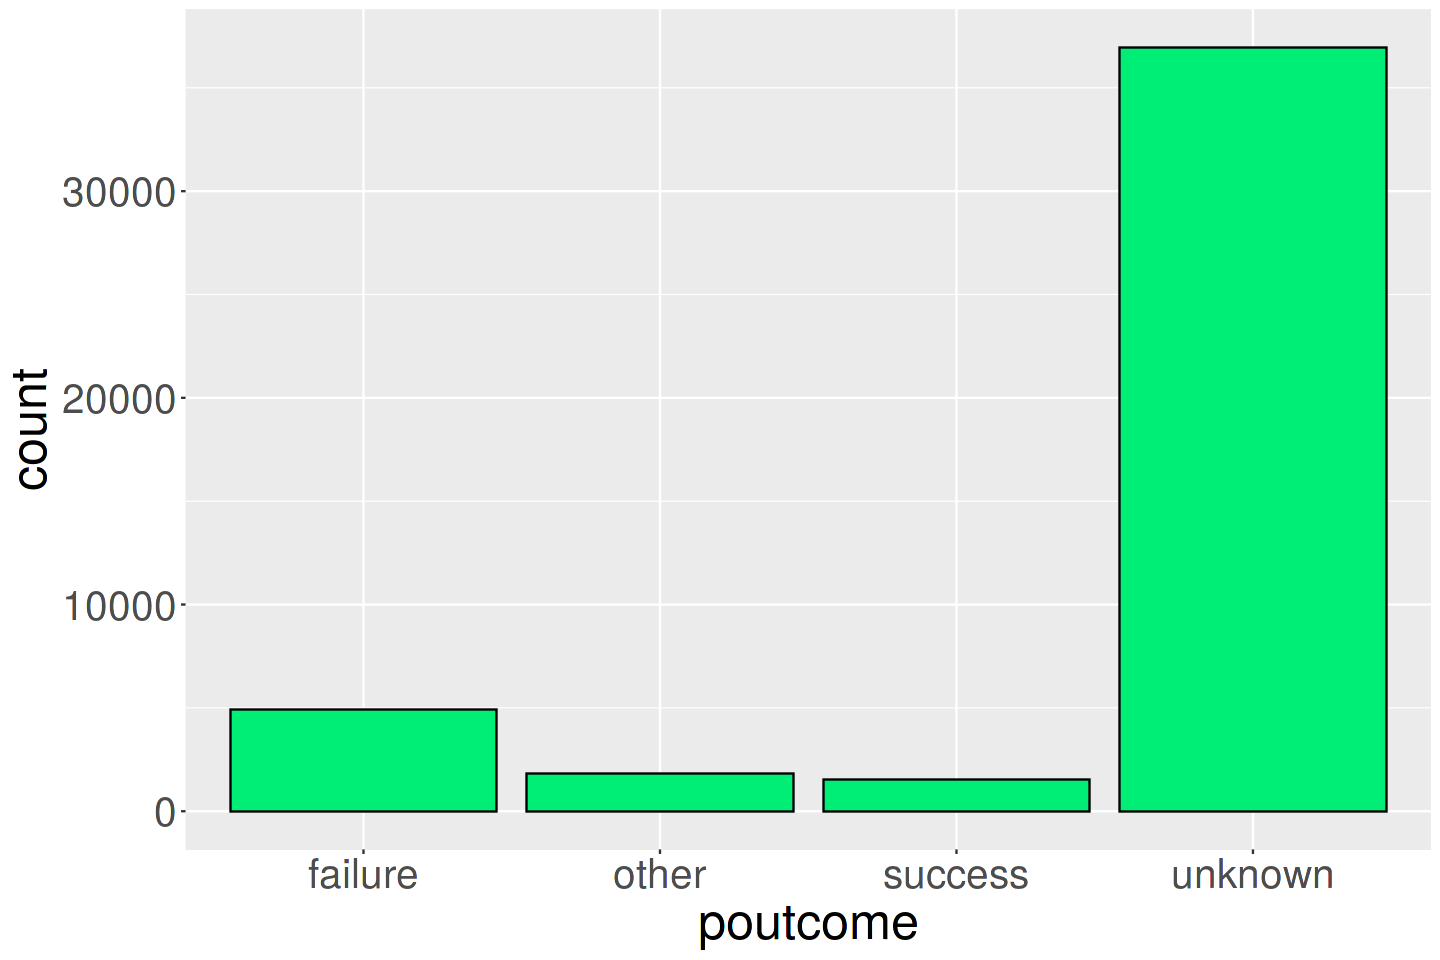

In [43]:
fig(12,8)
poutcome_bar <- ggplot(Mt_df, aes(poutcome))
poutcome_bar + geom_bar(color = "black",fill = "springgreen2") + theme(text = element_text(size=30))

In [44]:
round(prop.table(table(Mt_df$poutcome))*100,1)


failure   other success unknown 
   10.8     4.1     3.3    81.7 

# Statistical Models For Classification

## K Nearest Neighbors

![](https://machinelearningknowledge.ai/wp-content/uploads/2018/08/KNN-Classification.gif)

**the steps for making this knn model:**

1. creating a copy of the dataset.
2. converting all X variables that are factors to numeric
3. scaling all the X variables.
4. using linear regression for each x to y for feature selection
5. using accuracy to decide the best k for the model.
6. making a confution matrix and calculating classification metrics for each step (for comparison).

### preprocessing

In [45]:
knn.df <- Mt_df
head(knn.df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [46]:
for (i in 1:16)
{
    knn.df[,i] <- as.numeric(knn.df[,i])
}
knn.df$pdays[knn.df$pdays==-1]=0 
knn.df$previous[knn.df$previous==-1]=0 
head(knn.df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,58,5,2,3,1,2143,2,1,3,5,5,261,1,0,0,4,no
2,44,10,3,2,1,29,2,1,3,5,5,151,1,0,0,4,no
3,33,3,2,2,1,2,2,2,3,5,5,76,1,0,0,4,no
4,47,2,2,4,1,1506,2,1,3,5,5,92,1,0,0,4,no
5,33,12,3,4,1,1,1,1,3,5,5,198,1,0,0,4,no
6,35,5,2,3,1,231,2,1,3,5,5,139,1,0,0,4,no


In [47]:
knn.df1 <- sapply(knn.df[,1:16],scale)
knn.df1 <- as.data.frame(knn.df1)
knn.df <- cbind(knn.df1,knn.df$y)
head(knn.df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,knn.df$y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1.6069472,-0.1038185,-0.2757587,1.0363504,-0.1354884,0.25641642,0.8939055,-0.4367986,1.514289,-1.298462,-0.4753484,0.01101598,-0.5693443,-0.4110043,-0.2519376,0.4448932,no
2,0.2885261,1.4239921,1.3683568,-0.3005525,-0.1354884,-0.43788985,0.8939055,-0.4367986,1.514289,-1.298462,-0.4753484,-0.41612236,-0.5693443,-0.4110043,-0.2519376,0.4448932,no
3,-0.7473762,-0.7149428,-0.2757587,-0.3005525,-0.1354884,-0.44675753,0.8939055,2.2893338,1.514289,-1.298462,-0.4753484,-0.70735304,-0.5693443,-0.4110043,-0.2519376,0.4448932,no
4,0.5710449,-1.0205049,-0.2757587,2.3732533,-0.1354884,0.04720492,0.8939055,-0.4367986,1.514289,-1.298462,-0.4753484,-0.64522382,-0.5693443,-0.4110043,-0.2519376,0.4448932,no
5,-0.7473762,2.0351163,1.3683568,2.3732533,-0.1354884,-0.44708596,-1.1186617,-0.4367986,1.514289,-1.298462,-0.4753484,-0.23361780,-0.5693443,-0.4110043,-0.2519376,0.4448932,no
6,-0.5590303,-0.1038185,-0.2757587,1.0363504,-0.1354884,-0.37154649,0.8939055,-0.4367986,1.514289,-1.298462,-0.4753484,-0.46271926,-0.5693443,-0.4110043,-0.2519376,0.4448932,no


### feature selection

In [48]:
# significance level using linear regression
knn.df1 <- knn.df 
knn.df1[,17] <- as.numeric(knn.df1[,17])
for (i in 1:16)
{
  print(names(knn.df1)[i]) 
  print(summary(lm(knn.df1[,17]~knn.df1[,i],knn.df1)))
}

[1] "age"

Call:
lm(formula = knn.df1[, 17] ~ knn.df1[, i], data = knn.df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.1582 -0.1216 -0.1140 -0.1094  0.9005 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.116985   0.001511  739.18  < 2e-16 ***
knn.df1[, i] 0.008085   0.001511    5.35 8.83e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3213 on 45209 degrees of freedom
Multiple R-squared:  0.0006328,	Adjusted R-squared:  0.0006107 
F-statistic: 28.63 on 1 and 45209 DF,  p-value: 8.826e-08

[1] "job"

Call:
lm(formula = knn.df1[, 17] ~ knn.df1[, i], data = knn.df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.1434 -0.1275 -0.1156 -0.1037  0.9002 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.11698    0.00151 739.548   <2e-16 ***
knn.df1[, i]  0.01300    0.00151   8.605   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.

In [49]:
set.seed(8)
train.size = floor(0.75*nrow(knn.df))
train.index = sample(1:nrow(knn.df), train.size)
train.set = knn.df[train.index,]
test.set = knn.df[-train.index,]

x.train = train.set[,-17] 
x.test = test.set[,-17] 
y.train = train.set[,17] 
y.test = test.set[,17] 

knn.3 <- knn(train = x.train, test = x.test, cl = y.train , k = 3)
TB = table(predicted = knn.3, true = y.test)
accuracy = round((TB[1]+TB[4])/sum(TB)*100,2)
accuracy

[1] 88.91

In [50]:
TB

         true
predicted   no  yes
      no  9539  853
      yes  401  510

In [51]:
library(caret)

# data/code from "2 class example" example courtesy of ?caret::confusionMatrix

lvs <- c("no", "yes")
truth <- factor(rep(lvs, times = c(9940, 1363)),
                levels = rev(lvs))
pred <- factor(
  c(
    rep(lvs, times = c(9539, 401)),
    rep(lvs, times = c(853, 510))),
  levels = rev(lvs))

caret::confusionMatrix(pred, truth)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




Confusion Matrix and Statistics

          Reference
Prediction  yes   no
       yes  510  401
       no   853 9539
                                          
               Accuracy : 0.8891          
                 95% CI : (0.8831, 0.8948)
    No Information Rate : 0.8794          
    P-Value [Acc > NIR] : 0.0007691       
                                          
                  Kappa : 0.3896          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.37417         
            Specificity : 0.95966         
         Pos Pred Value : 0.55982         
         Neg Pred Value : 0.91792         
             Prevalence : 0.12059         
         Detection Rate : 0.04512         
   Detection Prevalence : 0.08060         
      Balanced Accuracy : 0.66692         
                                          
       'Positive' Class : yes             
                        

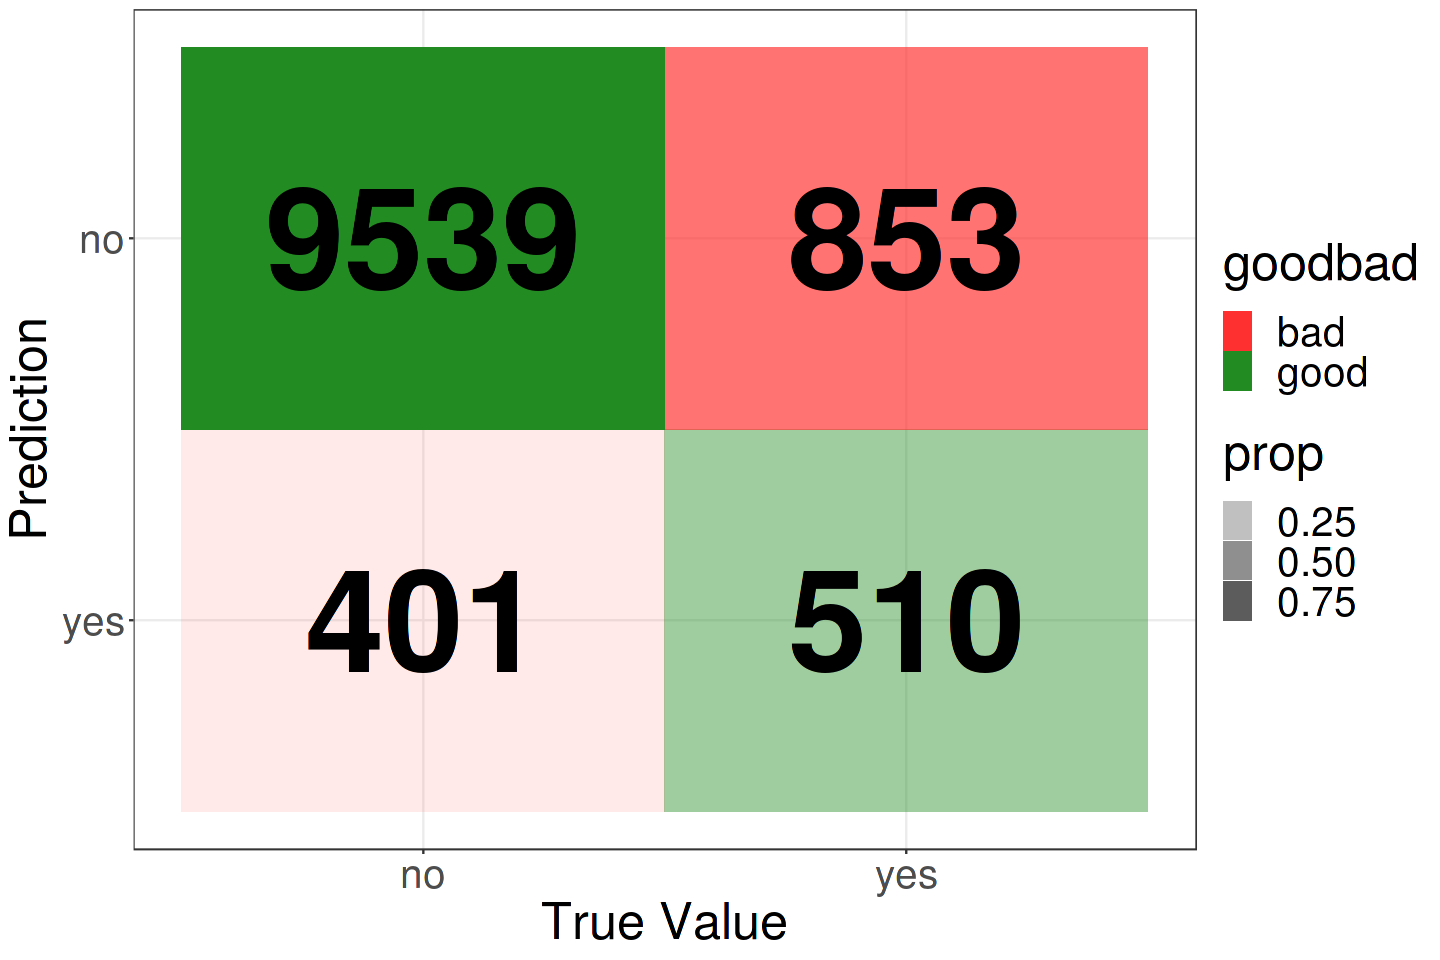

In [52]:
table <- data.frame(caret::confusionMatrix(pred, truth)$table)

plotTable <- table %>%
  mutate(goodbad = ifelse(table$Prediction == table$Reference, "good", "bad")) %>%
  group_by(Reference) %>%
  mutate(prop = Freq/sum(Freq))

# fill alpha relative to sensitivity/specificity by proportional outcomes within reference groups (see dplyr code above as well as original confusion matrix for comparison)
ggplot(data = plotTable, mapping = aes(x = Reference, y = Prediction, fill = goodbad, alpha = prop)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = .5, fontface  = "bold", alpha = 1,size = 30) +
  scale_fill_manual(values = c(good = "forestgreen", bad = "firebrick1")) +
  theme_bw() +
  xlim(rev(levels(table$Reference))) +
theme(text = element_text(size=30)) +
xlab("True Value")

1 = 87.43696 
3 = 88.9056 
5 = 89.27718 
7 = 89.46297 
9 = 89.3922 
11 = 89.57799 
13 = 89.51606 
15 = 89.59568 
17 = 89.56029 
19 = 89.5426 
21 = 89.53375 
23 = 89.48067 
25 = 89.47182 
27 = 89.5426 
29 = 89.58684 


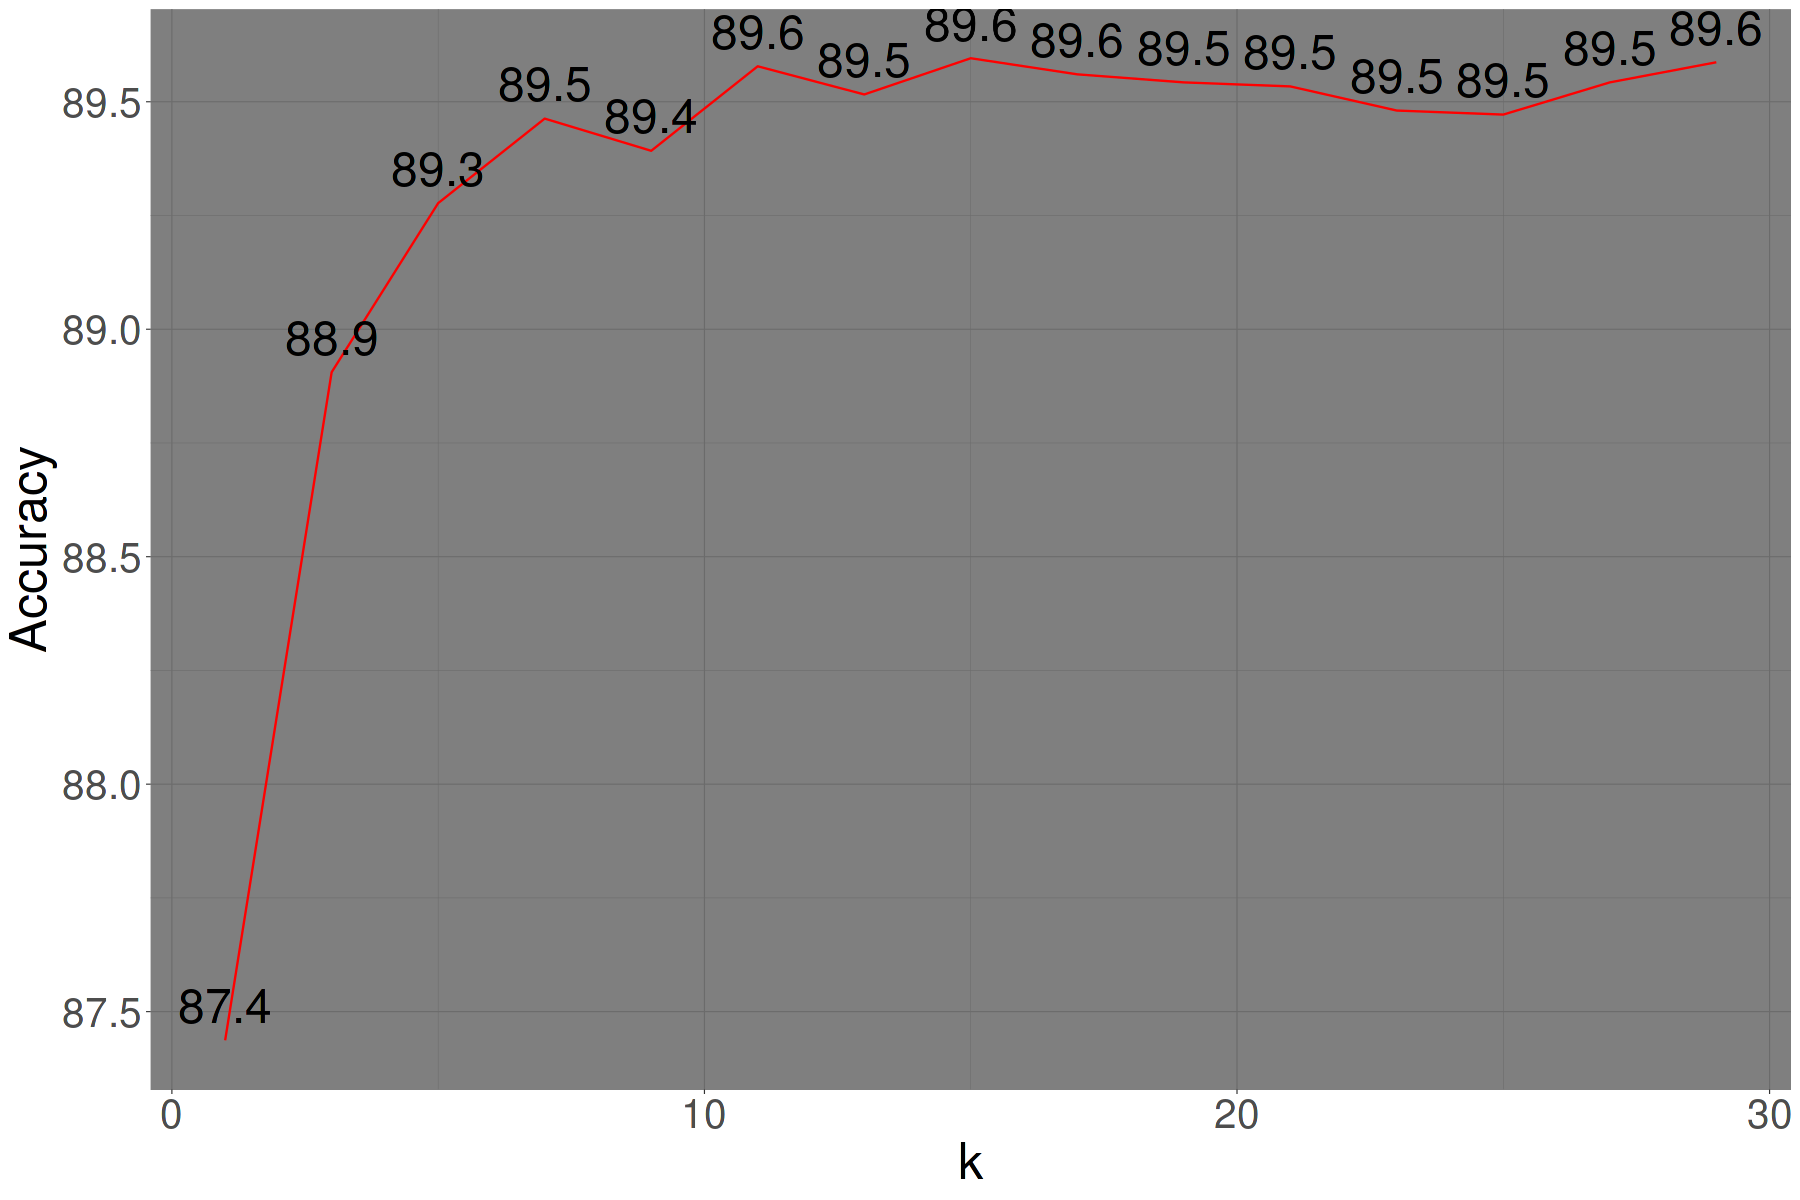

In [53]:
fig(15,10)
k = seq(1,29,2)
i=1 
Accuracy=1                     

for (i in k)
{
  knn.mod <-  knn(train=x.train, test=x.test, cl=y.train, k=i)
  Accuracy[i] <- 100 * sum(y.test == knn.mod)/length(y.test)
  k=i  
  cat(k,'=',Accuracy[i],'\n')        
}

Accuracy = Accuracy[!is.na(Accuracy)]
k = seq(1,29,2)
Accuracyplot = data.frame(k,Accuracy)
#plot our k
ggplot(Accuracyplot,aes(x=k,y=Accuracy))+
  geom_line(col = "red")+
  expand_limits(y=Accuracy[0])+
  theme_dark() +
  geom_text(aes(label=round(Accuracy,1)),vjust = -0.5,size = 10) + 
  theme(text = element_text(size=30))



In [54]:
knn.15 <- knn(train = x.train, test = x.test, cl = y.train , k = 15)
TB = table(predicted = knn.15, true = y.test)
TB


         true
predicted   no  yes
      no  9744  980
      yes  196  383

In [55]:
library(caret)

# data/code from "2 class example" example courtesy of ?caret::confusionMatrix

lvs <- c("no", "yes")
truth <- factor(rep(lvs, times = c(9940, 1363)),
                levels = rev(lvs))
pred <- factor(
  c(
    rep(lvs, times = c(9744, 196)),
    rep(lvs, times = c(980, 383))),
  levels = rev(lvs))

caret::confusionMatrix(pred, truth)

Confusion Matrix and Statistics

          Reference
Prediction  yes   no
       yes  383  196
       no   980 9744
                                          
               Accuracy : 0.896           
                 95% CI : (0.8902, 0.9015)
    No Information Rate : 0.8794          
    P-Value [Acc > NIR] : 1.943e-08       
                                          
                  Kappa : 0.3475          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.28100         
            Specificity : 0.98028         
         Pos Pred Value : 0.66149         
         Neg Pred Value : 0.90862         
             Prevalence : 0.12059         
         Detection Rate : 0.03388         
   Detection Prevalence : 0.05123         
      Balanced Accuracy : 0.63064         
                                          
       'Positive' Class : yes             
                        

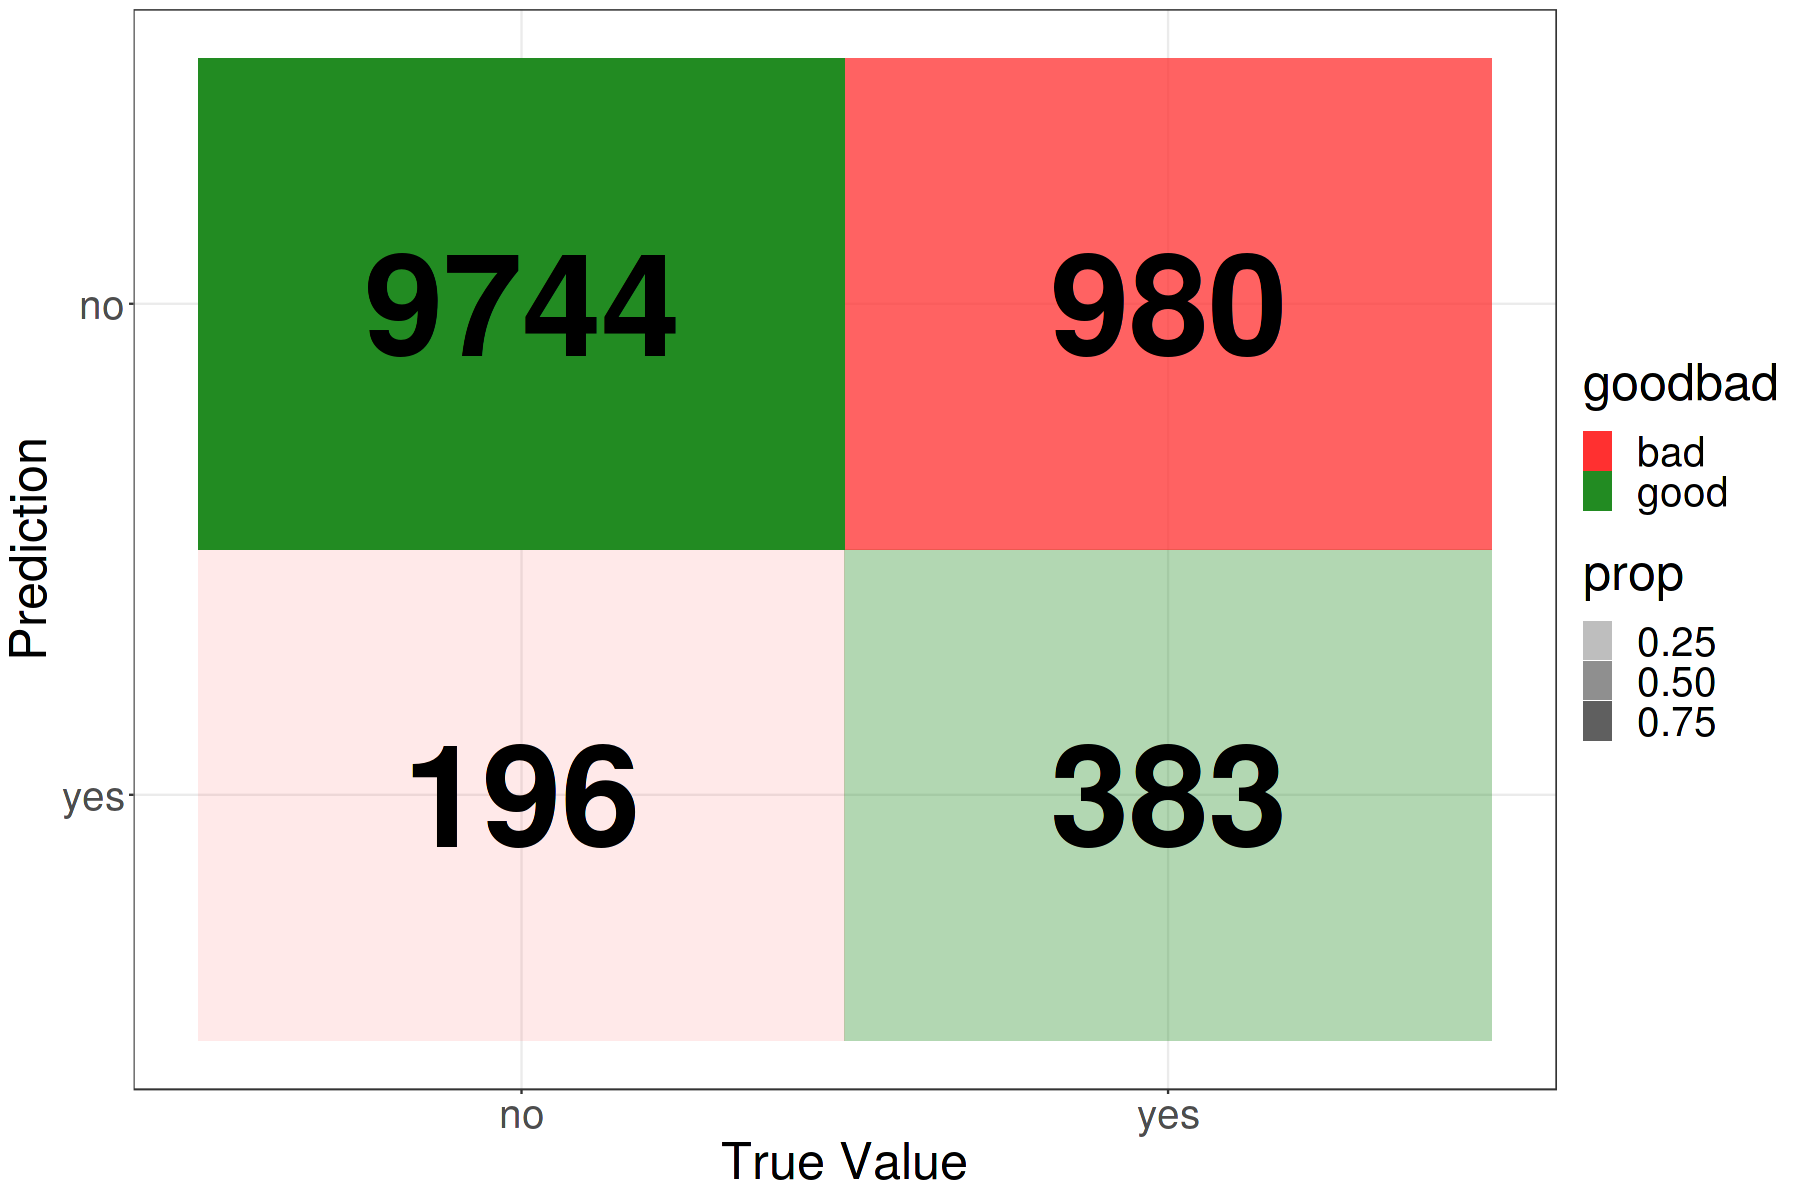

In [56]:
library(ggplot2)
library(dplyr)

table <- data.frame(caret::confusionMatrix(pred, truth)$table)

plotTable <- table %>%
  mutate(goodbad = ifelse(table$Prediction == table$Reference, "good", "bad")) %>%
  group_by(Reference) %>%
  mutate(prop = Freq/sum(Freq))

# fill alpha relative to sensitivity/specificity by proportional outcomes within reference groups (see dplyr code above as well as original confusion matrix for comparison)
ggplot(data = plotTable, mapping = aes(x = Reference, y = Prediction, fill = goodbad, alpha = prop)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = .5, fontface  = "bold", alpha = 1,size = 30) +
  scale_fill_manual(values = c(good = "forestgreen", bad = "firebrick1")) +
  theme_bw() +
  xlim(rev(levels(table$Reference))) +
theme(text = element_text(size=30)) +
xlab("True Value")

## Logistic Regression

![](https://www.equiskill.com/wp-content/uploads/2018/07/WhatsApp-Image-2020-02-11-at-8.30.11-PM.jpeg)


**the steps for making this lr model:**

1. creating a copy of the dataset.
2. creating dummy variables and checking for statistical significance.
3. creating the model.
4. checking the model at optimal cutoff.
4. making a confution matrix and calculating classification metrics for each step (for comparison).

### preprocessing

In [57]:
lr.df <- Mt_df
head(lr.df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [58]:
library(fastDummies)
lr.df = dummy_cols(lr.df, select_columns = c("job","marital","education","contact","month","poutcome"))
head(lr.df)

,age,job,marital,education,default,balance,housing,loan,contact,day,⋯,month_jul,month_aug,month_sep,month_oct,month_nov,month_dec,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,⋯,0,0,0,0,0,0,0,0,0,1
2,44,technician,single,secondary,no,29,yes,no,unknown,5,⋯,0,0,0,0,0,0,0,0,0,1
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,⋯,0,0,0,0,0,0,0,0,0,1
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,⋯,0,0,0,0,0,0,0,0,0,1
5,33,unknown,single,unknown,no,1,no,no,unknown,5,⋯,0,0,0,0,0,0,0,0,0,1
6,35,management,married,tertiary,no,231,yes,no,unknown,5,⋯,0,0,0,0,0,0,0,0,0,1


In [59]:
# significance level using linear regression
lr.df1 <- lr.df 
lr.df1[,17] <- as.numeric(lr.df1[,17])
for (i in 18:55)
{
  print(names(lr.df1)[i]) 
  print(summary(lm(lr.df1[,17]~lr.df1[,i],lr.df1)))
}

[1] "job_admin."

Call:
lm(formula = lr.df1[, 17] ~ lr.df1[, i], data = lr.df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.1220 -0.1163 -0.1163 -0.1163  0.8837 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.116334   0.001606 695.008   <2e-16 ***
lr.df1[, i] 0.005693   0.004749   1.199    0.231    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3214 on 45209 degrees of freedom
Multiple R-squared:  3.178e-05,	Adjusted R-squared:  9.662e-06 
F-statistic: 1.437 on 1 and 45209 DF,  p-value: 0.2307

[1] "job_blue-collar"

Call:
lm(formula = lr.df1[, 17] ~ lr.df1[, i], data = lr.df1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.12912 -0.12912 -0.12912 -0.07275  0.92725 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.129119   0.001702  663.43   <2e-16 ***
lr.df1[, i] -0.056369   0.003668  -15.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’

In [60]:
str(lr.df)

'data.frame':	45211 obs. of  55 variables:
 $ age                : int  58 44 33 47 33 35 28 42 58 43 ...
 $ job                : Factor w/ 12 levels "admin.","blue-collar",..: 5 10 3 2 12 5 5 3 6 10 ...
 $ marital            : Factor w/ 3 levels "divorced","married",..: 2 3 2 2 3 2 3 1 2 3 ...
 $ education          : Factor w/ 4 levels "primary","secondary",..: 3 2 2 4 4 3 3 3 1 2 ...
 $ default            : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 2 1 1 ...
 $ balance            : int  2143 29 2 1506 1 231 447 2 121 593 ...
 $ housing            : Factor w/ 2 levels "no","yes": 2 2 2 2 1 2 2 2 2 2 ...
 $ loan               : Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 2 1 1 1 ...
 $ contact            : Factor w/ 3 levels "cellular","telephone",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ day                : int  5 5 5 5 5 5 5 5 5 5 ...
 $ month              : Factor w/ 12 levels "jan","feb","mar",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ duration           : int  261 151 76 92 198 139 217 380 50 55 ...


In [61]:
lr.df <- lr.df[,-c(2,3,4,9,11,16,18,24,27,29,30,40,47)]
head(lr.df)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,⋯,month_jun,month_jul,month_sep,month_oct,month_nov,month_dec,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
,<int>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,58,no,2143,yes,no,5,261,1,-1,0,⋯,0,0,0,0,0,0,0,0,0,1
2,44,no,29,yes,no,5,151,1,-1,0,⋯,0,0,0,0,0,0,0,0,0,1
3,33,no,2,yes,yes,5,76,1,-1,0,⋯,0,0,0,0,0,0,0,0,0,1
4,47,no,1506,yes,no,5,92,1,-1,0,⋯,0,0,0,0,0,0,0,0,0,1
5,33,no,1,no,no,5,198,1,-1,0,⋯,0,0,0,0,0,0,0,0,0,1
6,35,no,231,yes,no,5,139,1,-1,0,⋯,0,0,0,0,0,0,0,0,0,1


In [62]:
lr.df$default = as.numeric(lr.df$default)
lr.df$housing = as.numeric(lr.df$housing)
lr.df$loan = as.numeric(lr.df$loan)
lr.df$y = as.numeric(lr.df$y)

lr.df$default = ifelse(lr.df$default == 2, 1, 0)
lr.df$housing = ifelse(lr.df$housing == 2, 1, 0)
lr.df$loan = ifelse(lr.df$loan == 2, 1, 0)
lr.df$y = ifelse(lr.df$y == 2, 1, 0)

str(lr.df)

'data.frame':	45211 obs. of  42 variables:
 $ age                : int  58 44 33 47 33 35 28 42 58 43 ...
 $ default            : num  0 0 0 0 0 0 0 1 0 0 ...
 $ balance            : int  2143 29 2 1506 1 231 447 2 121 593 ...
 $ housing            : num  1 1 1 1 0 1 1 1 1 1 ...
 $ loan               : num  0 0 1 0 0 0 1 0 0 0 ...
 $ day                : int  5 5 5 5 5 5 5 5 5 5 ...
 $ duration           : int  261 151 76 92 198 139 217 380 50 55 ...
 $ campaign           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays              : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previous           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ y                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ job_blue-collar    : int  0 0 0 1 0 0 0 0 0 0 ...
 $ job_entrepreneur   : int  0 0 1 0 0 0 0 1 0 0 ...
 $ job_housemaid      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ job_management     : int  1 0 0 0 0 1 1 0 0 0 ...
 $ job_retired        : int  0 0 0 0 0 0 0 0 1 0 ...
 $ job_services       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ jo


Attaching package: ‘InformationValue’


The following objects are masked from ‘package:caret’:

    confusionMatrix, precision, sensitivity, specificity





Call:
glm(formula = y ~ ., family = binomial(link = "logit"), data = train.set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.8655  -0.3747  -0.2531  -0.1519   3.3571  

Coefficients: (3 not defined because of singularities)
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -4.831e+00  2.096e-01 -23.052  < 2e-16 ***
age                  1.688e-04  2.537e-03   0.067 0.946940    
default             -3.911e-01  2.137e-01  -1.830 0.067239 .  
balance              1.717e-05  6.230e-06   2.756 0.005846 ** 
housing             -7.049e-01  5.078e-02 -13.882  < 2e-16 ***
loan                -4.427e-01  7.013e-02  -6.312 2.75e-10 ***
day                  7.729e-03  2.765e-03   2.795 0.005186 ** 
duration             4.137e-03  7.420e-05  55.752  < 2e-16 ***
campaign            -8.522e-02  1.153e-02  -7.395 1.42e-13 ***
pdays               -4.307e-04  3.519e-04  -1.224 0.220996    
previous             4.900e-03  6.481e-03   0.756 0.4495

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


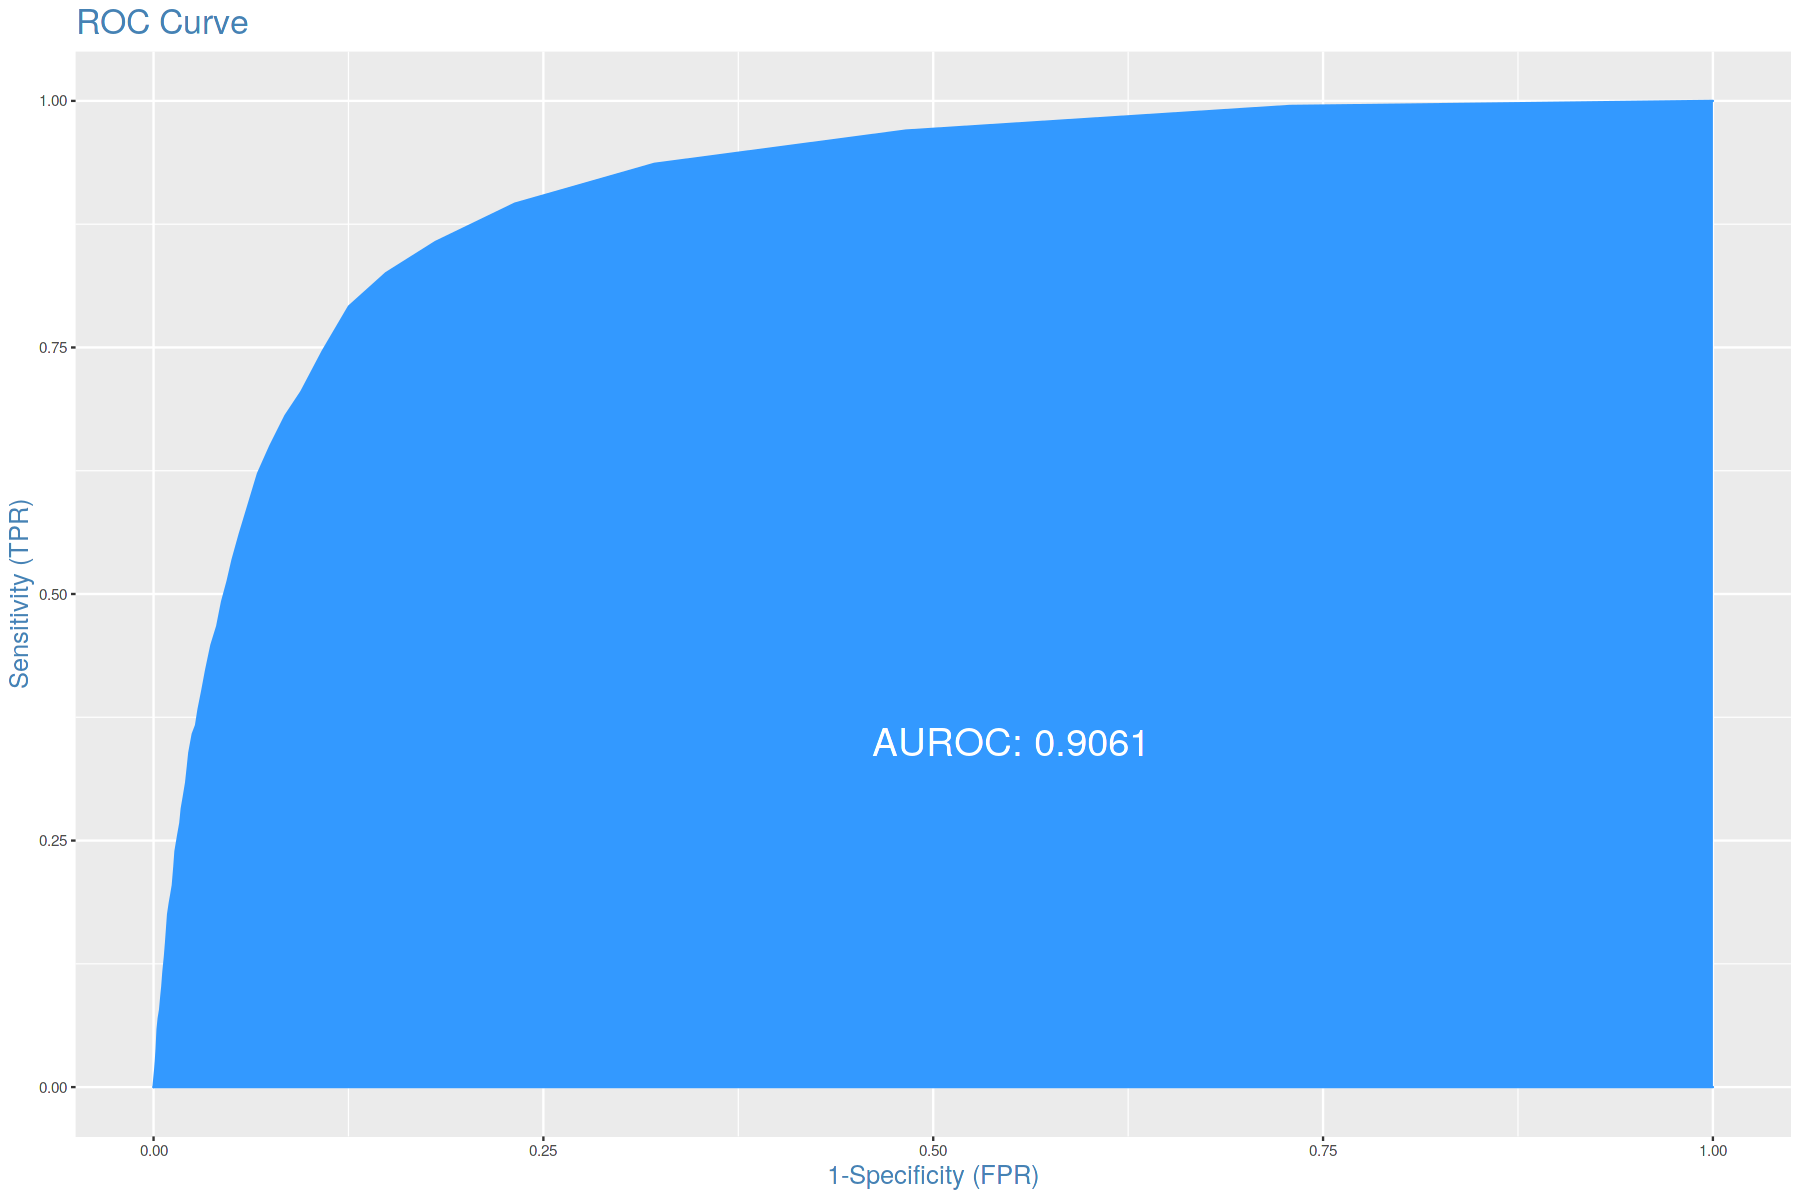

In [63]:
#library(mccr)
library(InformationValue)
set.seed(8)
train.size = floor(0.75*nrow(lr.df))
train.index = sample(1:nrow(lr.df), train.size)
train.set = lr.df[train.index,]
test.set = lr.df[-train.index,]


logit_reg = glm(y ~ ., data = train.set, family = binomial(link = "logit"))
summary(logit_reg)

Prediction = predict(logit_reg, test.set, type = "response")
plotROC(test.set$y, Prediction)

In [64]:
confusionMatrix(test.set$y,Prediction, threshold = 0.5)

,0,1
,<int>,<int>
0,9712,901
1,228,462


In [65]:
library(caret)

lvs <- c("no", "yes")
truth <- factor(rep(lvs, times = c(9940, 1363)),
                levels = rev(lvs))
pred <- factor(
  c(
    rep(lvs, times = c(9712, 228)),
    rep(lvs, times = c(901, 462))),
  levels = rev(lvs))

caret::confusionMatrix(pred, truth)

Confusion Matrix and Statistics

          Reference
Prediction  yes   no
       yes  462  228
       no   901 9712
                                          
               Accuracy : 0.9001          
                 95% CI : (0.8944, 0.9056)
    No Information Rate : 0.8794          
    P-Value [Acc > NIR] : 2.249e-12       
                                          
                  Kappa : 0.4016          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.33896         
            Specificity : 0.97706         
         Pos Pred Value : 0.66957         
         Neg Pred Value : 0.91510         
             Prevalence : 0.12059         
         Detection Rate : 0.04087         
   Detection Prevalence : 0.06105         
      Balanced Accuracy : 0.65801         
                                          
       'Positive' Class : yes             
                        

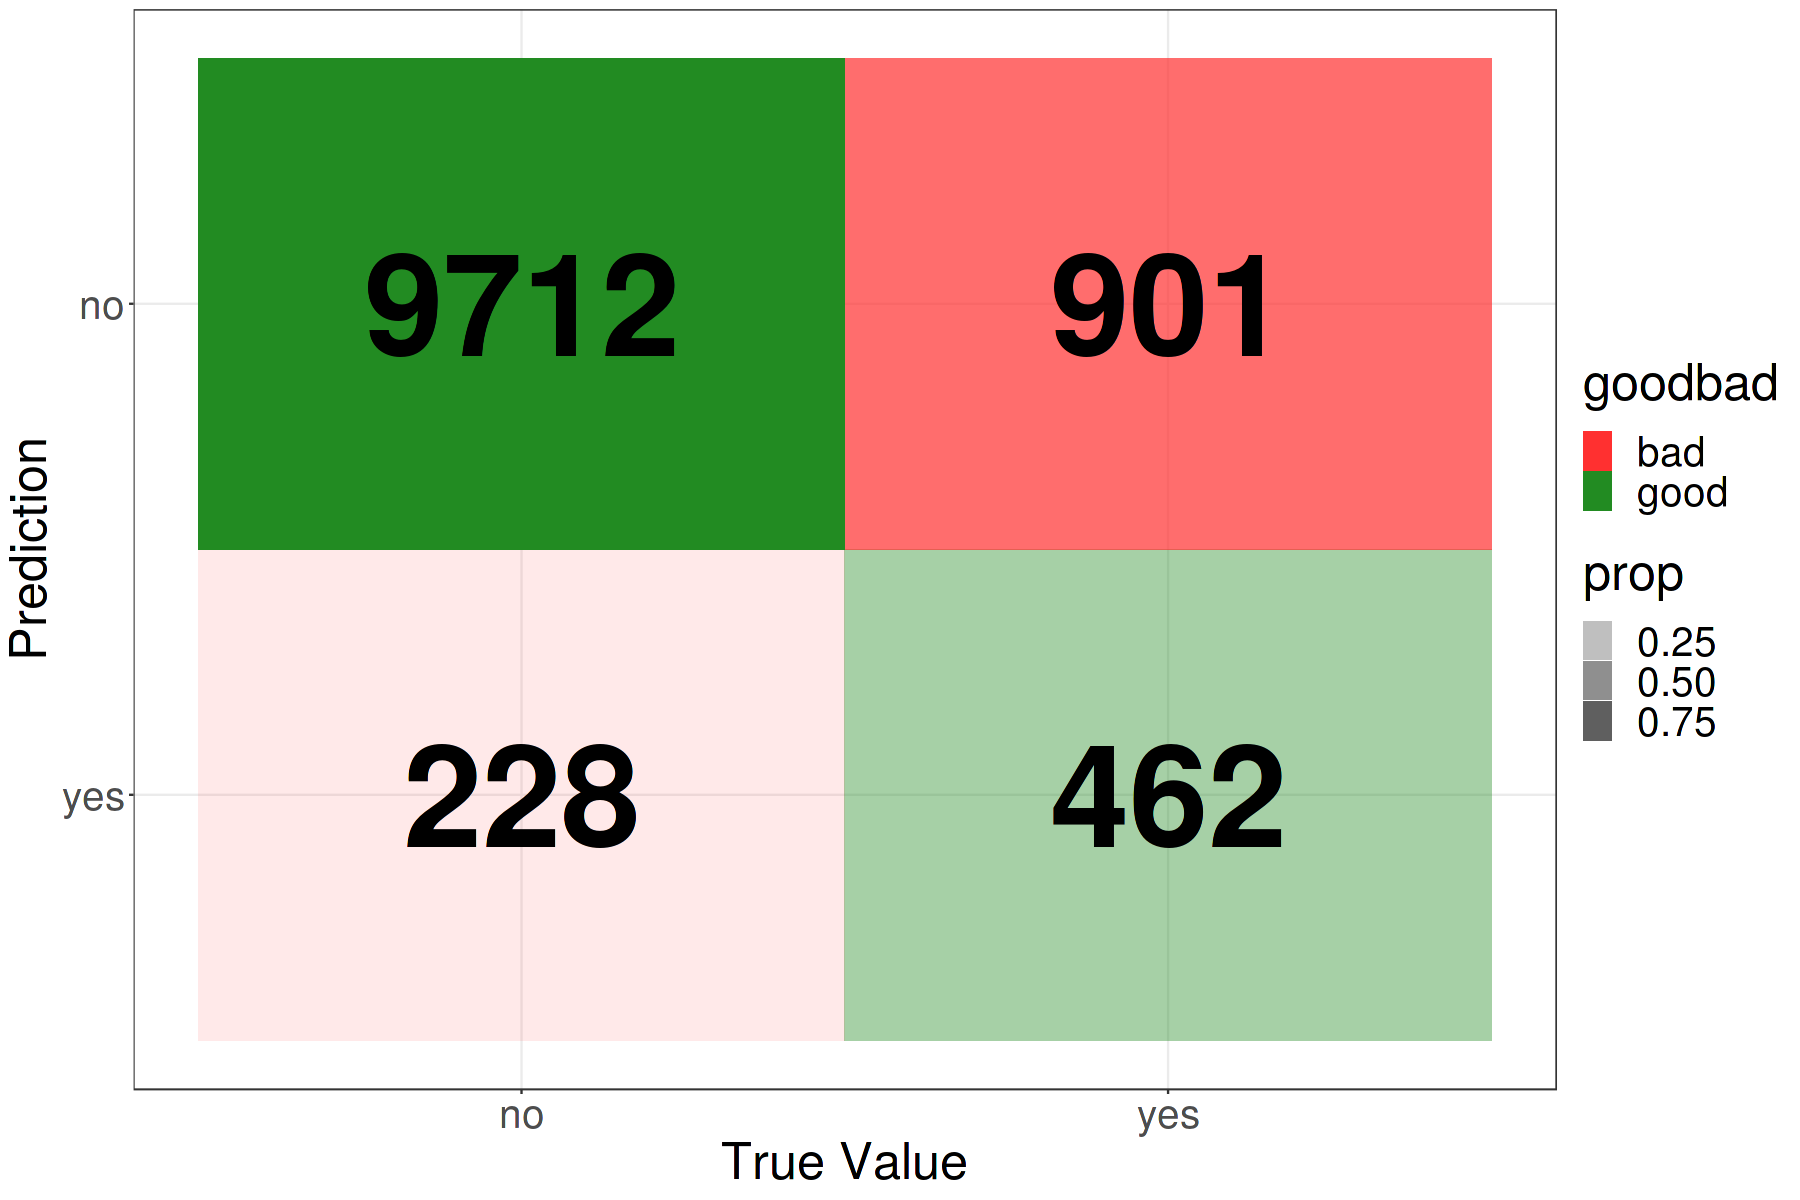

In [66]:
table <- data.frame(caret::confusionMatrix(pred, truth)$table)

plotTable <- table %>%
  mutate(goodbad = ifelse(table$Prediction == table$Reference, "good", "bad")) %>%
  group_by(Reference) %>%
  mutate(prop = Freq/sum(Freq))

# fill alpha relative to sensitivity/specificity by proportional outcomes within reference groups (see dplyr code above as well as original confusion matrix for comparison)
ggplot(data = plotTable, mapping = aes(x = Reference, y = Prediction, fill = goodbad, alpha = prop)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = .5, fontface  = "bold", alpha = 1,size = 30) +
  scale_fill_manual(values = c(good = "forestgreen", bad = "firebrick1")) +
  theme_bw() +
  xlim(rev(levels(table$Reference))) +
theme(text = element_text(size=30)) +
xlab("True Value")

In [67]:
optCutOff = optimalCutoff(test.set$y, Prediction, optimiseFor = "misclasserror")
optCutOff

[1] 0.3699999

In [68]:
confusionMatrix(test.set$y,Prediction, threshold = optCutOff)

,0,1
,<int>,<int>
0,9562,740
1,378,623


In [69]:
lvs <- c("no", "yes")
truth <- factor(rep(lvs, times = c(9940, 1363)),
                levels = rev(lvs))
pred <- factor(
  c(
    rep(lvs, times = c(9562, 378)),
    rep(lvs, times = c(740, 623))),
  levels = rev(lvs))

caret::confusionMatrix(pred, truth)

Confusion Matrix and Statistics

          Reference
Prediction  yes   no
       yes  623  378
       no   740 9562
                                          
               Accuracy : 0.9011          
                 95% CI : (0.8954, 0.9065)
    No Information Rate : 0.8794          
    P-Value [Acc > NIR] : 1.987e-13       
                                          
                  Kappa : 0.4733          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.45708         
            Specificity : 0.96197         
         Pos Pred Value : 0.62238         
         Neg Pred Value : 0.92817         
             Prevalence : 0.12059         
         Detection Rate : 0.05512         
   Detection Prevalence : 0.08856         
      Balanced Accuracy : 0.70953         
                                          
       'Positive' Class : yes             
                        

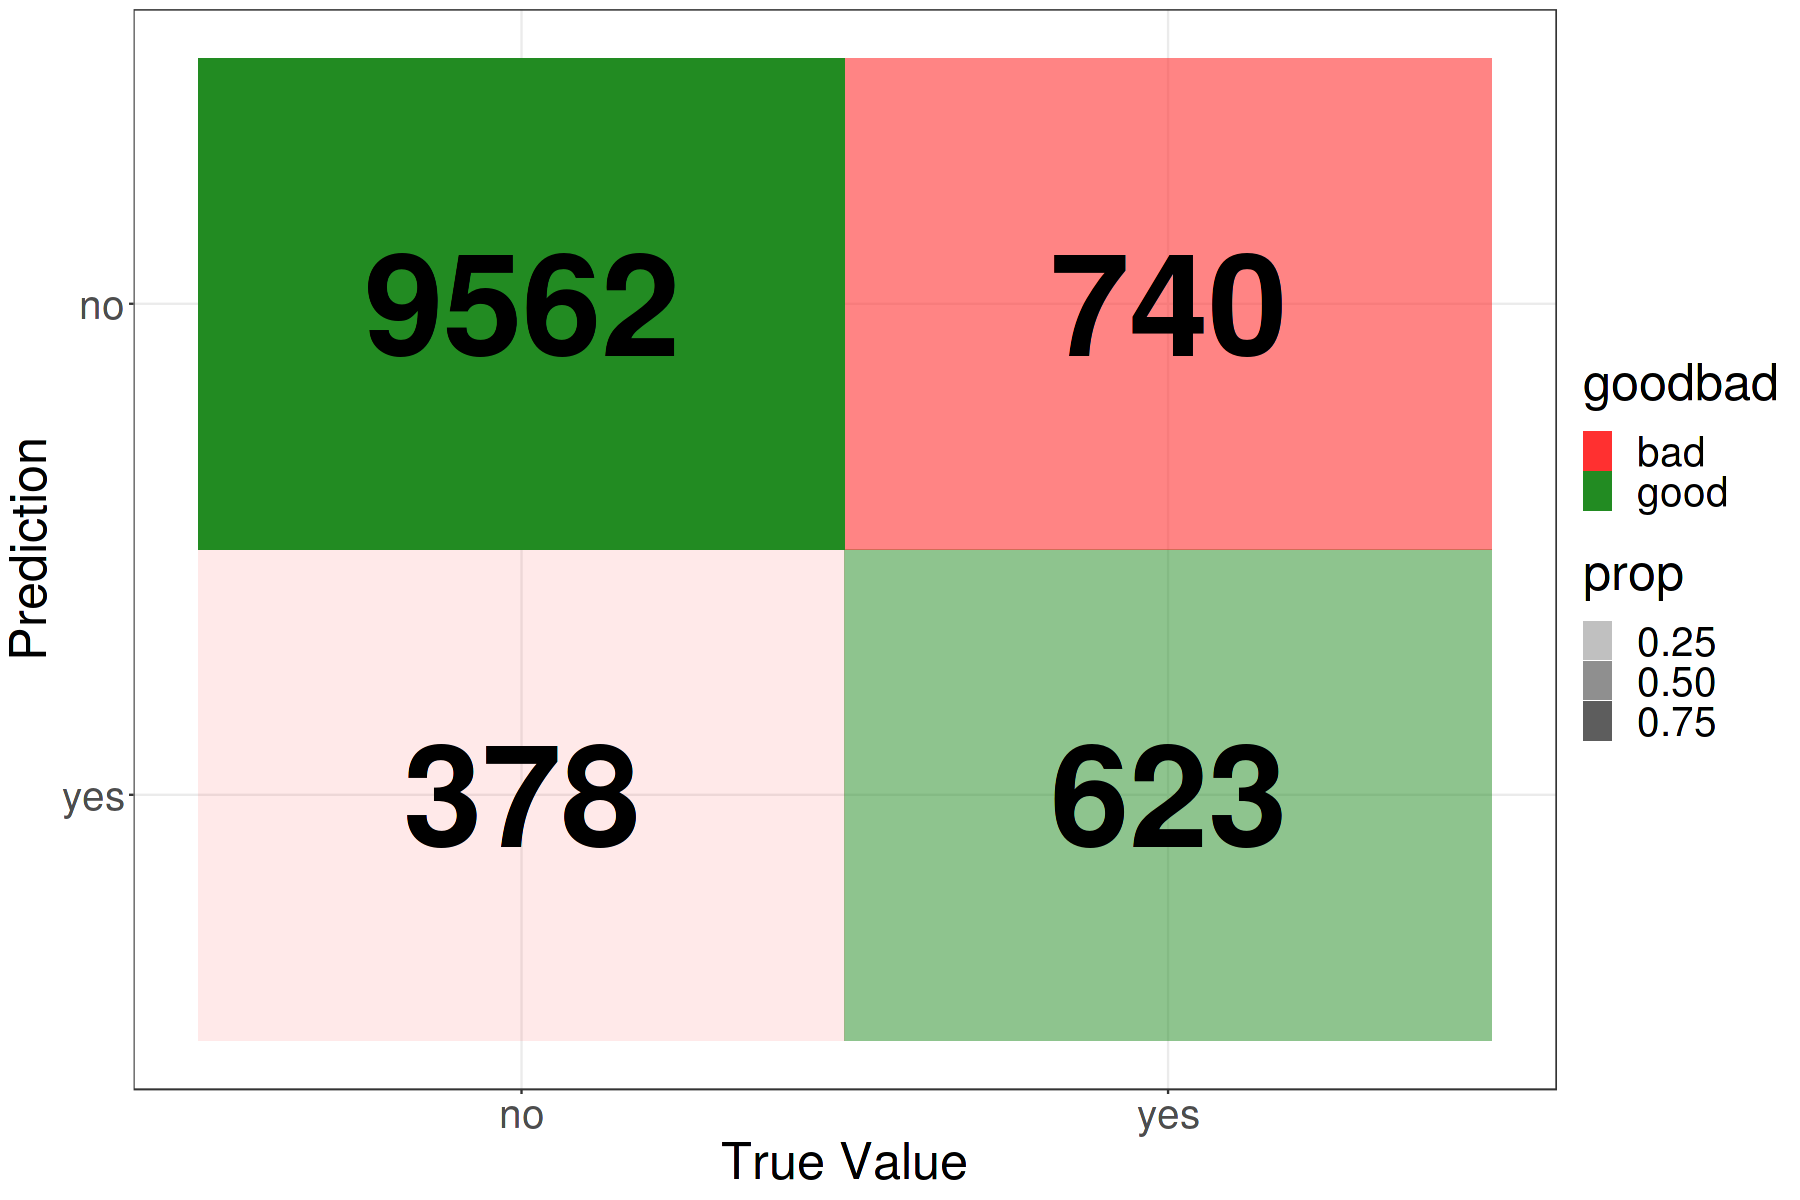

In [70]:
table <- data.frame(caret::confusionMatrix(pred, truth)$table)

plotTable <- table %>%
  mutate(goodbad = ifelse(table$Prediction == table$Reference, "good", "bad")) %>%
  group_by(Reference) %>%
  mutate(prop = Freq/sum(Freq))

# fill alpha relative to sensitivity/specificity by proportional outcomes within reference groups (see dplyr code above as well as original confusion matrix for comparison)
ggplot(data = plotTable, mapping = aes(x = Reference, y = Prediction, fill = goodbad, alpha = prop)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = .5, fontface  = "bold", alpha = 1,size = 30) +
  scale_fill_manual(values = c(good = "forestgreen", bad = "firebrick1")) +
  theme_bw() +
  xlim(rev(levels(table$Reference))) +
theme(text = element_text(size=30)) +
xlab("True Value")

## Decision Tree

![](https://media2.giphy.com/media/D6hp1PFOUBojK/giphy.gif)

In [71]:
dt.df <- Mt_df
head(dt.df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [72]:
library(tree)
set.seed(8)
train.size = floor(0.75*nrow(dt.df))
train.index = sample(1:nrow(dt.df), train.size)
train.set = dt.df[train.index,]
test.set = dt.df[-train.index,]
y.test = dt.df[-train.index,17]
dt.model=tree(y~.,dt.df, subset = train.index)
summary(dt.model)

Registered S3 method overwritten by 'tree':
  method     from
  print.tree cli 




Classification tree:
tree(formula = y ~ ., data = dt.df, subset = train.index)
Variables actually used in tree construction:
[1] "duration" "poutcome" "month"    "contact" 
Number of terminal nodes:  9 
Residual mean deviance:  0.4885 = 16560 / 33900 
Misclassification error rate: 0.1106 = 3750 / 33908 

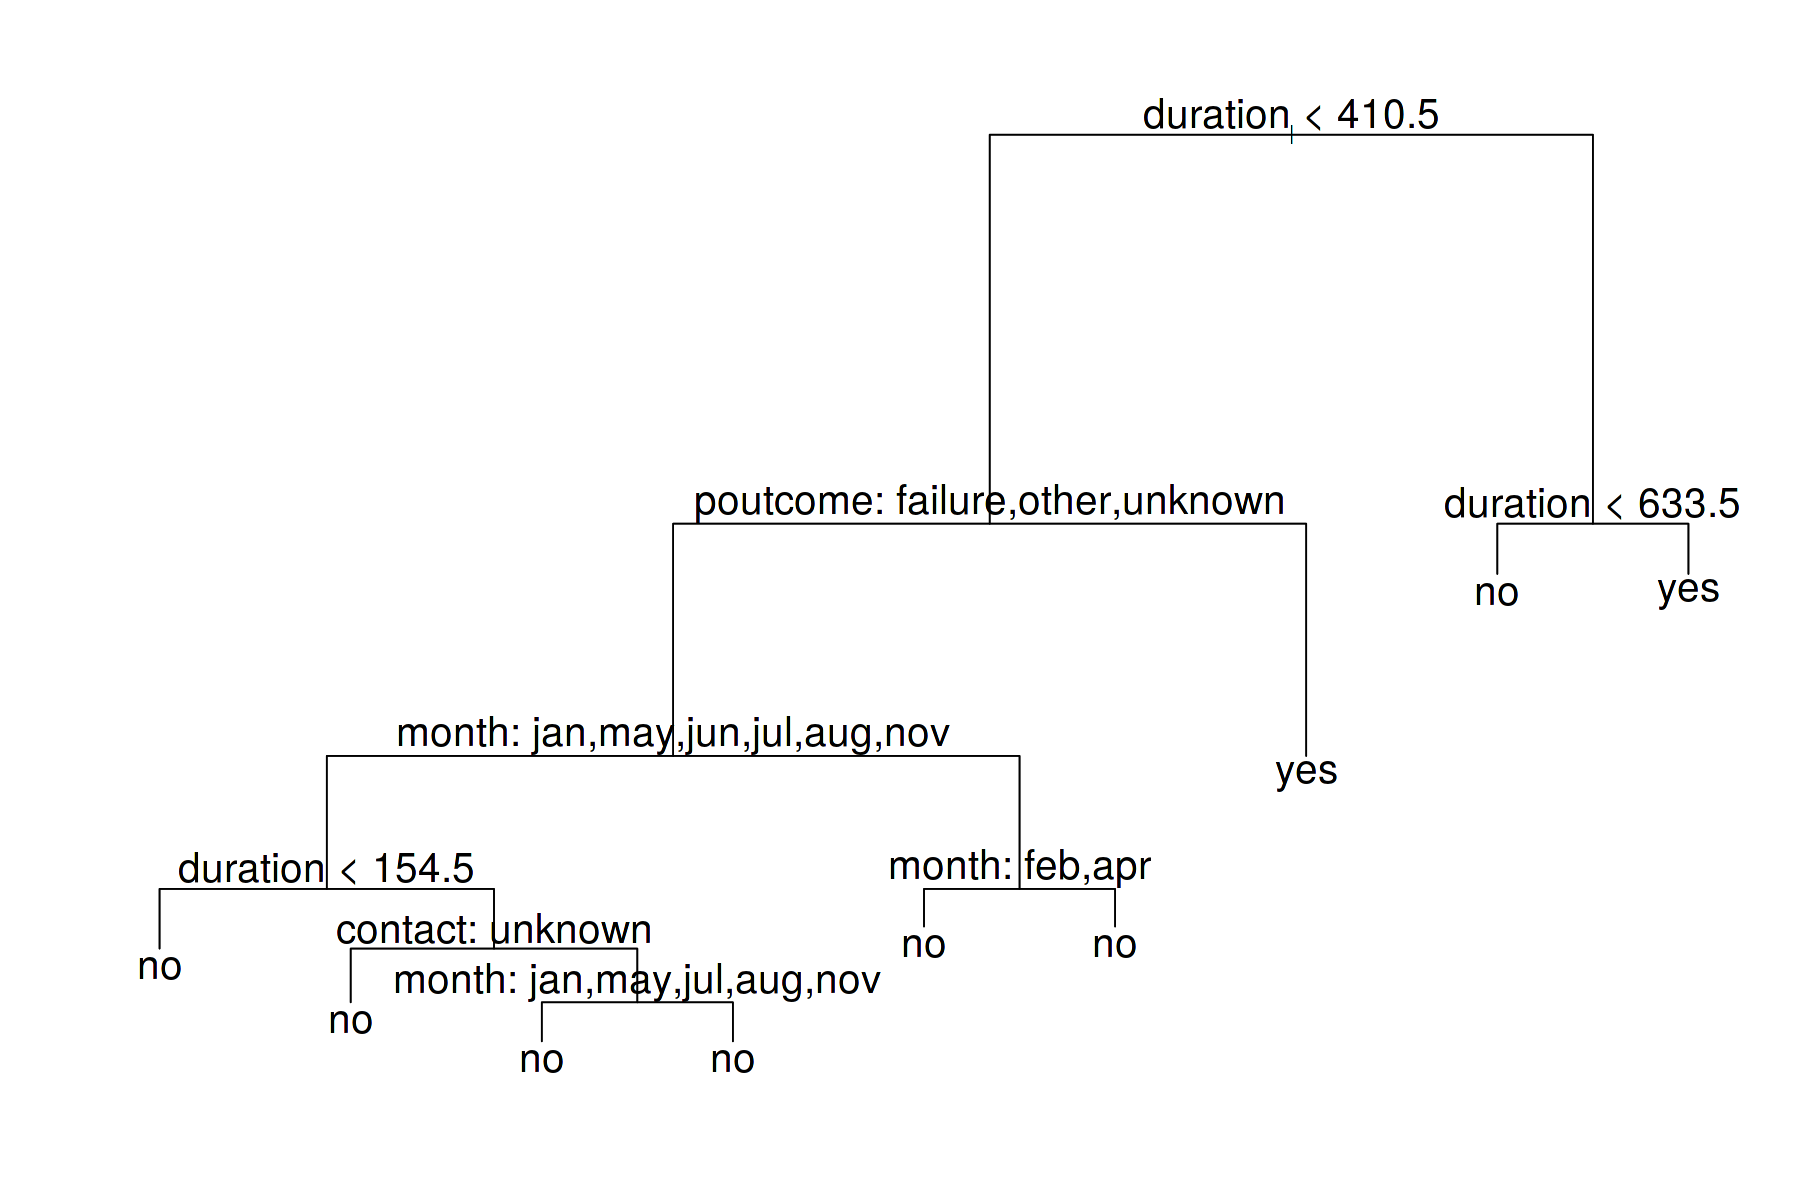

In [73]:
plot(dt.model)
text(dt.model,pretty=0,cex = 2)

In [74]:
Prediction.dt=predict(dt.model,test.set,type="class")
table(predicted = Prediction.dt, true = y.test)

         true
predicted   no  yes
      no  9409  725
      yes  531  638

In [75]:
# data/code from "2 class example" example courtesy of ?caret::confusionMatrix

lvs <- c("no", "yes")
truth <- factor(rep(lvs, times = c(9940, 1363)),
                levels = rev(lvs))
pred <- factor(
  c(
    rep(lvs, times = c(9409, 531)),
    rep(lvs, times = c(725, 638))),
  levels = rev(lvs))

caret::confusionMatrix(pred, truth)

Confusion Matrix and Statistics

          Reference
Prediction  yes   no
       yes  638  531
       no   725 9409
                                          
               Accuracy : 0.8889          
                 95% CI : (0.8829, 0.8946)
    No Information Rate : 0.8794          
    P-Value [Acc > NIR] : 0.0009411       
                                          
                  Kappa : 0.4418          
                                          
 Mcnemar's Test P-Value : 5.157e-08       
                                          
            Sensitivity : 0.46809         
            Specificity : 0.94658         
         Pos Pred Value : 0.54577         
         Neg Pred Value : 0.92846         
             Prevalence : 0.12059         
         Detection Rate : 0.05645         
   Detection Prevalence : 0.10342         
      Balanced Accuracy : 0.70733         
                                          
       'Positive' Class : yes             
                        

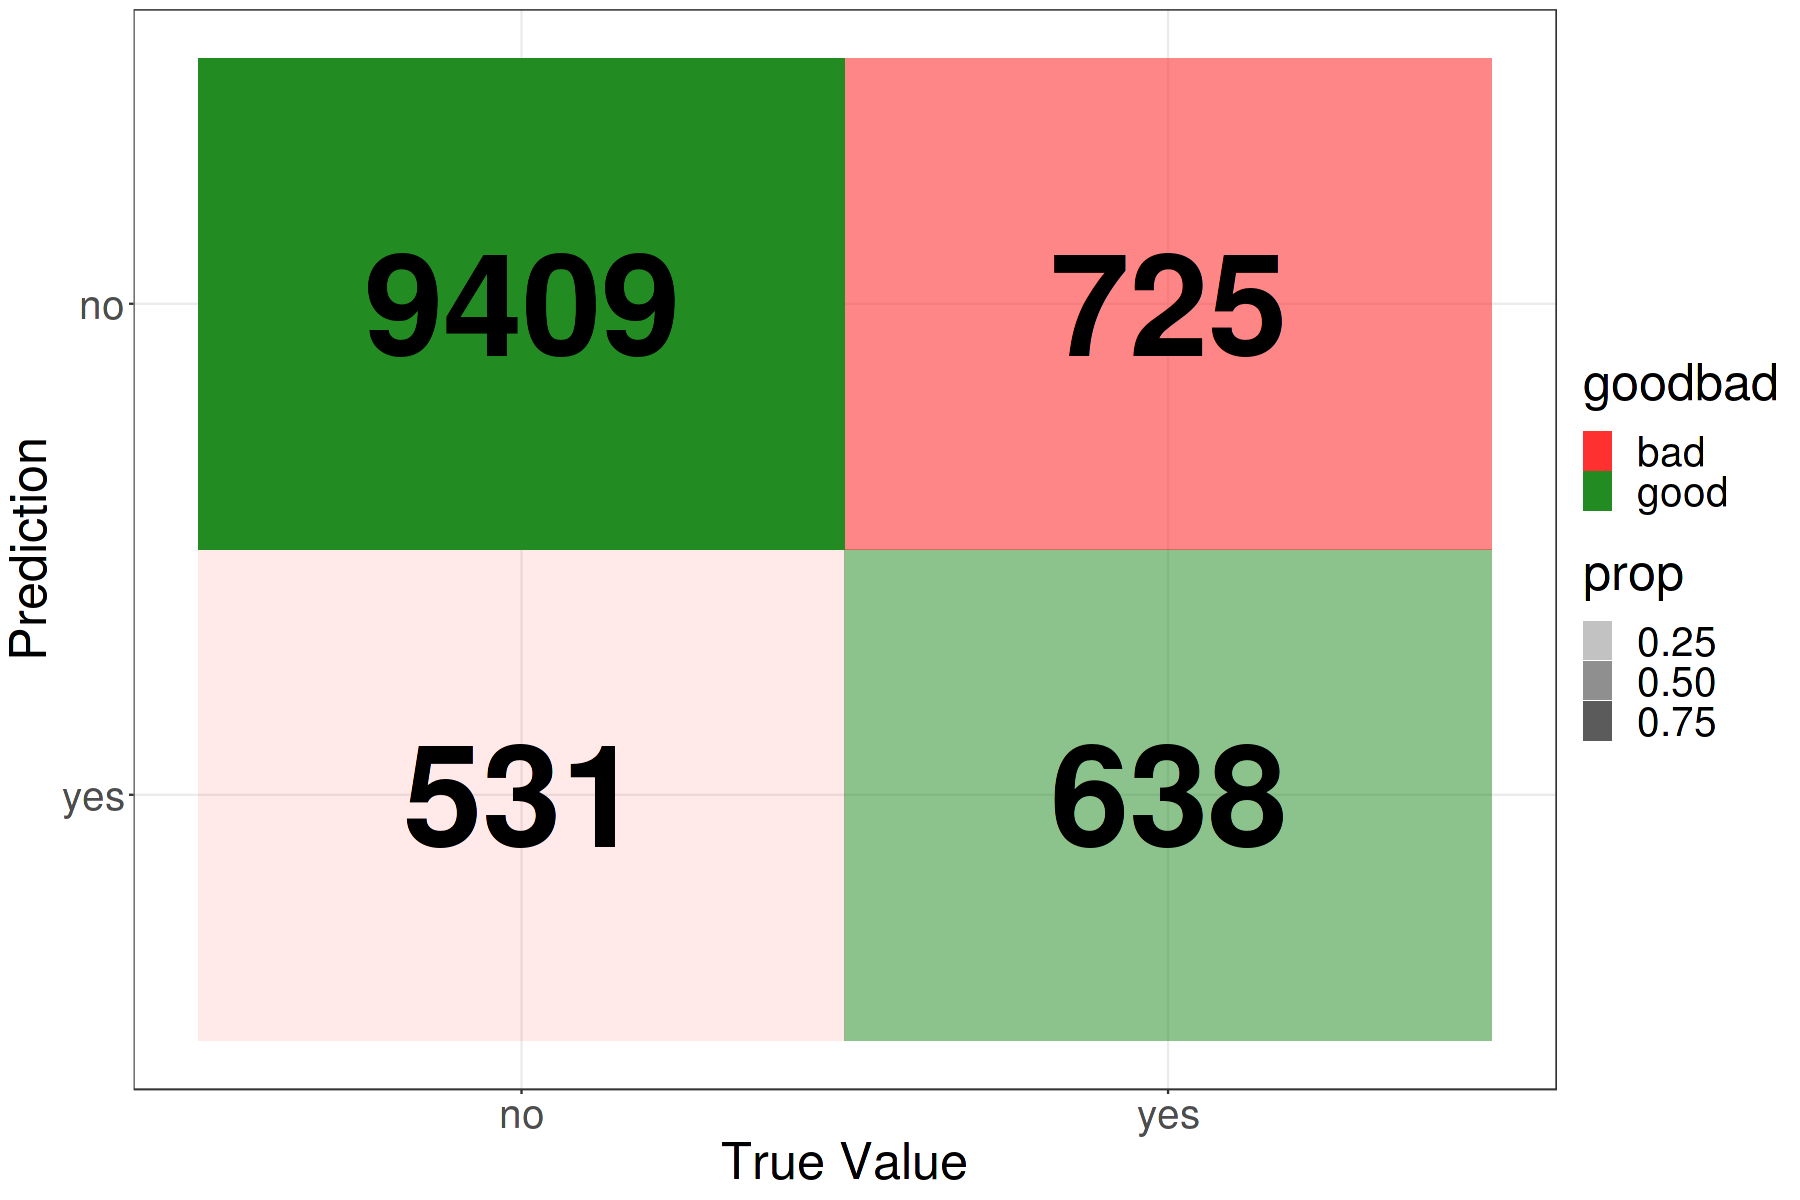

In [76]:
table <- data.frame(caret::confusionMatrix(pred, truth)$table)

plotTable <- table %>%
  mutate(goodbad = ifelse(table$Prediction == table$Reference, "good", "bad")) %>%
  group_by(Reference) %>%
  mutate(prop = Freq/sum(Freq))

# fill alpha relative to sensitivity/specificity by proportional outcomes within reference groups (see dplyr code above as well as original confusion matrix for comparison)
ggplot(data = plotTable, mapping = aes(x = Reference, y = Prediction, fill = goodbad, alpha = prop)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = .5, fontface  = "bold", alpha = 1,size = 30) +
  scale_fill_manual(values = c(good = "forestgreen", bad = "firebrick1")) +
  theme_bw() +
  xlim(rev(levels(table$Reference))) +
theme(text = element_text(size=30)) +
xlab("True Value")

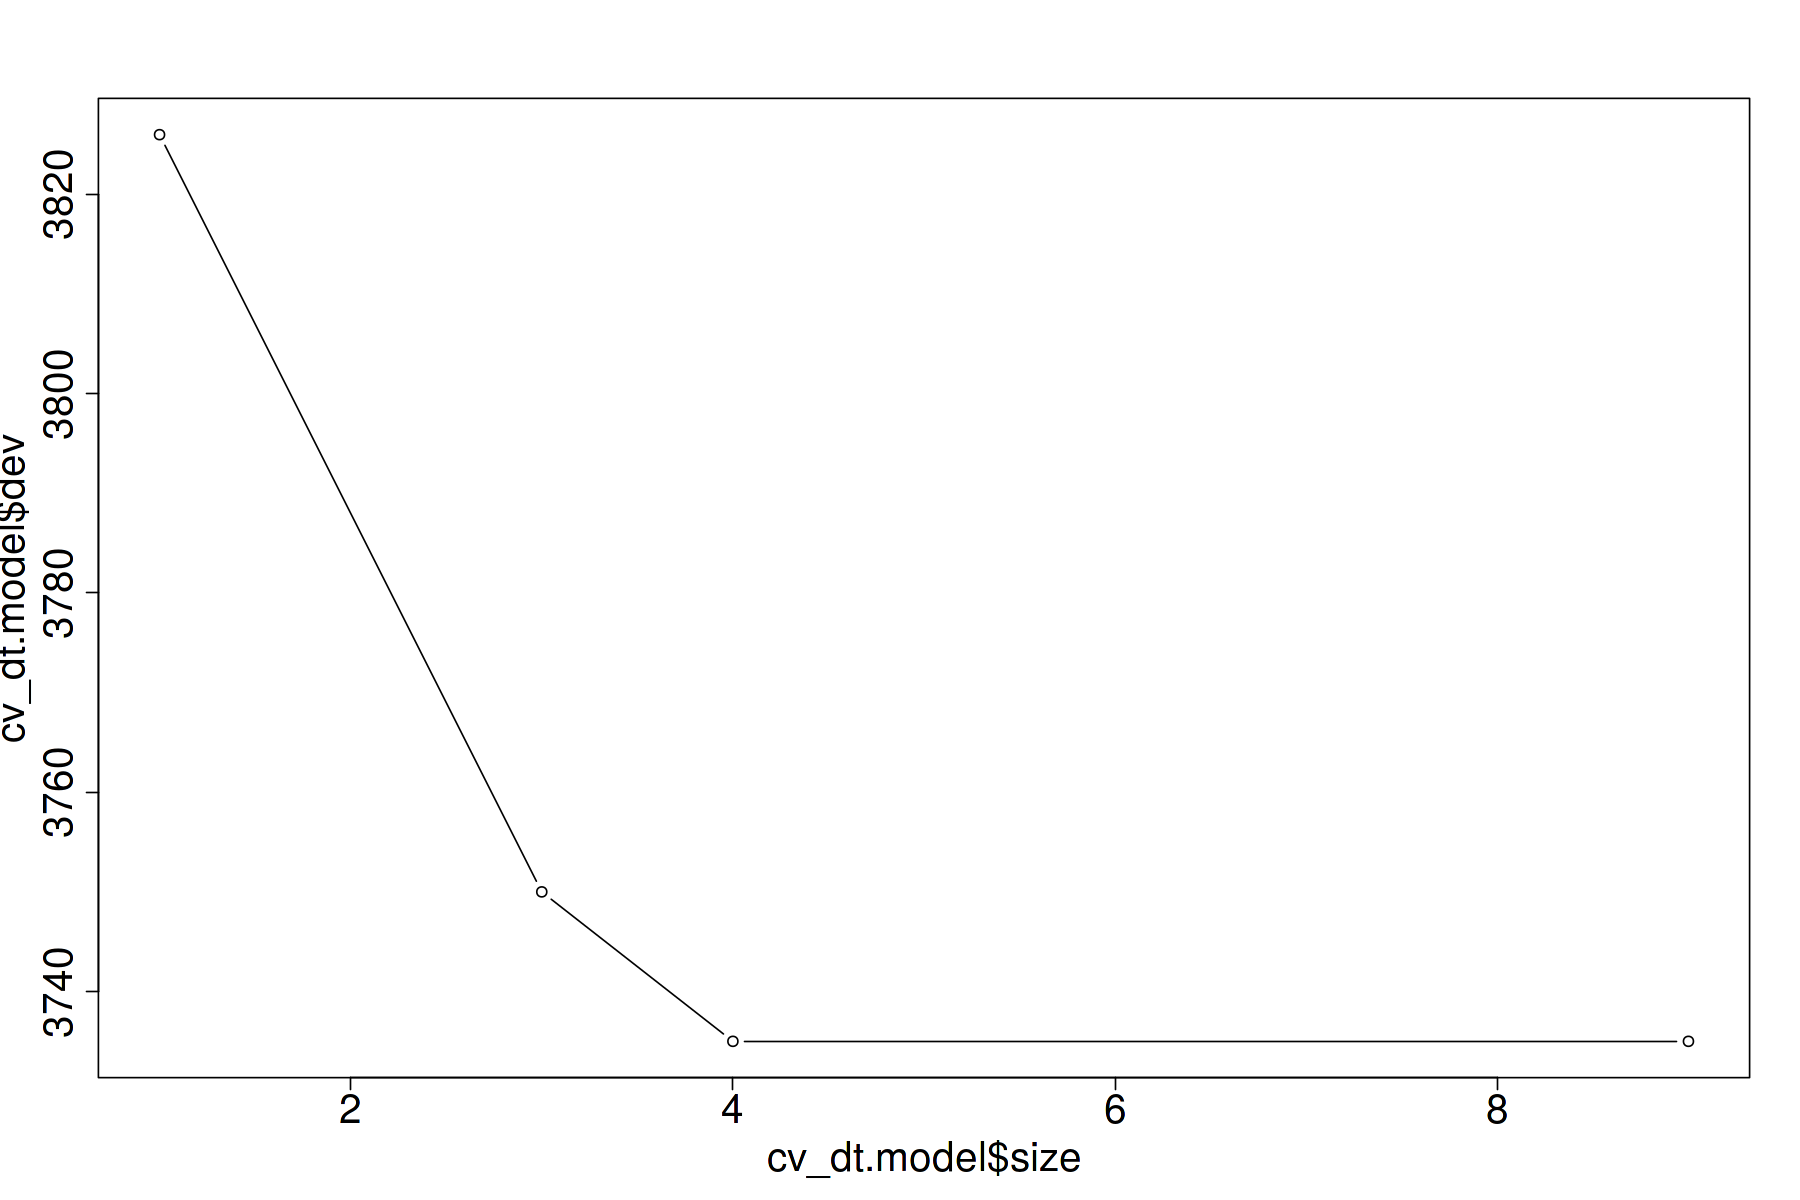

In [77]:
cv_dt.model=cv.tree(dt.model,FUN=prune.misclass)
plot(cv_dt.model$size,cv_dt.model$dev,type="b",cex.lab=2, cex.axis=2, cex.main=2, cex.sub=2)


Classification tree:
tree(formula = y ~ ., data = dt.df, subset = train.index)
Variables actually used in tree construction:
[1] "duration" "poutcome" "month"    "contact" 
Number of terminal nodes:  9 
Residual mean deviance:  0.4885 = 16560 / 33900 
Misclassification error rate: 0.1106 = 3750 / 33908 

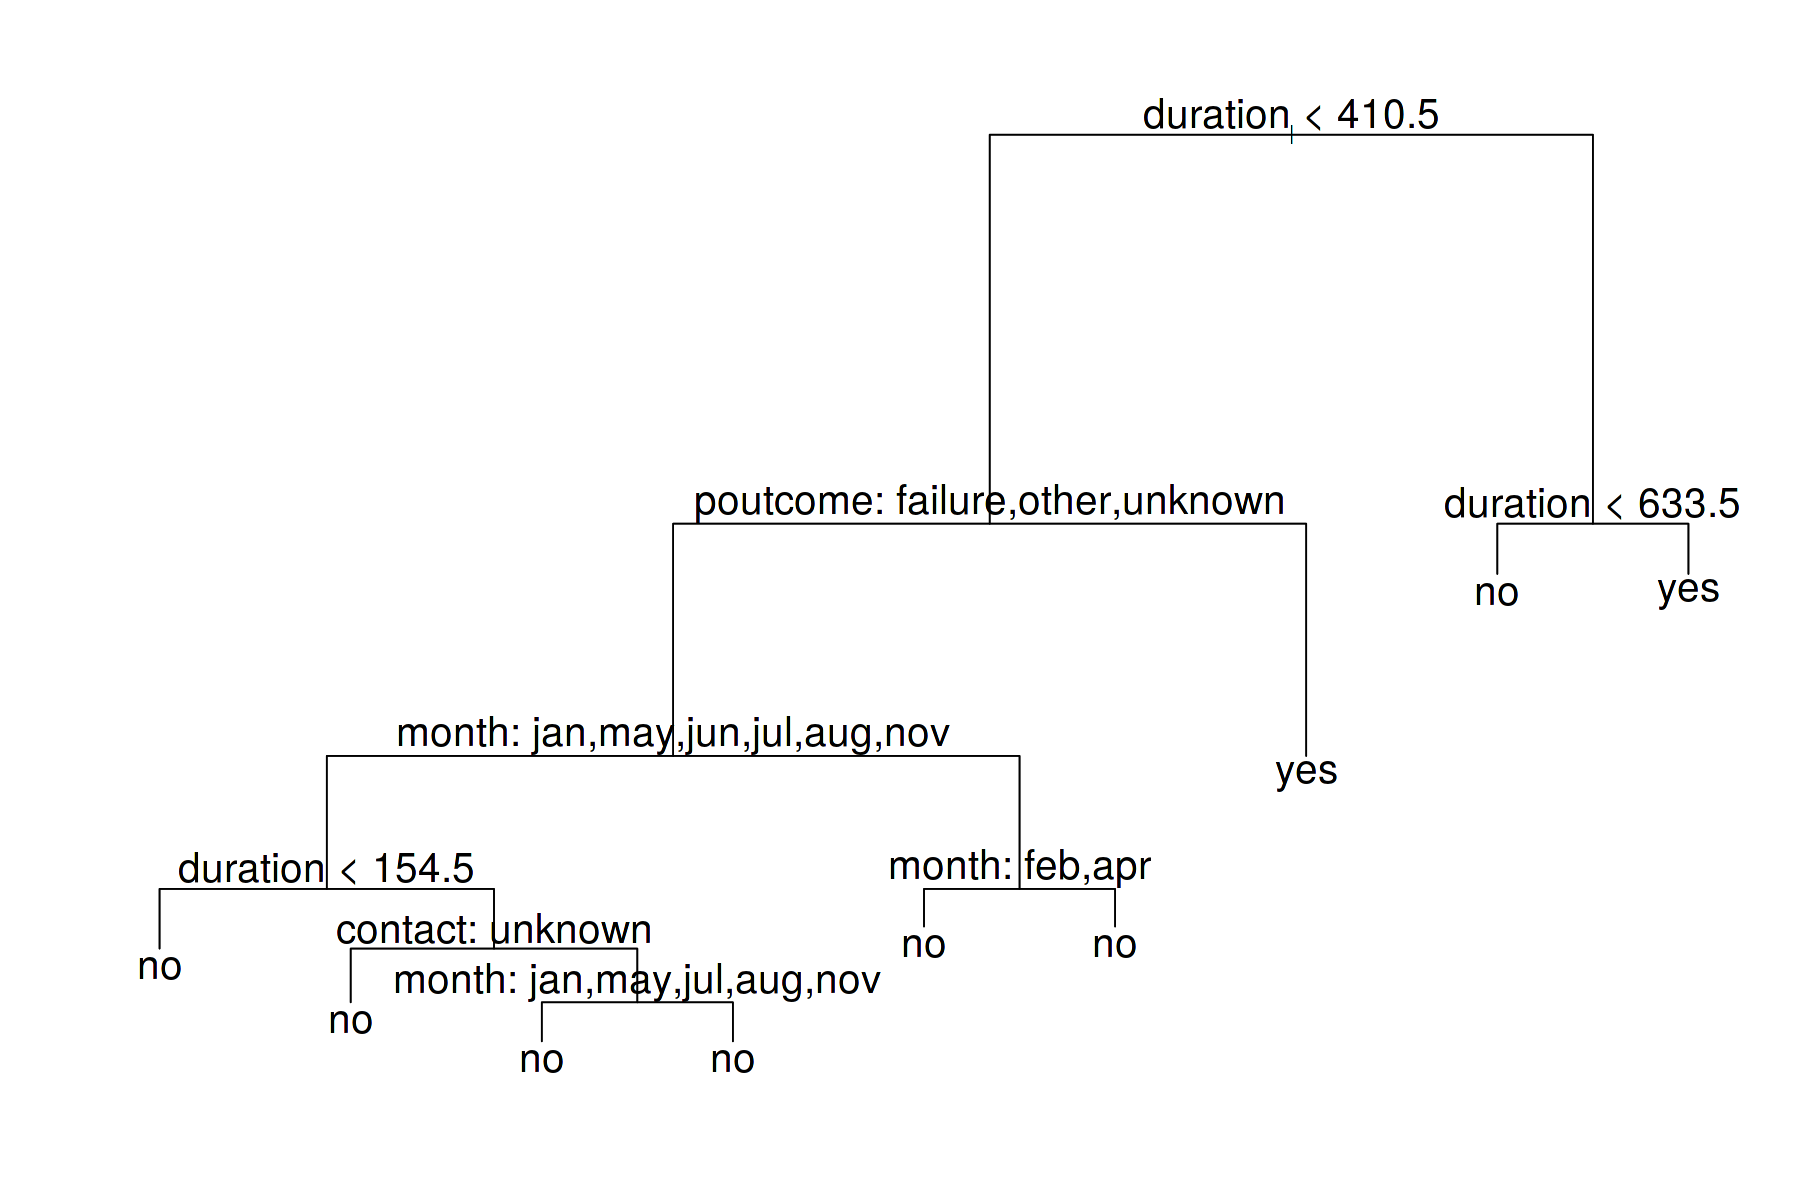

In [78]:
prune_dt.model=prune.misclass(dt.model,best=9)
summary(prune_dt.model)
plot(prune_dt.model)
text(prune_dt.model,pretty=0,cex=2)


Classification tree:
snip.tree(tree = dt.model, nodes = 4L)
Variables actually used in tree construction:
[1] "duration" "poutcome"
Number of terminal nodes:  4 
Residual mean deviance:  0.5627 = 19080 / 33900 
Misclassification error rate: 0.1106 = 3750 / 33908 

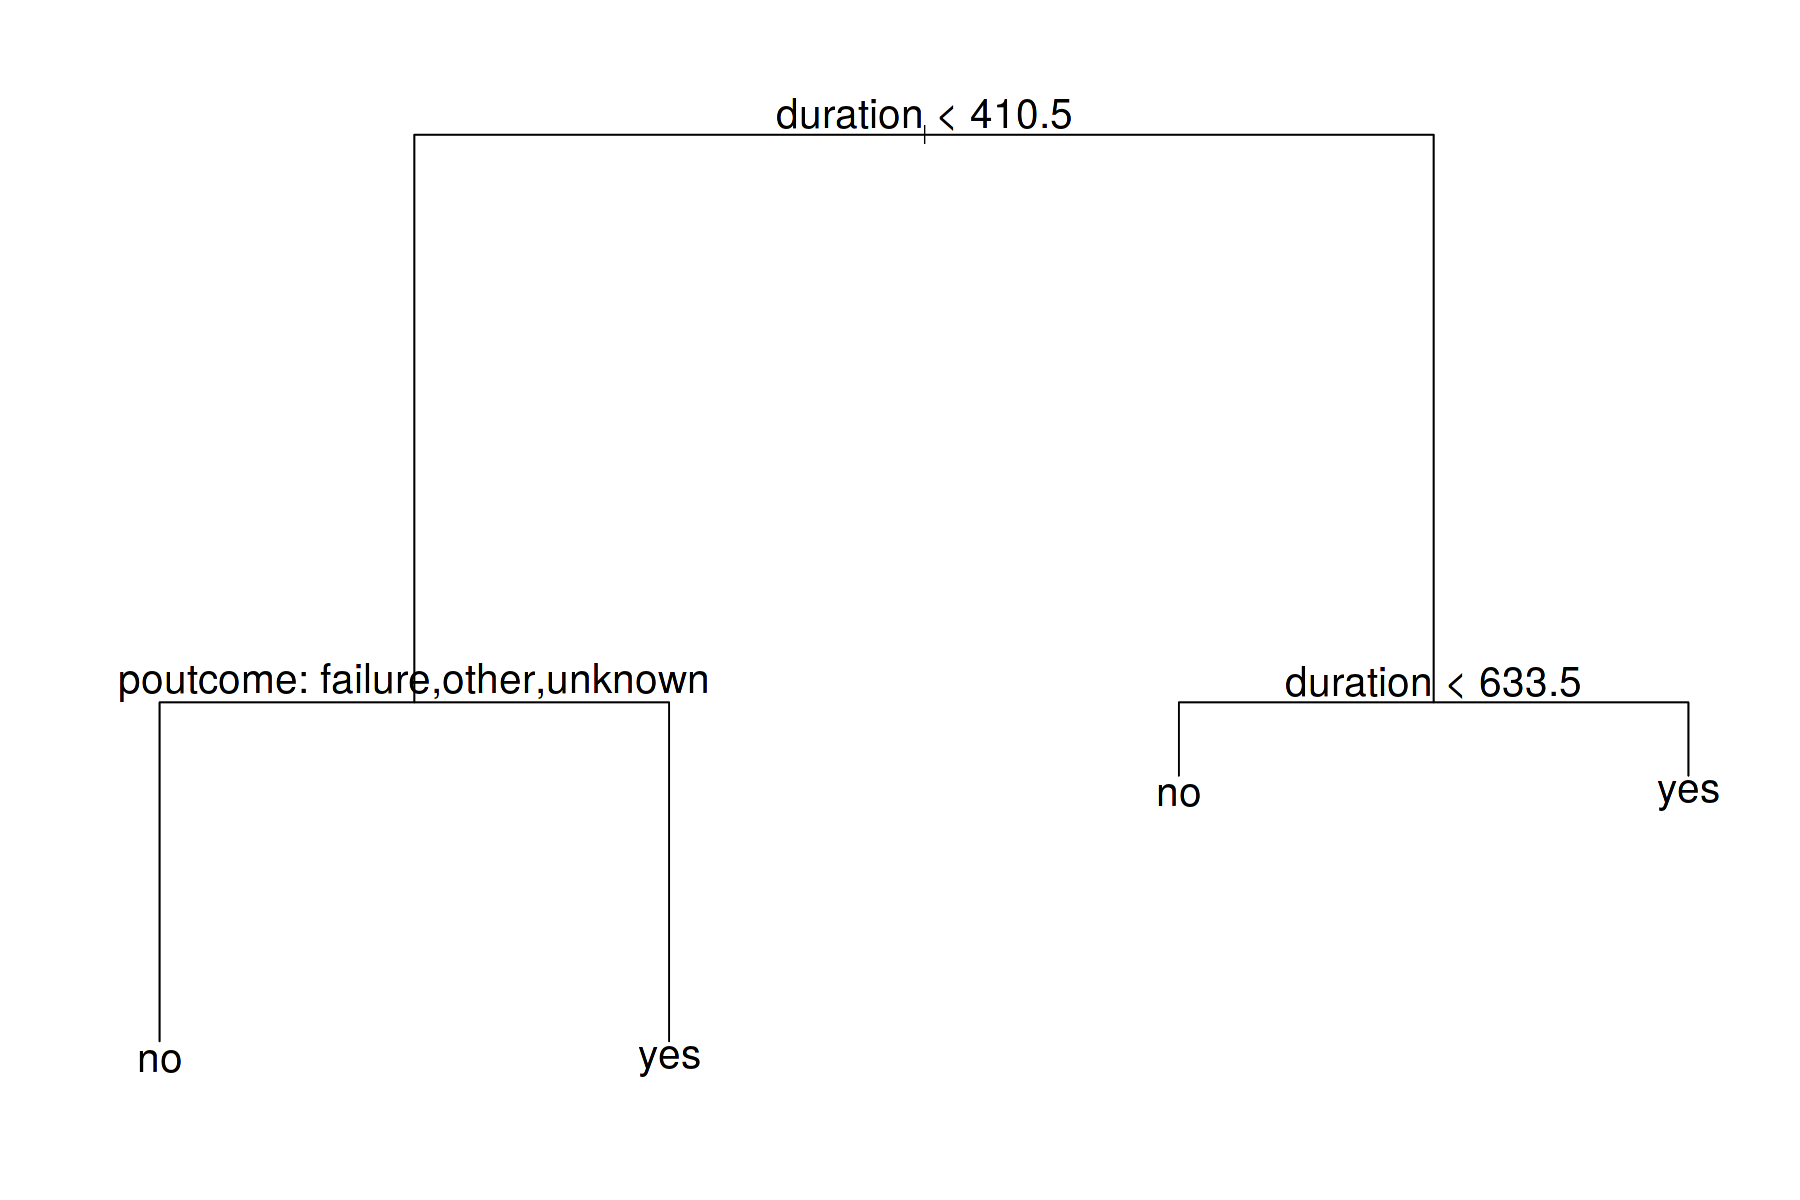

In [79]:
prune_dt.model=prune.misclass(dt.model,best=4)
summary(prune_dt.model)
plot(prune_dt.model)
text(prune_dt.model,pretty=0,cex=2)

In [80]:
Prediction.dt2=predict(prune_dt.model,test.set,type="class")
table(predicted = Prediction.dt2, true = y.test)

         true
predicted   no  yes
      no  9409  725
      yes  531  638

In [81]:
# data/code from "2 class example" example courtesy of ?caret::confusionMatrix

lvs <- c("no", "yes")
truth <- factor(rep(lvs, times = c(9940, 1363)),
                levels = rev(lvs))
pred <- factor(
  c(
    rep(lvs, times = c(9409, 531)),
    rep(lvs, times = c(725, 638))),
  levels = rev(lvs))

caret::confusionMatrix(pred, truth)

Confusion Matrix and Statistics

          Reference
Prediction  yes   no
       yes  638  531
       no   725 9409
                                          
               Accuracy : 0.8889          
                 95% CI : (0.8829, 0.8946)
    No Information Rate : 0.8794          
    P-Value [Acc > NIR] : 0.0009411       
                                          
                  Kappa : 0.4418          
                                          
 Mcnemar's Test P-Value : 5.157e-08       
                                          
            Sensitivity : 0.46809         
            Specificity : 0.94658         
         Pos Pred Value : 0.54577         
         Neg Pred Value : 0.92846         
             Prevalence : 0.12059         
         Detection Rate : 0.05645         
   Detection Prevalence : 0.10342         
      Balanced Accuracy : 0.70733         
                                          
       'Positive' Class : yes             
                        

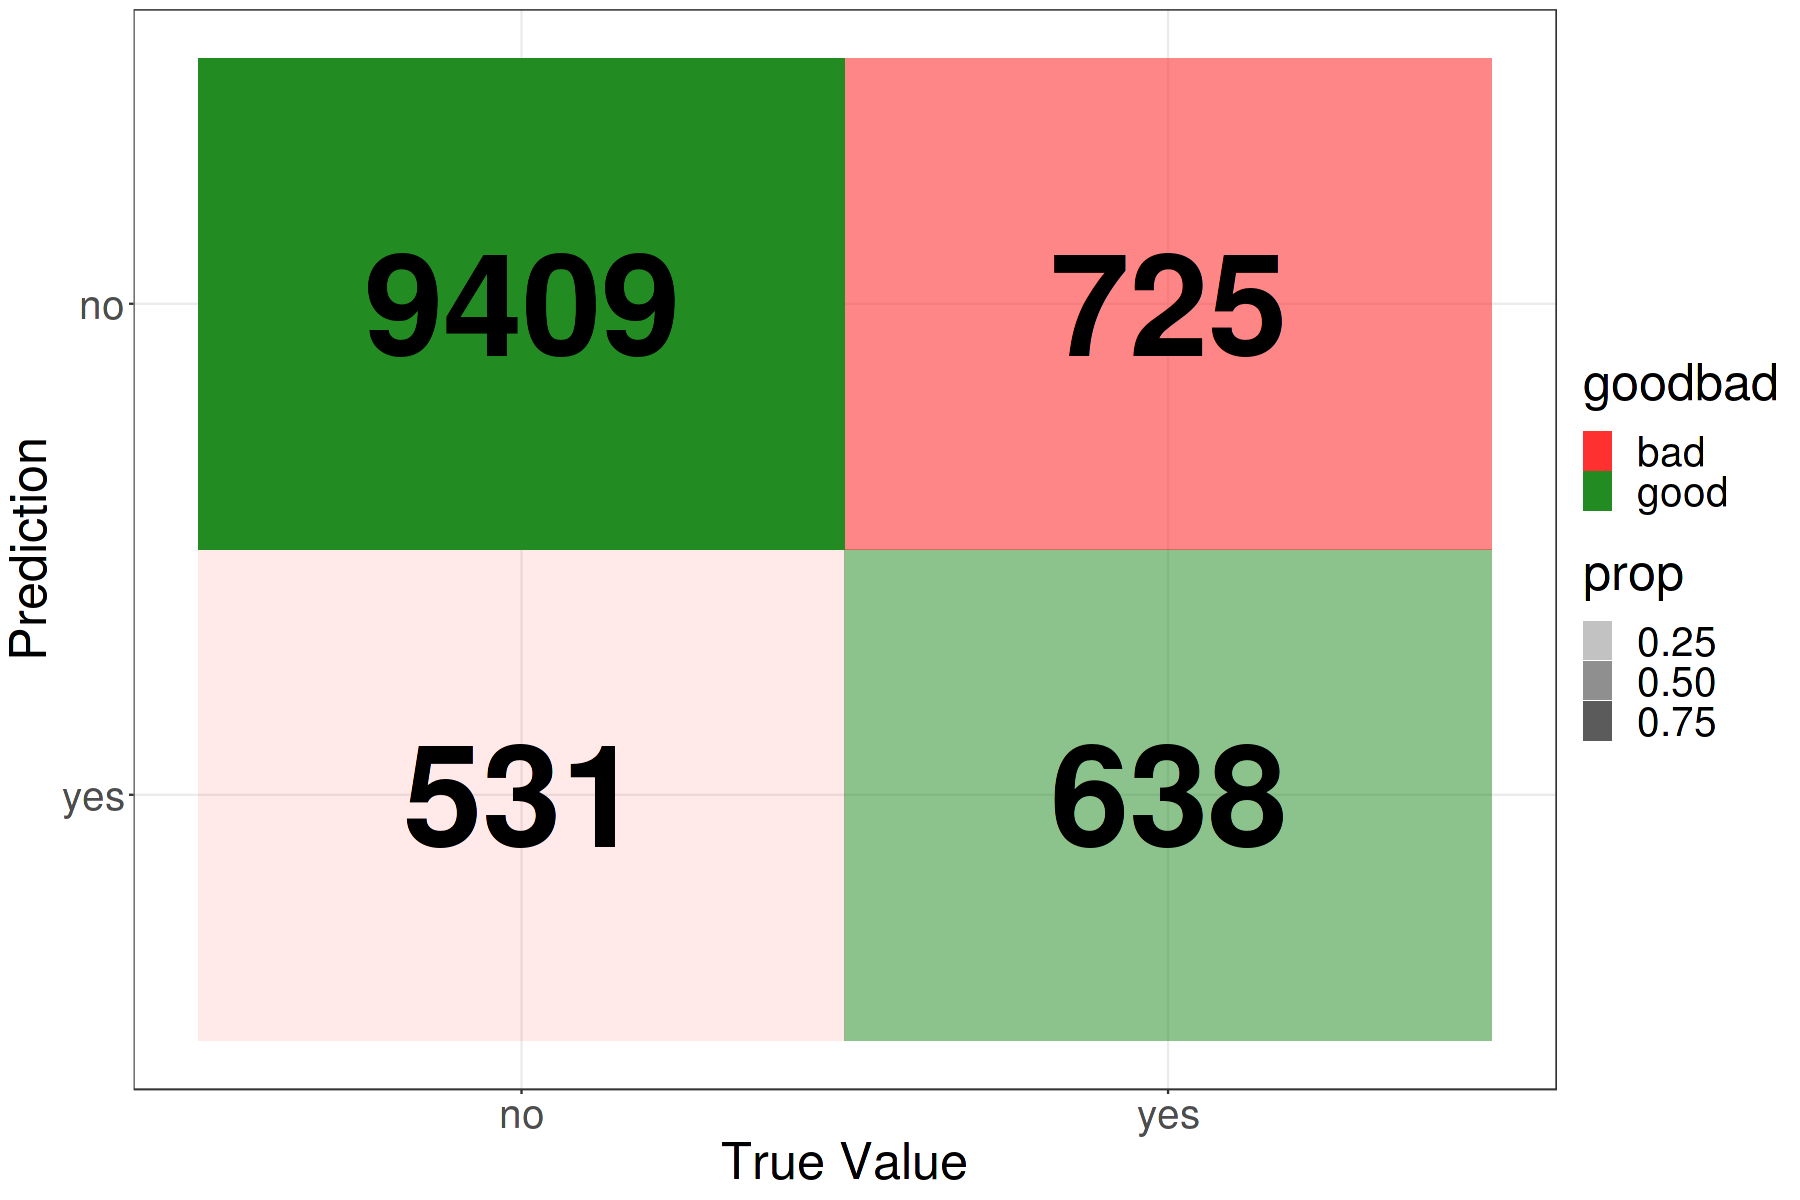

In [82]:
table <- data.frame(caret::confusionMatrix(pred, truth)$table)

plotTable <- table %>%
  mutate(goodbad = ifelse(table$Prediction == table$Reference, "good", "bad")) %>%
  group_by(Reference) %>%
  mutate(prop = Freq/sum(Freq))

# fill alpha relative to sensitivity/specificity by proportional outcomes within reference groups (see dplyr code above as well as original confusion matrix for comparison)
ggplot(data = plotTable, mapping = aes(x = Reference, y = Prediction, fill = goodbad, alpha = prop)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = .5, fontface  = "bold", alpha = 1,size = 30) +
  scale_fill_manual(values = c(good = "forestgreen", bad = "firebrick1")) +
  theme_bw() +
  xlim(rev(levels(table$Reference))) +
theme(text = element_text(size=30)) +
xlab("True Value")

## Random Forest

![](http://talimi.se/wp-content/uploads/2017/08/Ska%CC%88rmavbild-2017-09-03-kl.-15.28.56-e1504456128643.png)

In [83]:
library(randomForest)
set.seed(8)
rf.df <- Mt_df
train.size = floor(0.75*nrow(rf.df))
train.index = sample(1:nrow(rf.df), train.size)
train.set = rf.df[train.index,]
test.set = rf.df[-train.index,]
y.test = rf.df[-train.index,17]
rf.model <- randomForest(y ~ .,data=train.set)
Prediction.rf = predict(rf.model, newdata=test.set)
table(predicted = Prediction.rf, true = y.test)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




         true
predicted   no  yes
      no  9589  703
      yes  351  660


Call:
 randomForest(formula = y ~ ., data = train.set) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 9.08%
Confusion matrix:
       no  yes class.error
no  28922 1060  0.03535455
yes  2020 1906  0.51451859


,MeanDecreaseGini
age,608.512295
job,466.672789
marital,135.964862
education,176.281924
default,9.150041
balance,656.218001
housing,139.607742
loan,53.955308
contact,129.044810
day,543.033673


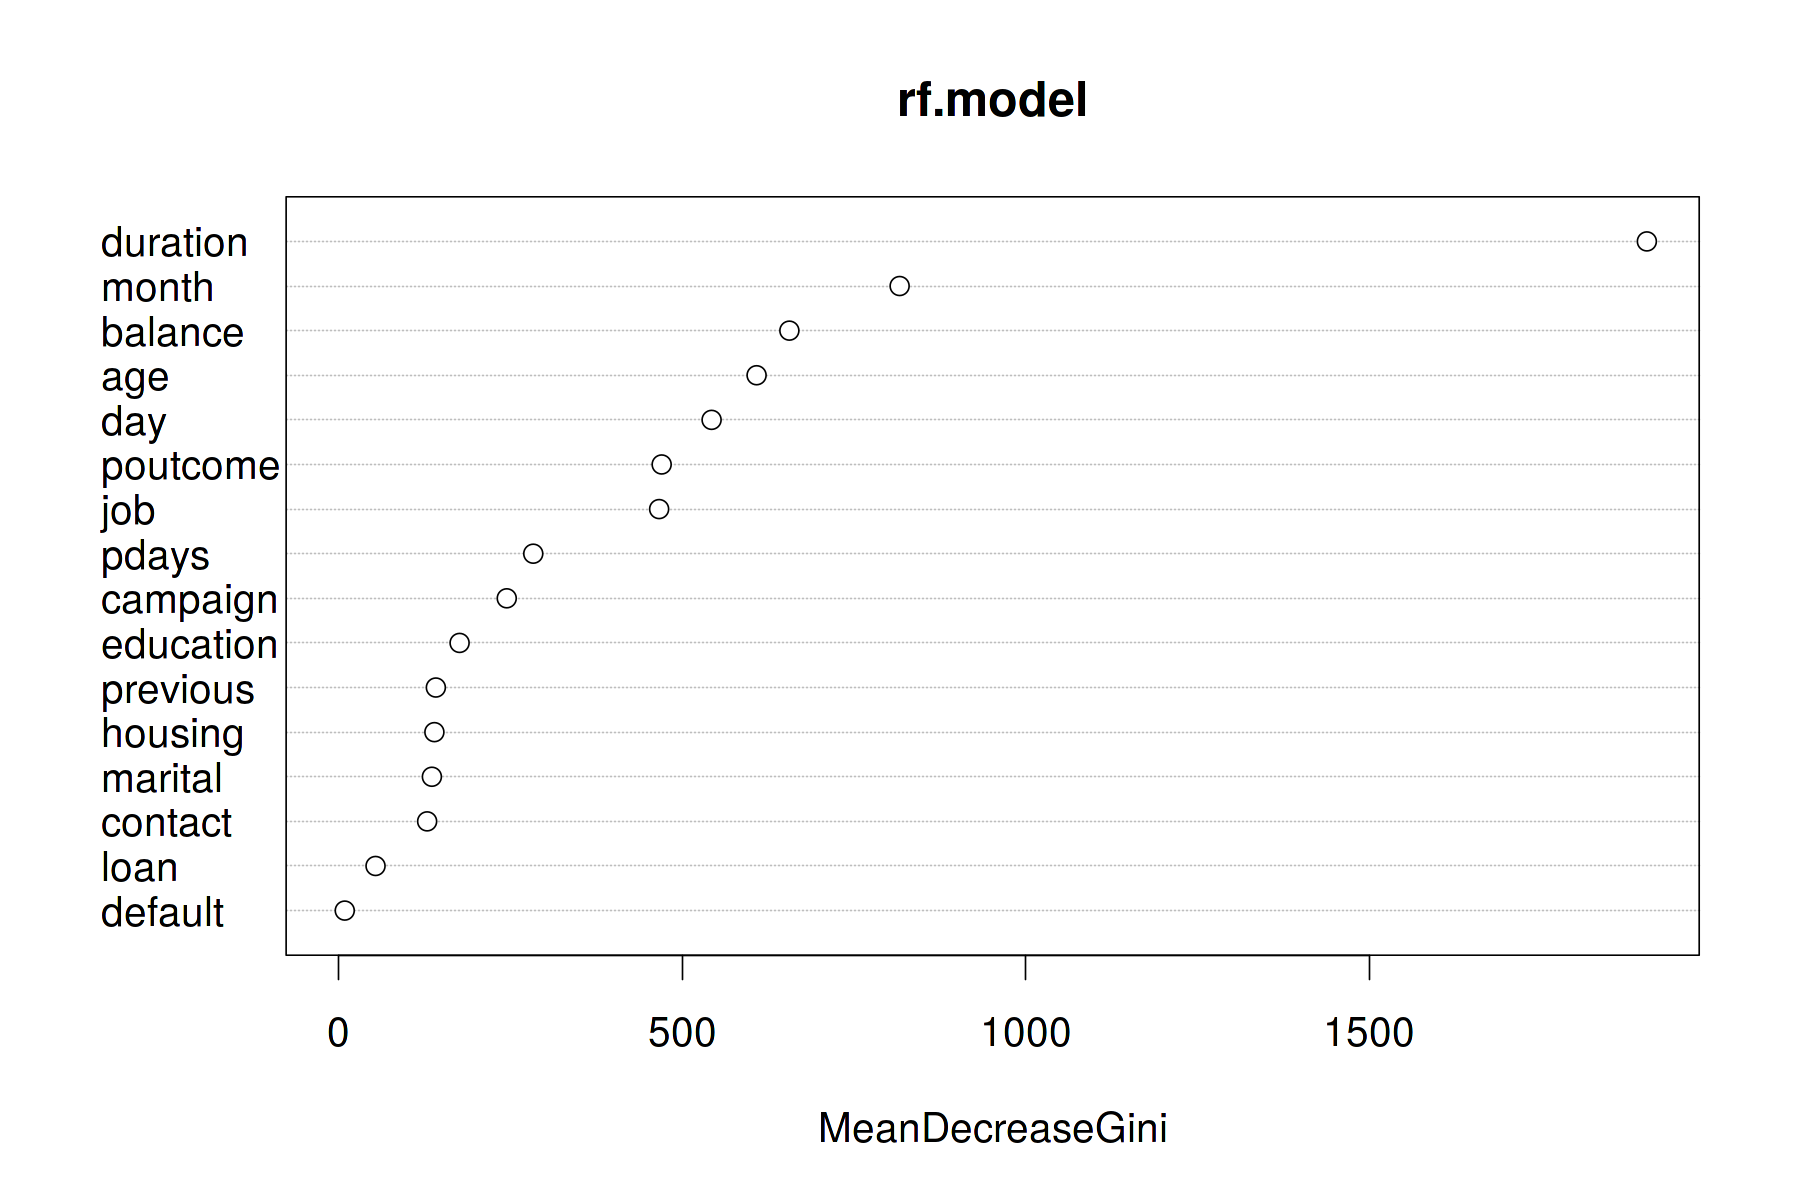

In [84]:
print(rf.model)
#Evaluate variable importance
importance(rf.model)
varImpPlot(rf.model,cex = 2)

In [85]:
caret::confusionMatrix(Prediction.rf, y.test,positive="yes")

Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  9589  703
       yes  351  660
                                          
               Accuracy : 0.9068          
                 95% CI : (0.9012, 0.9121)
    No Information Rate : 0.8794          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5052          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.48423         
            Specificity : 0.96469         
         Pos Pred Value : 0.65282         
         Neg Pred Value : 0.93169         
             Prevalence : 0.12059         
         Detection Rate : 0.05839         
   Detection Prevalence : 0.08945         
      Balanced Accuracy : 0.72446         
                                          
       'Positive' Class : yes             
                        

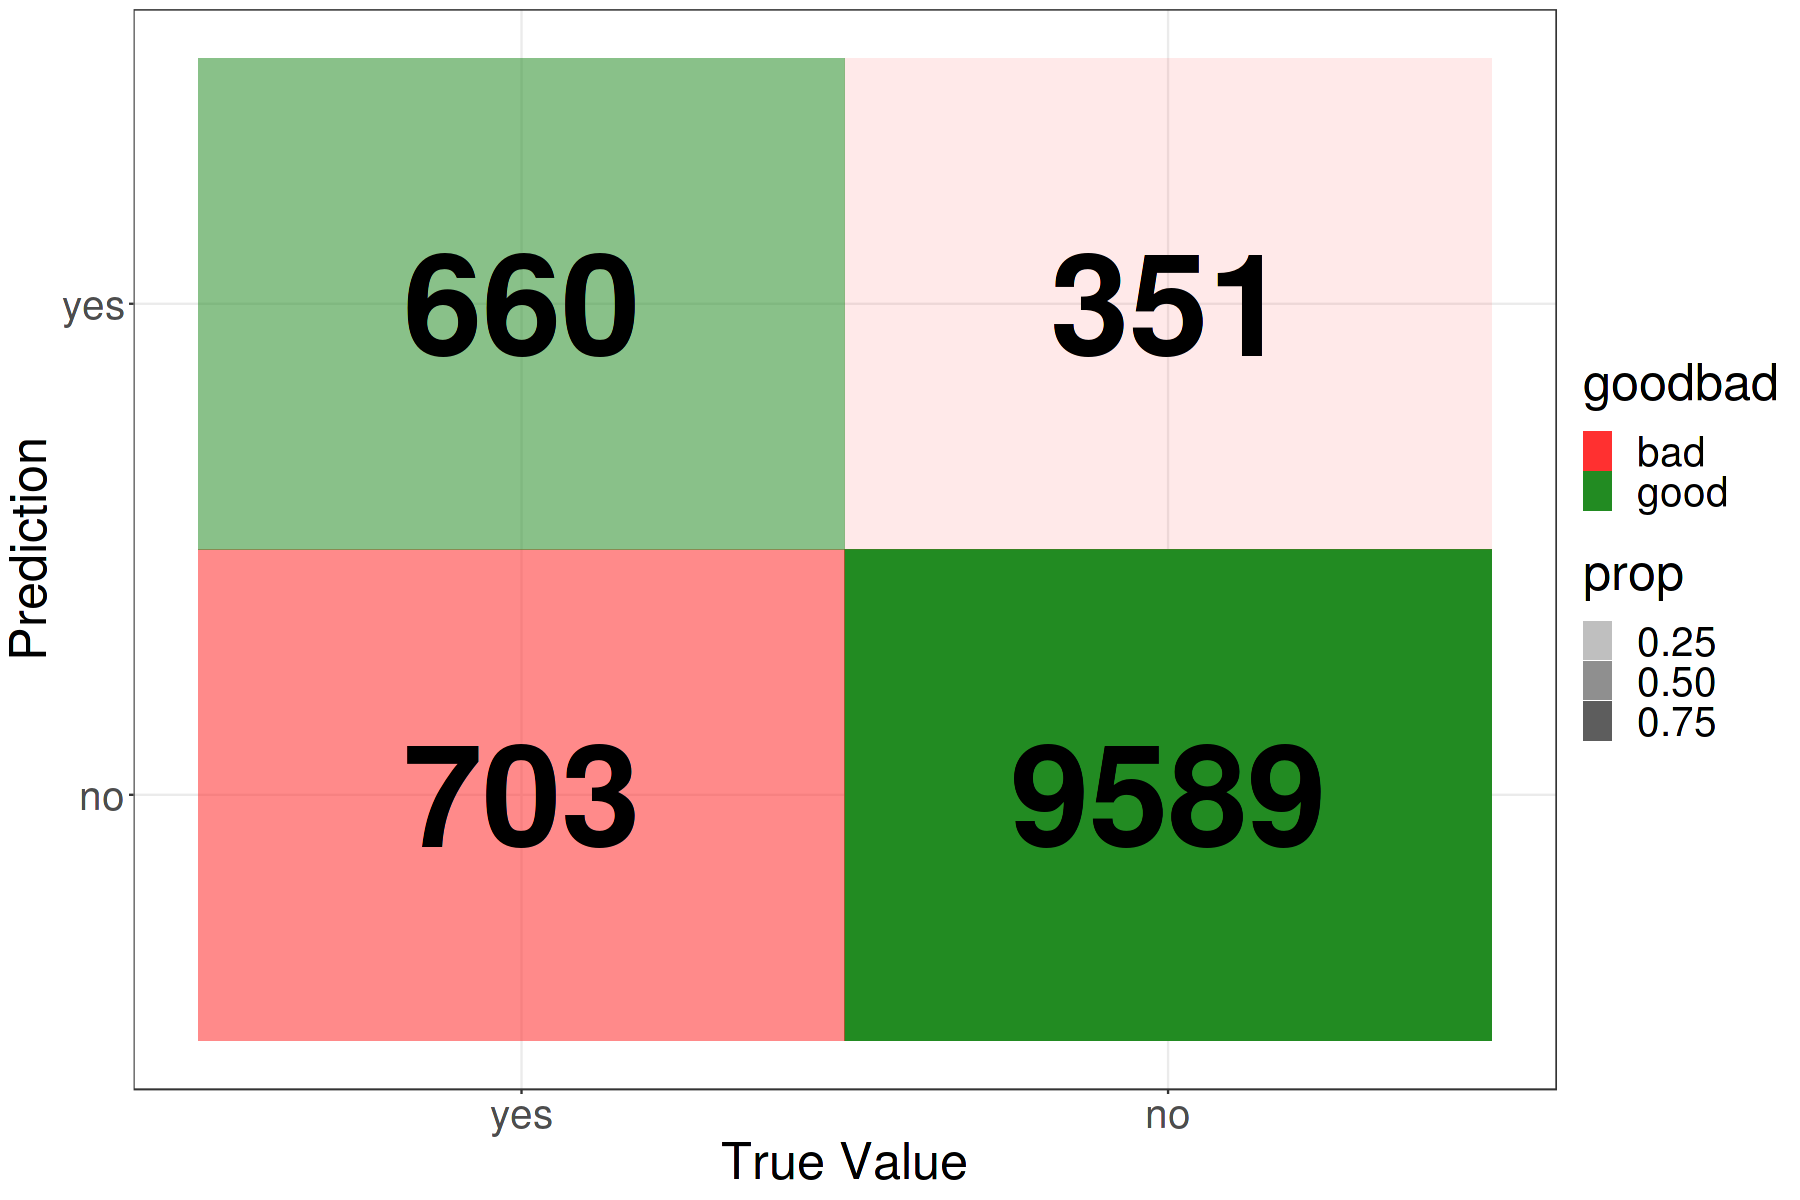

In [86]:
table <- data.frame(caret::confusionMatrix(Prediction.rf, y.test,positive="yes")$table)

plotTable <- table %>%
  mutate(goodbad = ifelse(table$Prediction == table$Reference, "good", "bad")) %>%
  group_by(Reference) %>%
  mutate(prop = Freq/sum(Freq))

# fill alpha relative to sensitivity/specificity by proportional outcomes within reference groups (see dplyr code above as well as original confusion matrix for comparison)
ggplot(data = plotTable, mapping = aes(x = Reference, y = Prediction, fill = goodbad, alpha = prop)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = .5, fontface  = "bold", alpha = 1,size = 30) +
  scale_fill_manual(values = c(good = "forestgreen", bad = "firebrick1")) +
  theme_bw() +
  xlim(rev(levels(table$Reference))) +
theme(text = element_text(size=30)) +
xlab("True Value")

In [87]:
library(randomForest)
set.seed(8)
rf.finalmodel <- randomForest(y ~ .,data=rf.df)
Predictionfinal = predict(rf.finalmodel, newdata=test_df)
table(predicted = Predictionfinal, true = test_df[,17])

         true
predicted   no  yes
      no  3590   83
      yes  410  438

In [88]:
caret::confusionMatrix(Predictionfinal, test_df[,17],positive="yes")

Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  3590   83
       yes  410  438
                                          
               Accuracy : 0.891           
                 95% CI : (0.8815, 0.8999)
    No Information Rate : 0.8848          
    P-Value [Acc > NIR] : 0.09942         
                                          
                  Kappa : 0.5799          
                                          
 Mcnemar's Test P-Value : < 2e-16         
                                          
            Sensitivity : 0.84069         
            Specificity : 0.89750         
         Pos Pred Value : 0.51651         
         Neg Pred Value : 0.97740         
             Prevalence : 0.11524         
         Detection Rate : 0.09688         
   Detection Prevalence : 0.18757         
      Balanced Accuracy : 0.86910         
                                          
       'Positive' Class : yes             
                        

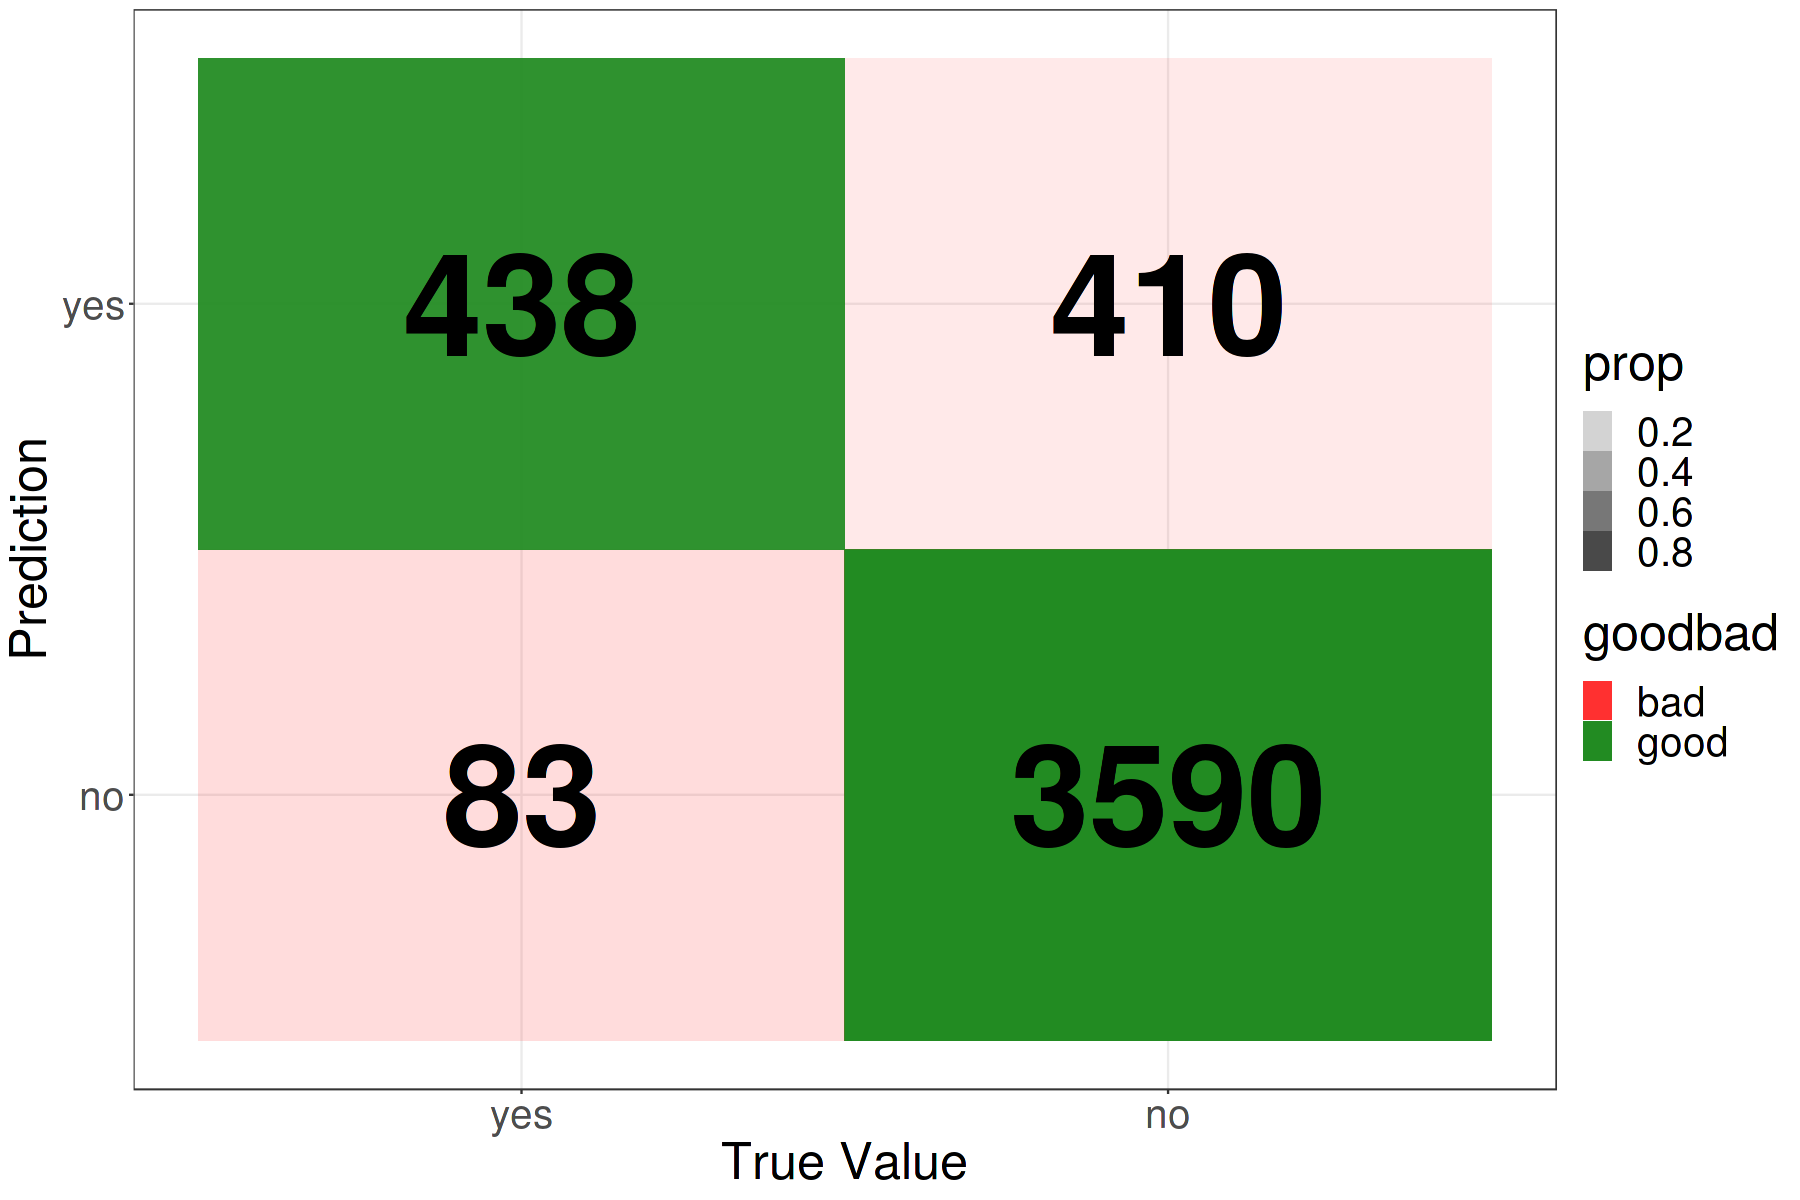

In [89]:
table <- data.frame(caret::confusionMatrix(Predictionfinal, test_df[,17],positive="yes")$table)

plotTable <- table %>%
  mutate(goodbad = ifelse(table$Prediction == table$Reference, "good", "bad")) %>%
  group_by(Reference) %>%
  mutate(prop = Freq/sum(Freq))

ggplot(data = plotTable, mapping = aes(x = Reference, y = Prediction, fill = goodbad, alpha = prop)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = .5, fontface  = "bold", alpha = 1,size = 30) +
  scale_fill_manual(values = c(good = "forestgreen", bad = "firebrick1")) +
  theme_bw() +
  xlim(rev(levels(table$Reference))) +
theme(text = element_text(size=30)) +
xlab("True Value")

## Conclusion

The Random Forest model that performed the best at the train data has performed extremely well at the test data, the main aim here is to maximize the bank's profit by idetifying as much people that will use the bank's term deposit, The model succesfully identifyed 84% of the poeple that chose to use this deposit (438 out of 521). cohen's kappa statistic has shown a moderate agreement between the prection and the actual data which is a good indicator of the reliebility of the model.

## Area for improvement

In this Kaggle dataset, the number of explanatory variables is quite small. In my actual experience, I have used more than 1k variables for a larger customer base to build the predictive model. Variable types include customer banking behaviors, life stage features, transactional behaviors, digital behaviors, share of wallets, external data. Also, I have derived variables using original variables in different time periods (i.e. max/min/std of balances in past 6 months) to reflect the changes in behaviors or life stages.

Secondly, we can leverage model ensemble to create a more robust model. But explanability of the resulted prediction is a challenge. 

Thirdly, some methods return the likelihood scores rather than binary result like 1/0, the scores can be further ranked to prioritize the order of contact.